# Roadmap: From Hamiltonian Construction to Master Eq Solver

In [8]:
# Importing necessary libraries
import qutip as q       # QuTiP: Quantum Toolbox in Python
import numpy as np      # NumPy: Library for numerical operations
import scipy as sp      # SciPy: Library for scientific computing
import matplotlib.pyplot as plt  # Matplotlib: Plotting library

# Configure Matplotlib for inline plotting
%matplotlib notebook
%matplotlib inline


# General commands

## Quantum object
### ket and bra

In [6]:
psi0 = q.basis(2,0) # Create the basis state |0⟩ in a 2-dimensional Hilbert space
psi0

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [7]:
psi1 = q.basis(2,1) # Create the basis state |1⟩ in a 2-dimensional Hilbert space
psi1.dag()

Quantum object: dims = [[1], [2]], shape = (1, 2), type = bra
Qobj data =
[[0. 1.]]

In QuTiP, `psi0.dag() * psi1` performs the inner product (also known as the dot product) between the complex conjugate transpose (Hermitian conjugate) of the state `psi0` and the state `psi1`. This operation is common in quantum mechanics to compute the overlap or projection between two states.

Here's a step-by-step explanation of `psi0.dag() * psi1`:

1. **`psi0`**: Assume this is the basis state |0⟩, which can be created using `q.basis(2, 0)`.

2. **`psi1`**: Assume this is the basis state |1⟩, which can be created using `q.basis(2, 1)`.

3. **`psi0.dag()`**: This computes the Hermitian conjugate (or conjugate transpose) of the state `psi0`. For the state |0⟩, which is $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$, the Hermitian conjugate is $\begin{pmatrix} 1 & 0 \end{pmatrix}$.

4. **`psi0.dag() * psi1`**: This performs the inner product between $\langle 0|$ and $|1\rangle$. Mathematically, this is:
   $$
   \langle 0 | 1 \rangle = \begin{pmatrix} 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = 0
   $$
   The result is 0 because the states |0⟩ and |1⟩ are orthogonal.

Here is an example code to illustrate this in QuTiP:

```python
import qutip as q

# Create the basis states |0⟩ and |1⟩ in a 2-dimensional Hilbert space
psi0 = q.basis(2, 0)
psi1 = q.basis(2, 1)

# Compute the inner product ⟨0|1⟩
inner_product = psi0.dag() * psi1

print(inner_product)
```

The output will show that the inner product is 0, confirming the orthogonality of the basis states |0⟩ and |1⟩:

```
Quantum object: dims = [[1], [1]], shape = (1, 1), type = oper, isHerm = True
Qobj data =
0.0
```

In [8]:
# product
psi0.dag() * psi1

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

In [9]:
psi1 * psi0.dag()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 0.]
 [1. 0.]]

In [10]:
psi0 = q.basis(10,1)
psi0

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

# `q.basis`
In QuTiP, the function `q.basis(N, i)` creates a basis state (also known as a ket) in a Hilbert space of dimension $ N $. The second argument, $ i $, specifies which basis state to create.

Here's a breakdown of `q.basis(10, 1)`:

- `10`: This is the dimension of the Hilbert space, which in this case is 10. This means we are working in a 10-dimensional Hilbert space.
- `1`: This specifies the index of the basis state to create. In this case, it refers to the second basis state (indexing starts from 0).

So, `q.basis(10, 1)` creates the ket $|1\rangle$ in a 10-dimensional Hilbert space. This is represented as a column vector with a 1 in the second position and 0s elsewhere:

$$
|1\rangle = \begin{pmatrix}
0 \\
1 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0
\end{pmatrix}
$$

Here is an example code to illustrate its usage in QuTiP:

```python
import qutip as q

# Create the basis state |1⟩ in a 10-dimensional Hilbert space
ket_1 = q.basis(10, 1)

print(ket_1)
```

The output will show the quantum object representation of the state $|1\rangle$, which is a column vector with 0s in all positions except the second one:

```
Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
```

In [13]:
psi0 = q.coherent(10, 2, offset=0, method=None)
psi0

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[0.13533468]
 [0.27067598]
 [0.38275331]
 [0.44215515]
 [0.4414275 ]
 [0.39717038]
 [0.31781378]
 [0.25575028]
 [0.14827955]
 [0.15941954]]

# `q.coherent`
In QuTiP, the function `q.coherent(N, α, offset=0, method=None)` creates a coherent state in a Hilbert space of dimension $ N $ with a complex amplitude $ \alpha $.

Here's a breakdown of the parameters for `q.coherent(10, 2, offset=0, method=None)`:

- `10`: This is the dimension of the Hilbert space, which in this case is 10.
- `2`: This is the complex amplitude $ \alpha $ of the coherent state.
- `offset=0`: This is an optional parameter to specify an offset, but it is set to 0 by default.
- `method=None`: This optional parameter specifies the method to use for generating the coherent state. If `None`, the default method is used.

A coherent state $ |\alpha \rangle $ is defined as:

$$
|\alpha \rangle = e^{-\frac{|\alpha|^2}{2}} \sum_{n=0}^{\infty} \frac{\alpha^n}{\sqrt{n!}} |n\rangle
$$

Here is an example code to illustrate the usage of `q.coherent` in QuTiP:

```python
import qutip as q

# Create a coherent state with α = 2 in a 10-dimensional Hilbert space
coherent_state = q.coherent(10, 2)

print(coherent_state)
```

The output will show the quantum object representation of the coherent state with complex amplitude $ \alpha = 2 $ in a 10-dimensional Hilbert space:

```
Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[0.13533528+0.j]
 [0.27067057+0.j]
 [0.38263793+0.j]
 [0.44204887+0.j]
 [0.44204887+0.j]
 [0.39522722+0.j]
 [0.32501768+0.j]
 [0.24568629+0.j]
 [0.17251506+0.j]
 [0.11328123+0.j]]
```

In this representation, the coefficients correspond to the expansion of the coherent state $ |\alpha = 2 \rangle $ in the number (Fock) state basis up to the 9th state in a 10-dimensional Hilbert space.
# Coherent State
A coherent state is a special type of quantum state that has properties closely related to classical harmonic oscillators. They are particularly significant in the context of quantum optics and are often used to describe the quantum states of light fields.

### Basis and Parameter

A coherent state $|\alpha\rangle$ is indeed a state in the sense that it can be part of a basis. However, it forms an overcomplete basis rather than an orthogonal one. This means that while every state in the Hilbert space can be represented as a (potentially non-unique) sum of coherent states, the coherent states themselves are not mutually orthogonal.

### Complex Amplitude $\alpha$

The parameter $\alpha$ in a coherent state $|\alpha\rangle$ is a complex number, known as the complex amplitude. This complex amplitude $\alpha$ can be written as:
$$ \alpha = |\alpha| e^{i\theta} $$
where $ |\alpha| $ is the magnitude, and $\theta$ is the phase.

The complex amplitude $\alpha$ represents both the mean position and momentum of the state in the phase space of the harmonic oscillator. Specifically:
- The real part of $\alpha$ is related to the expectation value of the position operator.
- The imaginary part of $\alpha$ is related to the expectation value of the momentum operator.

### Coherent Part in Terms of Sum of States

Coherent states are often expressed as superpositions of number states (Fock states) $|n\rangle$. The coherent state $|\alpha\rangle$ can be written as:
$$ |\alpha\rangle = e^{-\frac{|\alpha|^2}{2}} \sum_{n=0}^{\infty} \frac{\alpha^n}{\sqrt{n!}} |n\rangle $$

Here, $e^{-\frac{|\alpha|^2}{2}}$ is a normalization factor. This expression shows that a coherent state is a weighted sum of number states, where the weights are determined by the complex amplitude $\alpha$.

### Coherent Nature

The term "coherent" in coherent states refers to their properties that closely resemble classical harmonic motion:
- Coherent states minimize the Heisenberg uncertainty principle. The uncertainties in position and momentum are equal and minimized, similar to classical states.
- They evolve in time while maintaining their shape. For a harmonic oscillator, the coherent state $|\alpha(t)\rangle$ will remain a coherent state with a different complex amplitude that changes according to the classical equations of motion.

### Summary

In summary, a coherent state $|\alpha\rangle$:
- Is part of an overcomplete basis.
- Has a complex amplitude $\alpha$ representing mean position and momentum.
- Is a superposition of number states.
- Exhibits properties resembling classical harmonic oscillators, maintaining minimal uncertainty and evolving in a predictable manner.

The association of coherent states with harmonic oscillators is indeed closely related to the equally spaced energy levels characteristic of harmonic oscillators. Let's delve into this in more detail.

### Equally Spaced Energy Levels

For a quantum harmonic oscillator, the energy levels $E_n$ are given by:
$$ E_n = \left(n + \frac{1}{2}\right)\hbar\omega $$
where $n$ is a non-negative integer, $\hbar$ is the reduced Planck constant, and $\omega$ is the angular frequency of the oscillator. The energy difference between successive levels is:
$$ E_{n+1} - E_n = \hbar\omega $$

### Coherent States and Equally Spaced Energy Levels

The key property of coherent states that ties them to harmonic oscillators is their behavior under the annihilation and creation operators $ \hat{a} $ and $ \hat{a}^\dagger $. A coherent state $|\alpha\rangle$ is an eigenstate of the annihilation operator $\hat{a}$:
$$ \hat{a}|\alpha\rangle = \alpha|\alpha\rangle $$

The annihilation and creation operators satisfy the following commutation relation:
$$ [\hat{a}, \hat{a}^\dagger] = 1 $$

This structure of the ladder operators $\hat{a}$ and $\hat{a}^\dagger$ arises naturally in the context of the harmonic oscillator because of the equally spaced energy levels. For the harmonic oscillator, the ladder operators can be defined such that:
$$ \hat{a}|n\rangle = \sqrt{n}|n-1\rangle $$
$$ \hat{a}^\dagger|n\rangle = \sqrt{n+1}|n+1\rangle $$

This property means that the action of the annihilation and creation operators on the number states shifts them up and down the ladder of energy levels by fixed steps of $\hbar\omega$.

### Time Evolution and Classical Behavior

Another reason coherent states are associated with harmonic oscillators is their time evolution. A coherent state $|\alpha\rangle$ evolves in time as:
$$ |\alpha(t)\rangle = |\alpha e^{-i\omega t}\rangle $$

This is because the time evolution operator for a harmonic oscillator is:
$$ \hat{U}(t) = e^{-\frac{i}{\hbar} \hat{H} t} $$
where $\hat{H}$ is the Hamiltonian of the harmonic oscillator. Applying this to the coherent state, we find that the complex amplitude $\alpha$ evolves in a manner that mimics the classical motion of a harmonic oscillator.

### Summary

In summary, coherent states are intimately associated with harmonic oscillators because:
1. **Equally Spaced Energy Levels**: The harmonic oscillator's energy levels are equally spaced, which allows for the ladder operators $\hat{a}$ and $\hat{a}^\dagger$ to create and annihilate quanta of energy in fixed steps.
2. **Annihilation Operator Eigenstate**: Coherent states are eigenstates of the annihilation operator $\hat{a}$, a property that directly ties them to the harmonic oscillator's algebra.
3. **Classical Behavior**: The time evolution of coherent states under the harmonic oscillator Hamiltonian exhibits classical-like behavior, maintaining their shape and oscillating with the same frequency as the classical harmonic oscillator.

These properties collectively explain why coherent states are naturally associated with harmonic oscillators.

Let's create an example using QuTiP to demonstrate the application of microwave fields to a superconducting qubit at different time intervals and show the use of coherent states. 

We'll set up a simple scenario where we apply microwave pulses to a qubit and observe the evolution of the qubit state. Here's the plan:

1. Define a qubit and a coherent state of the microwave field.
2. Apply microwave pulses to the qubit at specified time intervals.
3. Observe the evolution of the qubit state.

### Step-by-Step Implementation

First, ensure you have QuTiP installed. You can install it using pip if you don't have it already:
```bash
pip install qutip
```

Next, let's write the Python code to create the described example:

```python
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, clear_output

# Parameters
alpha = 2.0  # Coherent state amplitude
N = 30  # Number of Fock states for the cavity
T = 10  # Total time for the simulation
dt = 0.05  # Time step

# Create a coherent state for the cavity
cavity_state = coherent(N, alpha)

# Create the ground state for the qubit
qubit_state = basis(2, 0)

# Initial combined state (tensor product of cavity and qubit states)
initial_state = tensor(cavity_state, qubit_state)

# Operators for the cavity and qubit
a = tensor(destroy(N), qeye(2))  # Annihilation operator for the cavity
sm = tensor(qeye(N), destroy(2))  # Lowering operator for the qubit

# Time array for the simulation
times = np.arange(0, T, dt)

def update_plot(omega_c, delta, g):
    # Hamiltonian components
    omega_0 = omega_c + delta  # Qubit frequency with detuning
    H_cavity = omega_c * a.dag() * a  # Cavity Hamiltonian
    H_qubit = 0.5 * omega_0 * sigmaz()  # Qubit Hamiltonian
    H_qubit = tensor(qeye(N), H_qubit)  # Ensure qubit Hamiltonian acts on full Hilbert space
    H_interaction = g * (a * sm.dag() + a.dag() * sm)  # Jaynes-Cummings interaction Hamiltonian

    # Total Hamiltonian
    H = H_cavity + H_qubit + H_interaction

    # Solve the time evolution of the system
    result = mesolve(H, initial_state, times, [], [sm.dag() * sm, a.dag() * a])

    # Extract the expectation values for the qubit excitation and the photon number
    qubit_excitation = result.expect[0]
    photon_number = result.expect[1]

    # Plot the results
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Qubit Excitation Probability', color='tab:blue')
    ax1.plot(times, qubit_excitation, 'b-', label="Qubit Excitation")
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Photon Number', color='tab:red')
    ax2.plot(times, photon_number, 'r-', label="Photon Number")
    ax2.tick_params(axis='y', labelcolor='tab:red')
    ax2.legend(loc='upper right')

    # Add title and grid
    fig.suptitle('Jaynes-Cummings Model with Coherent State')
    ax1.grid(True)
    ax2.grid(True)

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Create interactive sliders
omega_c_slider = widgets.FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, description='Cavity freq:')
delta_slider = widgets.FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.1, description='Detuning (Δ):')
g_slider = widgets.FloatSlider(value=0.1, min=0.0, max=2.0, step=0.1, description='Coupling (g):')  # Allow zero coupling

# Use interact to create the interactive plot
interact(update_plot, omega_c=omega_c_slider, delta=delta_slider, g=g_slider)


```


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, clear_output

# Parameters
alpha = 2.0  # Coherent state amplitude
N = 30  # Number of Fock states for the cavity
T = 20  # Total time for the simulation
dt = 0.05  # Time step

# Create a coherent state for the cavity
cavity_state = coherent(N, alpha)

# Create the ground state for the qubit
qubit_state = basis(2, 0)

# Initial combined state (tensor product of cavity and qubit states)
initial_state = tensor(cavity_state, qubit_state)

# Operators for the cavity and qubit
a = tensor(destroy(N), qeye(2))  # Annihilation operator for the cavity
sm = tensor(qeye(N), destroy(2))  # Lowering operator for the qubit

# Time array for the simulation
times = np.arange(0, T, dt)

def update_plot(omega_c, delta, g):
    # Hamiltonian components
    omega_0 = omega_c + delta  # Qubit frequency with detuning
    H_cavity = omega_c * a.dag() * a  # Cavity Hamiltonian
    H_qubit = 0.5 * omega_0 * sigmaz()  # Qubit Hamiltonian
    H_qubit = tensor(qeye(N), H_qubit)  # Ensure qubit Hamiltonian acts on full Hilbert space
    H_interaction = g * (a * sm.dag() + a.dag() * sm)  # Jaynes-Cummings interaction Hamiltonian

    # Total Hamiltonian
    H = H_cavity + H_qubit + H_interaction

    # Solve the time evolution of the system
    result = mesolve(H, initial_state, times, [], [sm.dag() * sm, a.dag() * a])

    # Extract the expectation values for the qubit excitation and the photon number
    qubit_excitation = result.expect[0]
    photon_number = result.expect[1]

    # Plot the results
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Qubit Excitation Probability', color='tab:blue')
    ax1.plot(times, qubit_excitation, 'b-', label="Qubit Excitation")
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Photon Number', color='tab:red')
    ax2.plot(times, photon_number, 'r-', label="Photon Number")
    ax2.tick_params(axis='y', labelcolor='tab:red')
    ax2.legend(loc='upper right')

    # Add title and grid
    fig.suptitle('Jaynes-Cummings Model with Coherent State')
    ax1.grid(True)
    ax2.grid(True)

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Create interactive sliders
omega_c_slider = widgets.FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, description='Cavity freq:')
delta_slider = widgets.FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.1, description='Detuning (Δ):')
g_slider = widgets.FloatSlider(value=0.1, min=0.0, max=2.0, step=0.1, description='Coupling (g):')  # Allow zero coupling

# Use interact to create the interactive plot
interact(update_plot, omega_c=omega_c_slider, delta=delta_slider, g=g_slider)


interactive(children=(FloatSlider(value=1.0, description='Cavity freq:', max=3.0, min=0.1), FloatSlider(value=…

<function __main__.update_plot(omega_c, delta, g)>

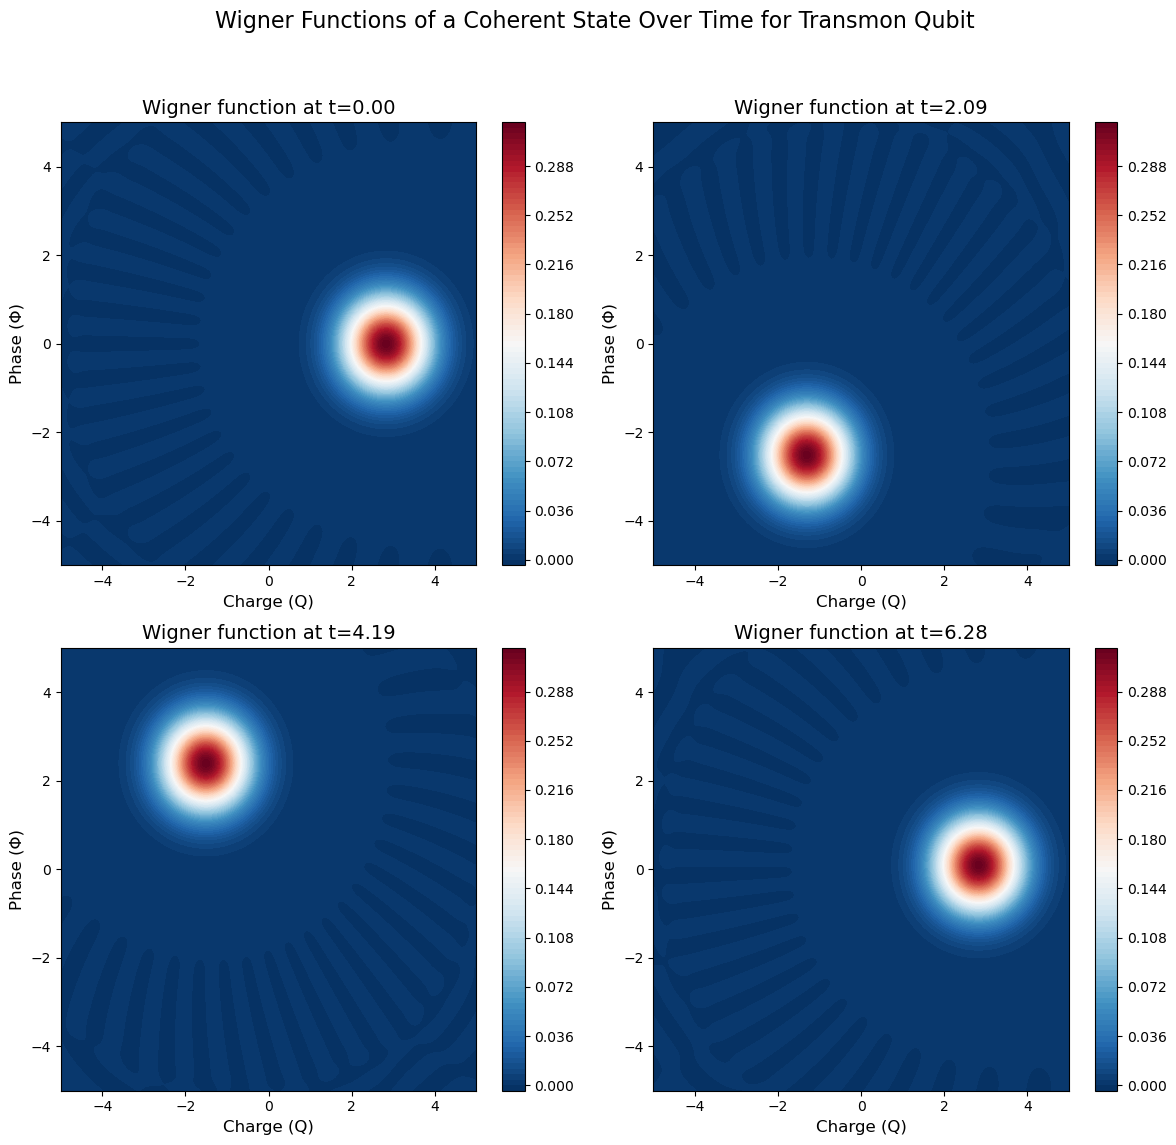

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters
alpha = 2.0  # Coherent state amplitude
N = 30  # Number of Fock states

# Create a coherent state
coherent_state = coherent(N, alpha)

# Hamiltonian for a quantum harmonic oscillator
H = destroy(N).dag() * destroy(N)  # a†a where a is the annihilation operator

# Time evolution
T = 2 * np.pi  # Total time for one period of the harmonic oscillator
dt = 0.05  # Time step
times = np.arange(0, T, dt)

# Solve the Schrödinger equation
result = mesolve(H, coherent_state, times, [], [])

# Plot Wigner function at different times
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()

# Loop over different times to plot the Wigner function
for i, t in enumerate(np.linspace(0, T, 4)):
    rho = result.states[int(t / dt)]  # Get the density matrix at time t
    W = wigner(rho, np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))  # Calculate Wigner function
    xvec = np.linspace(-5, 5, 500)
    yvec = np.linspace(-5, 5, 500)
    X, Y = np.meshgrid(xvec, yvec)  # Create mesh grid for plotting
    
    ax = axs[i]
    cont = ax.contourf(X, Y, W, 100, cmap='RdBu_r')  # Plot Wigner function
    ax.set_title(f'Wigner function at t={t:.2f}', fontsize=14)  # Set plot title
    ax.set_xlabel('Charge (Q)', fontsize=12)  # Set x-axis label
    ax.set_ylabel('Phase (Φ)', fontsize=12)  # Set y-axis label
    fig.colorbar(cont, ax=ax)  # Add color bar to the plot

# Set the overall title for the figure
fig.suptitle('Wigner Functions of a Coherent State Over Time for Transmon Qubit', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()


The Wigner function is a quasi-probability distribution used in the phase-space representation of quantum mechanics. Unlike classical probability distributions, the Wigner function can take on negative values, reflecting the non-classical nature of quantum states. It provides a complete description of the quantum state, analogous to the density matrix, but in the phase-space domain.

### Key Points About the Wigner Function:

1. **Phase-Space Representation**:
   - The Wigner function $ W(x, p) $ represents a quantum state in terms of position $ x $ and momentum $ p $. This phase-space representation helps visualize and analyze quantum states in a manner similar to classical mechanics.
   
2. **Quasi-Probability Distribution**:
   - The Wigner function can take negative values, which highlights the non-classical aspects of quantum mechanics. However, its marginal distributions correspond to actual probability distributions of position and momentum.

3. **Calculation**:
   - For a given density matrix $ \rho $, the Wigner function is calculated using the formula:
     $$
     W(x, p) = \frac{1}{\pi \hbar} \int_{-\infty}^{\infty} dy \, e^{2ipy/\hbar} \left\langle x - y \middle| \rho \middle| x + y \right\rangle
     $$
   - In practice, numerical methods are often used for computation, especially for complex states.

### Meaning of $ X $ and $ Y $ in the Wigner Function Plot:

1. **$ X $ and $ Y $ Axes**:
   - In the provided code, $ X $ and $ Y $ represent the position coordinates in phase space. Specifically:
     - $ X $: The horizontal axis typically represents the real part of the position or displacement.
     - $ Y $: The vertical axis typically represents the imaginary part of the position or displacement.

2. **Units**:
   - The units of $ X $ and $ Y $ are determined by the physical system being modeled. For a quantum harmonic oscillator, these are often in units of the oscillator's characteristic length scale $ l_0 $, which is related to the mass $ m $ and angular frequency $ \omega $ of the oscillator:
     $$
     l_0 = \sqrt{\frac{\hbar}{m \omega}}
     $$
   - The plots typically use dimensionless units where the position and momentum are scaled by appropriate factors related to the system's natural units.

3. **Interpretation**:
   - The Wigner function values on the $ X $-$ Y $ plane represent the phase-space distribution of the quantum state. High positive values indicate high probability density regions, while negative values indicate non-classical interference effects.

### Example: Coherent State

For a coherent state (as in your code example), the Wigner function resembles a Gaussian distribution centered at the classical position and momentum of the coherent state. The position and momentum are related through the complex amplitude $ \alpha $ of the coherent state:
$$ \alpha = \frac{x_0 + ip_0}{\sqrt{2 \hbar m \omega}} $$
where $ x_0 $ and $ p_0 $ are the classical position and momentum.

Thus, in the plot:
- $ X $ and $ Y $ span the range of possible positions (or displacements) of the oscillator.
- The coherent state's Wigner function shows a peak at the position corresponding to the complex amplitude $ \alpha $, with a spread determined by the quantum uncertainties in position and momentum.

### Conclusion

The Wigner function provides a comprehensive way to visualize and understand quantum states in phase space. The $ X $ and $ Y $ axes in the plot represent the position coordinates, typically in dimensionless units related to the system's natural scales. The values of the Wigner function at each point indicate the quasi-probability distribution of the state in phase space.

For a transmon qubit, the $ X $ and $ Y $ axes in the Wigner function plot can be interpreted as representing charge and flux, respectively. The transmon qubit is a type of superconducting qubit, which is described by the superconducting charge (Cooper pairs) and the superconducting phase difference across the Josephson junction.

### Detailed Explanation:

1. **Transmon Qubit Basics**:
   - The transmon qubit is a superconducting qubit that consists of a Josephson junction shunted by a large capacitor. It is designed to be less sensitive to charge noise compared to other types of superconducting qubits, such as the Cooper pair box.

2. **Charge and Flux (or Phase)**:
   - In the context of superconducting qubits:
     - **Charge ($ Q $)**: This corresponds to the number of Cooper pairs on the superconducting island, which can be related to the charge operator.
     - **Flux ($ \Phi $)**: This corresponds to the phase difference across the Josephson junction, which can be related to the flux operator (through the relationship with the phase).

3. **Wigner Function for Transmon Qubit**:
   - When visualizing the Wigner function for a transmon qubit, the phase space is typically defined in terms of these charge and phase (or flux) variables:
     - $ X $ axis: This can represent the charge $ Q $.
     - $ Y $ axis: This can represent the phase difference $ \Phi $.

4. **Units**:
   - The units for charge are usually in terms of the Cooper pair charge $ 2e $, where $ e $ is the elementary charge.
   - The units for flux are typically in terms of the reduced flux quantum $ \hbar / 2e $.

### Interpretation:

In a Wigner function plot for a transmon qubit:
- **$ X $ (Charge $ Q $)**: The horizontal axis might represent the charge degree of freedom, where the units are scaled appropriately (e.g., $ 2e $).
- **$ Y $ (Phase $ \Phi $)**: The vertical axis might represent the phase difference across the Josephson junction, with units of $ \hbar / 2e $.

### Example Code Update for a Transmon Qubit:

To reflect this understanding in your code, you can update the axis labels to denote charge and phase:

```python
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters
alpha = 2.0  # Coherent state amplitude
N = 30  # Number of Fock states

# Create a coherent state
coherent_state = coherent(N, alpha)

# Hamiltonian for a quantum harmonic oscillator
H = destroy(N).dag() * destroy(N)  # a†a where a is the annihilation operator

# Time evolution
T = 2 * np.pi  # Total time for one period of the harmonic oscillator
dt = 0.05  # Time step
times = np.arange(0, T, dt)

# Solve the Schrödinger equation
result = mesolve(H, coherent_state, times, [], [])

# Plot Wigner function at different times
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()

# Loop over different times to plot the Wigner function
for i, t in enumerate(np.linspace(0, T, 4)):
    rho = result.states[int(t / dt)]  # Get the density matrix at time t
    W = wigner(rho, np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))  # Calculate Wigner function
    xvec = np.linspace(-5, 5, 500)
    yvec = np.linspace(-5, 5, 500)
    X, Y = np.meshgrid(xvec, yvec)  # Create mesh grid for plotting
    
    ax = axs[i]
    cont = ax.contourf(X, Y, W, 100, cmap='RdBu_r')  # Plot Wigner function
    ax.set_title(f'Wigner function at t={t:.2f}', fontsize=14)  # Set plot title
    ax.set_xlabel('Charge (Q)', fontsize=12)  # Set x-axis label
    ax.set_ylabel('Phase (Φ)', fontsize=12)  # Set y-axis label
    fig.colorbar(cont, ax=ax)  # Add color bar to the plot

# Set the overall title for the figure
fig.suptitle('Wigner Functions of a Coherent State Over Time for Transmon Qubit', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()
```

In this code, the axis labels are updated to reflect charge and phase, which are more relevant for a transmon qubit. This change helps better understand the physical meaning of the plotted Wigner functions in the context of superconducting qubits.

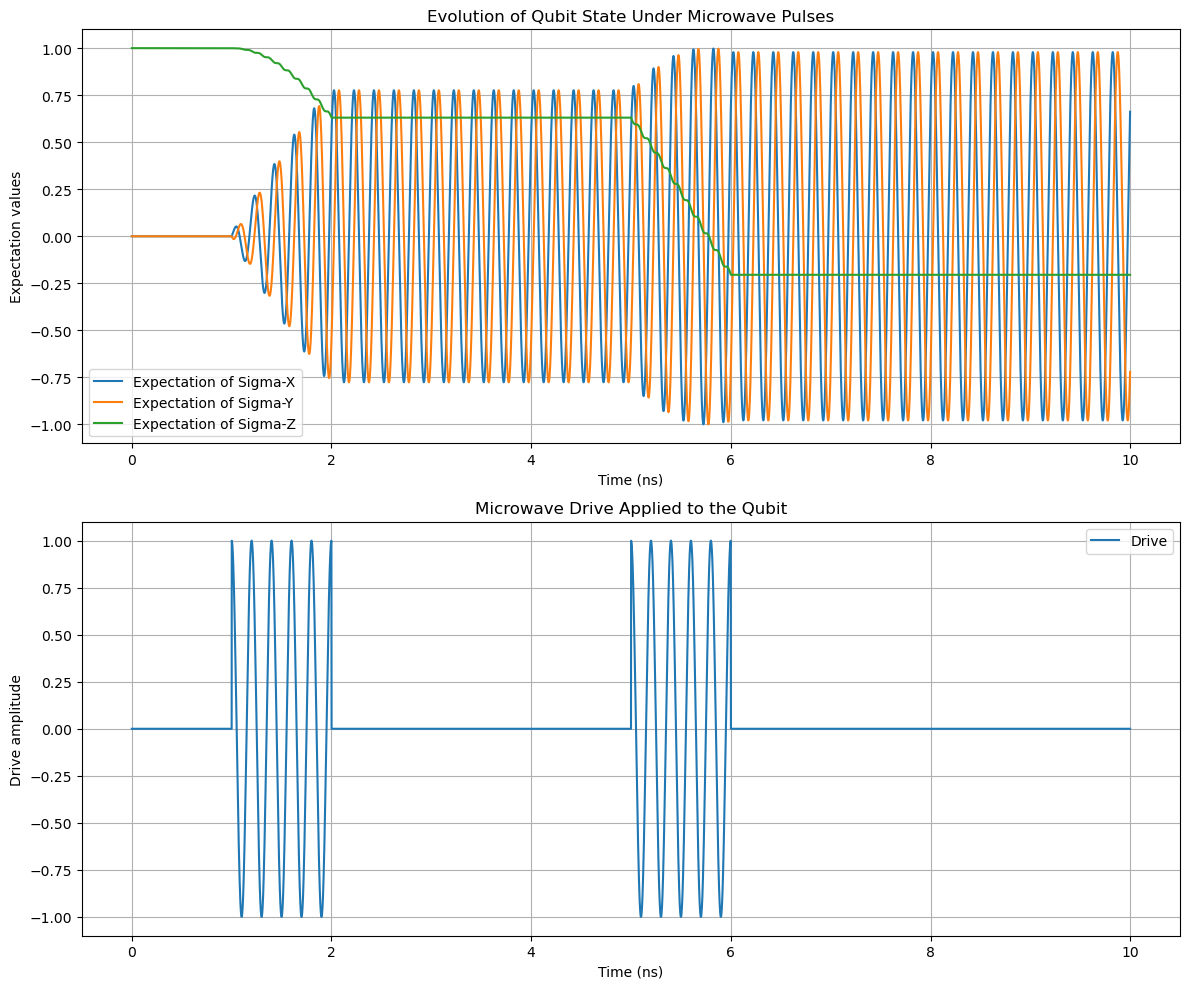

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define parameters
omega_q = 2 * np.pi * 5.0  # Qubit frequency in rad/ns (5 GHz)
omega_d = omega_q  # Drive frequency in rad/ns (same as qubit frequency)
g = 2 * np.pi * 0.1  # Coupling strength in rad/ns (0.1 GHz)
T = 10  # Total time in ns
dt = 0.001  # Time step in ns
times = np.arange(0, T, dt)  # Time array in ns

# Qubit operators
sz = sigmaz()
sx = sigmax()
sy = sigmay()

# Initial state: ground state of the qubit
psi0 = basis(2, 0)

# Hamiltonian components
H0 = 0.5 * omega_q * sz  # Qubit Hamiltonian in rad/ns
H1 = g * (sx + sy)  # Drive Hamiltonian in rad/ns


# Piecewise function for the drive
def drive(t, args):
    if 1 < t < 2 or 5 < t < 6:  # Apply microwave pulse at these intervals
        return np.cos(omega_d * t)
    else:
        return 0

# Create an array to store the drive values
drive_values = np.array([drive(t, None) for t in times])

# Total Hamiltonian with time-dependent drive
H = [H0, [H1, drive]]

# Time evolution of the system
result = mesolve(H, psi0, times, [], [sx, sy, sz])

# Plot the results
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# First subplot: Expectation values
axs[0].plot(times, result.expect[0], label="Expectation of Sigma-X")
axs[0].plot(times, result.expect[1], label="Expectation of Sigma-Y")
axs[0].plot(times, result.expect[2], label="Expectation of Sigma-Z")
axs[0].set_xlabel('Time (ns)')
axs[0].set_ylabel('Expectation values')
axs[0].legend()
axs[0].set_title('Evolution of Qubit State Under Microwave Pulses')
axs[0].grid()

# Second subplot: Drive applied
axs[1].plot(times, drive_values, label="Drive")
axs[1].set_xlabel('Time (ns)')
axs[1].set_ylabel('Drive amplitude')
axs[1].set_title('Microwave Drive Applied to the Qubit')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()


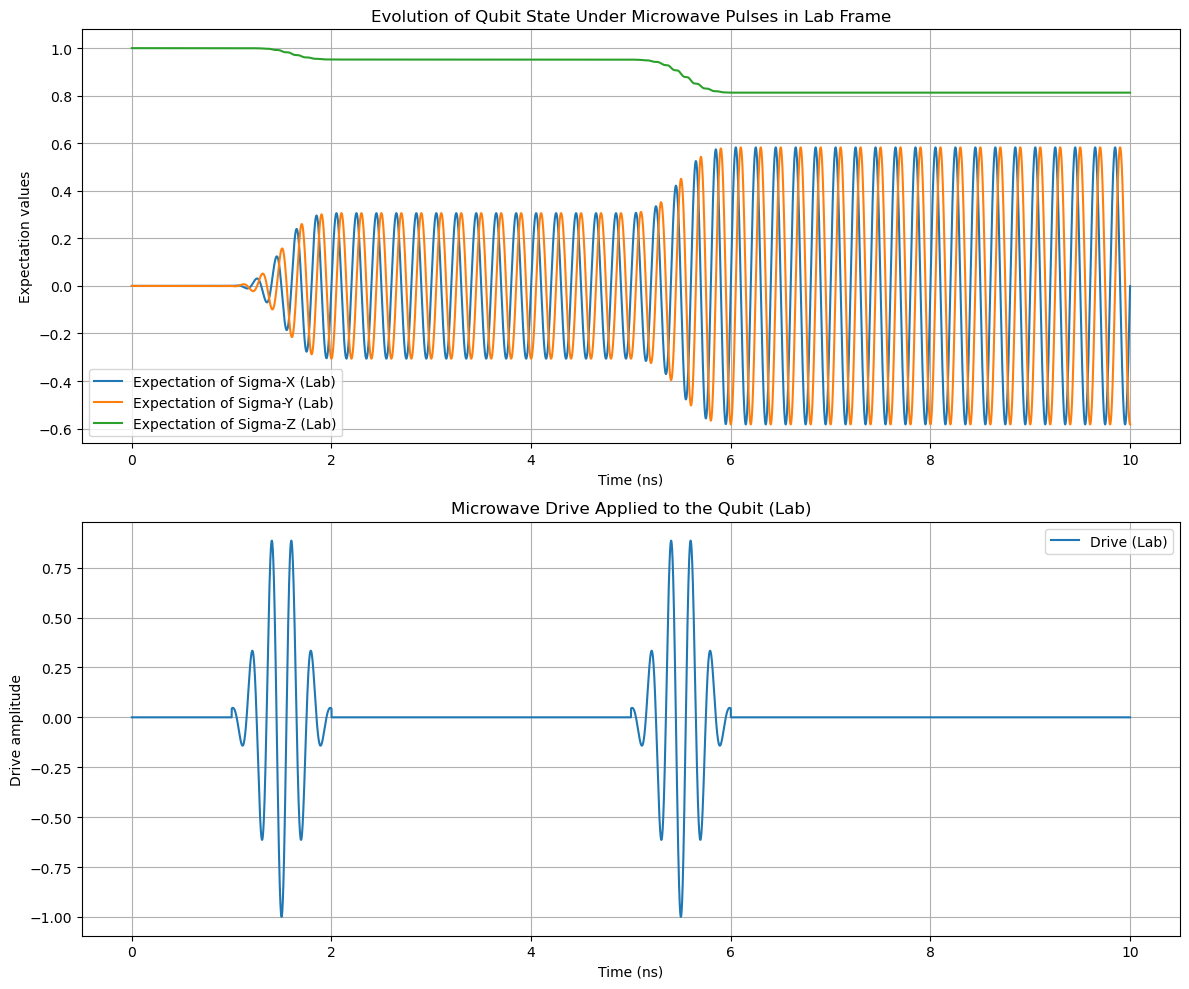

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define parameters
omega_q = 2 * np.pi * 5.0  # Qubit frequency in rad/ns (5 GHz)
omega_d = omega_q  # Drive frequency in rad/ns (same as qubit frequency)
g = 2 * np.pi * 0.1  # Coupling strength in rad/ns (0.1 GHz)
T = 10  # Total time in ns
dt = 0.0001  # Time step in ns
times = np.arange(0, T, dt)  # Time array in ns

# Qubit operators
sz = sigmaz()
sx = sigmax()
sy = sigmay()

# Initial state: ground state of the qubit
psi0 = basis(2, 0)

# Hamiltonian components
H0 = 0.5 * omega_q * sz  # Qubit Hamiltonian in rad/ns
H1 = g * sx  # Drive Hamiltonian in rad/ns

# Gaussian envelope parameters
def gaussian_envelope(t, center, width):
    return np.exp(-((t - center) ** 2) / (2 * width ** 2))

# Piecewise function for the drive with Gaussian envelope
def drive(t, args):
    drive_val = 0
    if 1 < t < 2:  # Pulse from 1 ns to 2 ns
        drive_val = np.cos(omega_d * t) * gaussian_envelope(t, 1.5, 0.2)  # Center at 1.5 ns, width of 0.2 ns
    elif 5 < t < 6:  # Pulse from 5 ns to 6 ns
        drive_val = np.cos(omega_d * t) * gaussian_envelope(t, 5.5, 0.2)  # Center at 5.5 ns, width of 0.2 ns
    return drive_val

# Create an array to store the drive values
drive_values_lab = np.array([drive(t, None) for t in times])

# Total Hamiltonian with time-dependent drive
H_lab = [H0, [H1, drive]]

# Time evolution of the system
result_lab = mesolve(H_lab, psi0, times, [], [sx, sy, sz])

# Plot the results
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# First subplot: Expectation values
axs[0].plot(times, result_lab.expect[0], label="Expectation of Sigma-X (Lab)")
axs[0].plot(times, result_lab.expect[1], label="Expectation of Sigma-Y (Lab)")
axs[0].plot(times, result_lab.expect[2], label="Expectation of Sigma-Z (Lab)")
axs[0].set_xlabel('Time (ns)')
axs[0].set_ylabel('Expectation values')
axs[0].legend()
axs[0].set_title('Evolution of Qubit State Under Microwave Pulses in Lab Frame')
axs[0].grid()

# Second subplot: Drive applied
axs[1].plot(times, drive_values_lab, label="Drive (Lab)")
axs[1].set_xlabel('Time (ns)')
axs[1].set_ylabel('Drive amplitude')
axs[1].set_title('Microwave Drive Applied to the Qubit (Lab)')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()


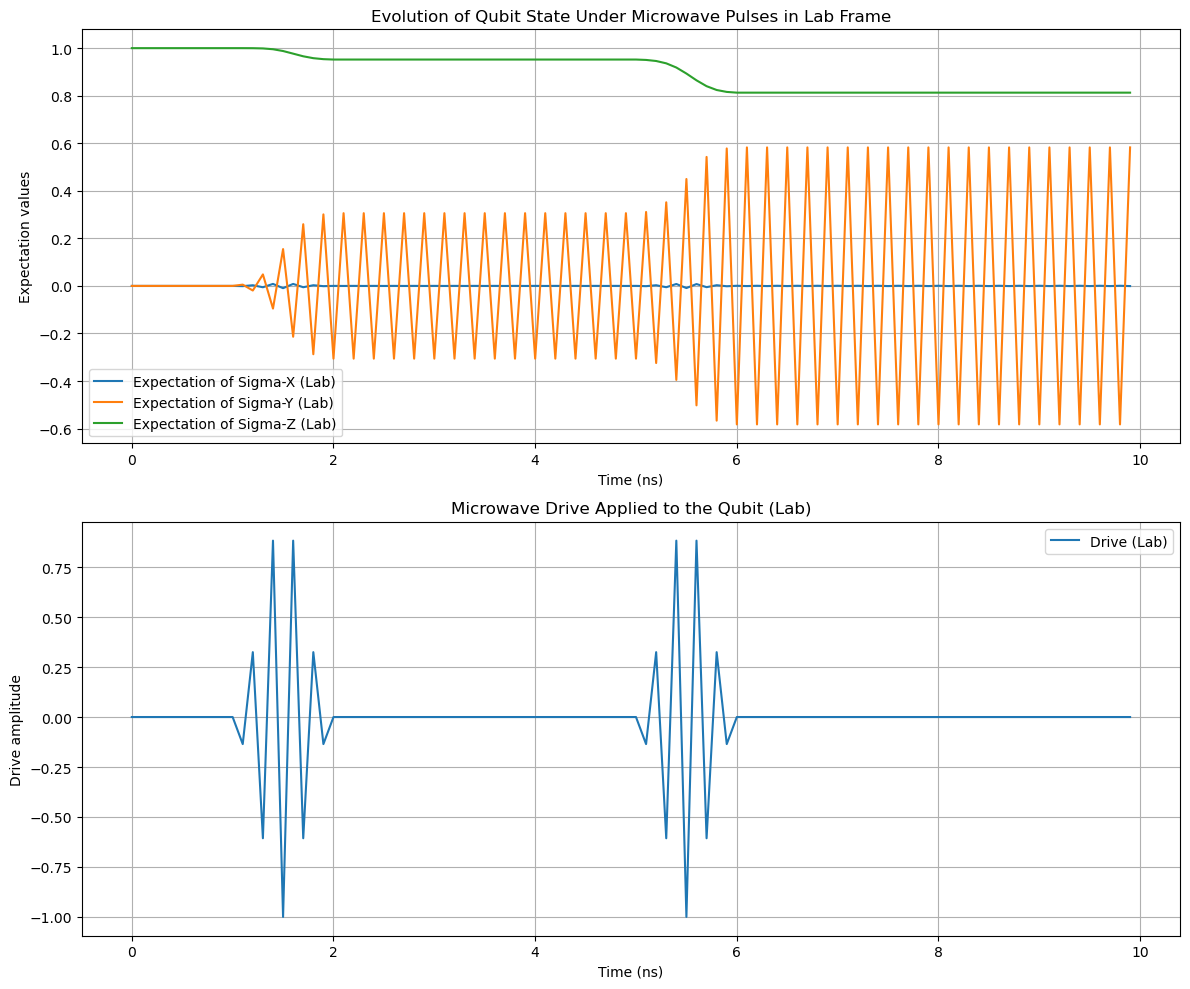

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define parameters
omega_q = 2 * np.pi * 5.0  # Qubit frequency in rad/ns (5 GHz)
omega_d = omega_q  # Drive frequency in rad/ns (same as qubit frequency)
g = 2 * np.pi * 0.1  # Coupling strength in rad/ns (0.1 GHz)
T = 10  # Total time in ns
dt = 0.1  # Time step in ns
times = np.arange(0, T, dt)  # Time array in ns

# Qubit operators
sz = sigmaz()
sx = sigmax()
sy = sigmay()

# Initial state: ground state of the qubit
psi0 = basis(2, 0)

# Hamiltonian components
H0 = 0.5 * omega_q * sz  # Qubit Hamiltonian in rad/ns
H1 = g * sx  # Drive Hamiltonian in rad/ns

# Gaussian envelope parameters
def gaussian_envelope(t, center, width):
    return np.exp(-((t - center) ** 2) / (2 * width ** 2))

# Piecewise function for the drive with Gaussian envelope
def drive(t, args):
    drive_val = 0
    if 1 < t < 2:  # Pulse from 1 ns to 2 ns
        drive_val = np.cos(omega_d * t) * gaussian_envelope(t, 1.5, 0.2)  # Center at 1.5 ns, width of 0.2 ns
    elif 5 < t < 6:  # Pulse from 5 ns to 6 ns
        drive_val = np.cos(omega_d * t) * gaussian_envelope(t, 5.5, 0.2)  # Center at 5.5 ns, width of 0.2 ns
    return drive_val

# Create an array to store the drive values
drive_values_lab = np.array([drive(t, None) for t in times])

# Total Hamiltonian with time-dependent drive
H_lab = [H0, [H1, drive]]

# Time evolution of the system
result_lab = mesolve(H_lab, psi0, times, [], [sx, sy, sz])

# Plot the results
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# First subplot: Expectation values
axs[0].plot(times, result_lab.expect[0], label="Expectation of Sigma-X (Lab)")
axs[0].plot(times, result_lab.expect[1], label="Expectation of Sigma-Y (Lab)")
axs[0].plot(times, result_lab.expect[2], label="Expectation of Sigma-Z (Lab)")
axs[0].set_xlabel('Time (ns)')
axs[0].set_ylabel('Expectation values')
axs[0].legend()
axs[0].set_title('Evolution of Qubit State Under Microwave Pulses in Lab Frame')
axs[0].grid()

# Second subplot: Drive applied
axs[1].plot(times, drive_values_lab, label="Drive (Lab)")
axs[1].set_xlabel('Time (ns)')
axs[1].set_ylabel('Drive amplitude')
axs[1].set_title('Microwave Drive Applied to the Qubit (Lab)')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()



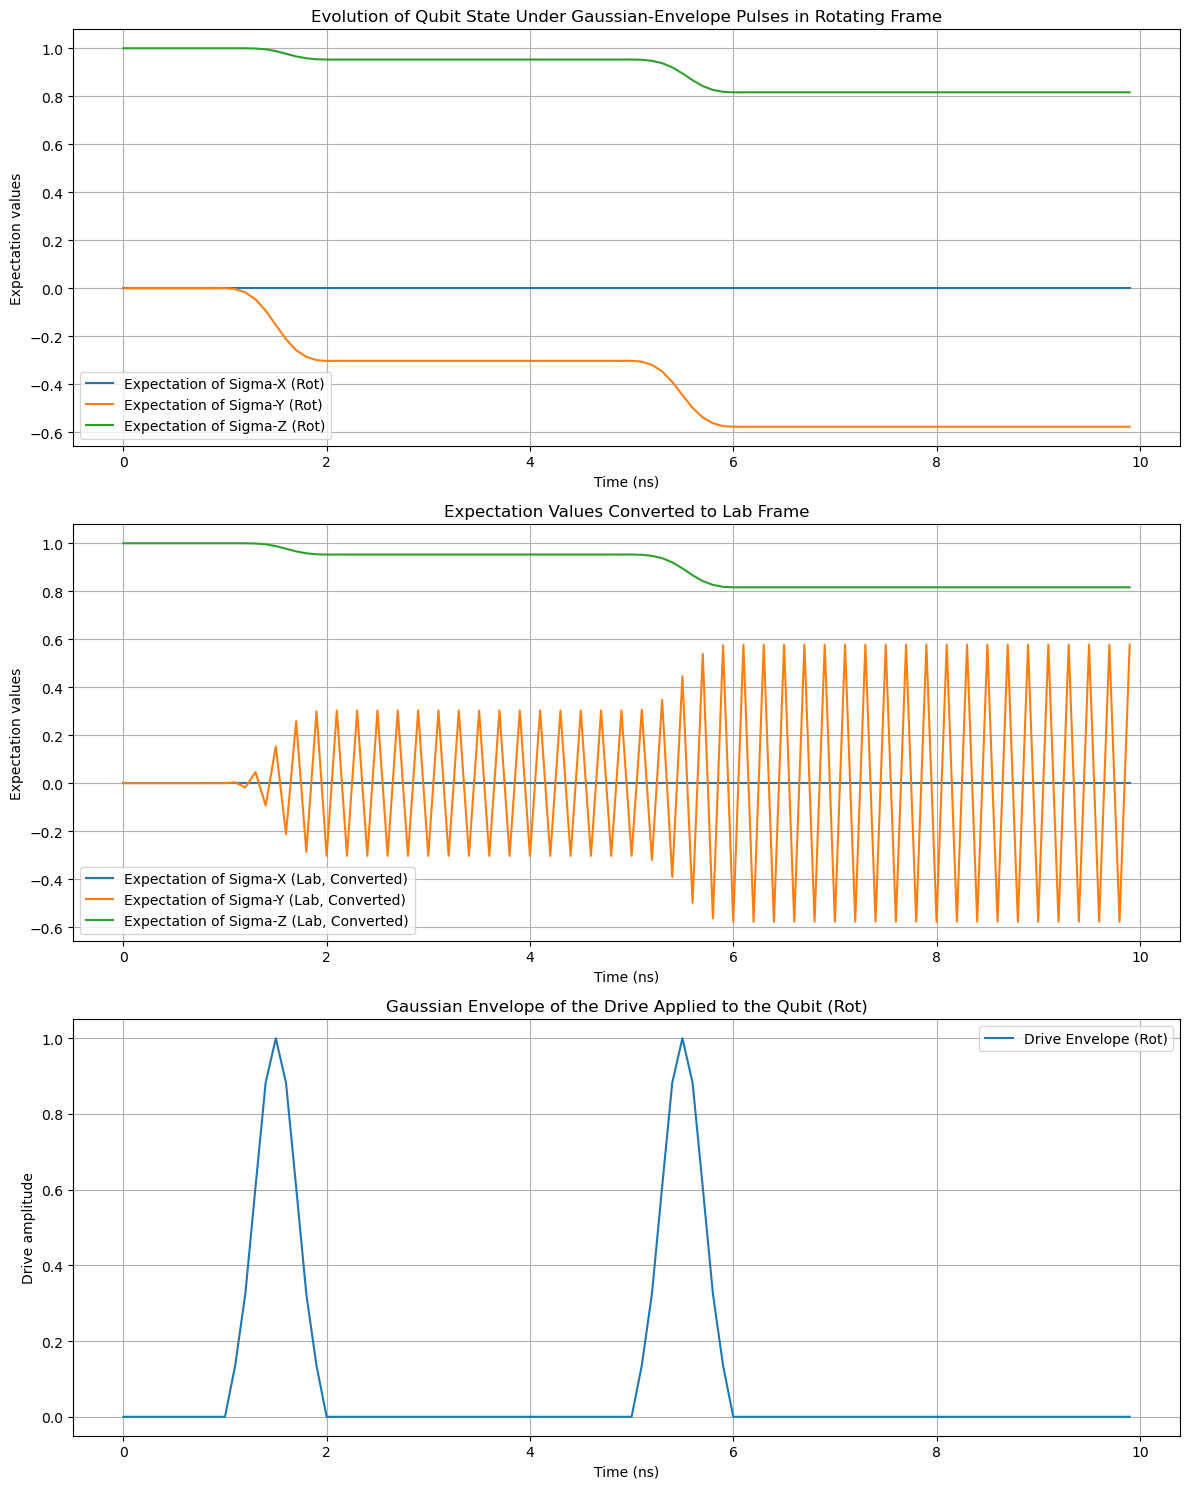

In [12]:
import qutip as q
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
omega_q = 2 * np.pi * 5.0  # Qubit frequency in rad/ns (5 GHz)
g = 2 * np.pi * 0.1  # Coupling strength in rad/ns (0.1 GHz)
T = 10  # Total time in ns
dt = 0.1  # Time step in ns
times = np.arange(0, T, dt)  # Time array in ns

# Qubit operators
sx = q.sigmax()
sy = q.sigmay()
sz = q.sigmaz()

# Initial state: ground state of the qubit
psi0 = q.basis(2, 0)

# Define Gaussian envelope for the pulses
def gaussian_envelope(t, center, width):
    return np.exp(-((t - center) ** 2) / (2 * width ** 2))

# Piecewise function for the drive with Gaussian envelope
def drive_envelope(t):
    if 1 < t < 2:  # Pulse from 1 ns to 2 ns
        return gaussian_envelope(t, 1.5, 0.2)  # Center at 1.5 ns, width of 0.2 ns
    elif 5 < t < 6:  # Pulse from 5 ns to 6 ns
        return gaussian_envelope(t, 5.5, 0.2)  # Center at 5.5 ns, width of 0.2 ns
    else:
        return 0

# Create an array to store the drive values
drive_values_rot = np.array([drive_envelope(t) for t in times])

# Hamiltonian in the rotating frame (with time-dependent drive)
H0_rot = 0.0 * omega_q * sz  # Zero Hamiltonian in the rotating frame
H1_rot = g / 2 * sx  # Drive Hamiltonian in the rotating frame

# Total Hamiltonian with the driving term
H_rot = [H0_rot, [H1_rot, drive_values_rot]]

# Define solver options
options = q.Options(rtol=1e-10, atol=1e-10, nsteps=1000000000, store_states=True, store_final_state=True)

# Time evolution of the system
result_rot = q.mesolve(H_rot, psi0, times, [], [sx, sy, sz], options=options)

# Convert expectations to the lab frame
expect_x_rot = result_rot.expect[0]
expect_y_rot = result_rot.expect[1]

expect_x_lab = expect_x_rot * np.cos(omega_q * times) - expect_y_rot * np.sin(omega_q * times)
expect_y_lab = expect_x_rot * np.sin(omega_q * times) + expect_y_rot * np.cos(omega_q * times)
expect_z_lab = result_rot.expect[2]

# Plot the results
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# First subplot: Expectation values in Rotating Frame
axs[0].plot(times, result_rot.expect[0], label="Expectation of Sigma-X (Rot)")
axs[0].plot(times, result_rot.expect[1], label="Expectation of Sigma-Y (Rot)")
axs[0].plot(times, result_rot.expect[2], label="Expectation of Sigma-Z (Rot)")
axs[0].set_xlabel('Time (ns)')
axs[0].set_ylabel('Expectation values')
axs[0].legend()
axs[0].set_title('Evolution of Qubit State Under Gaussian-Envelope Pulses in Rotating Frame')
axs[0].grid()

# Second subplot: Expectation values converted to Lab Frame
axs[1].plot(times, expect_x_lab, label="Expectation of Sigma-X (Lab, Converted)")
axs[1].plot(times, expect_y_lab, label="Expectation of Sigma-Y (Lab, Converted)")
axs[1].plot(times, expect_z_lab, label="Expectation of Sigma-Z (Lab, Converted)")
axs[1].set_xlabel('Time (ns)')
axs[1].set_ylabel('Expectation values')
axs[1].legend()
axs[1].set_title('Expectation Values Converted to Lab Frame')
axs[1].grid()

# Third subplot: Drive applied
axs[2].plot(times, drive_values_rot, label="Drive Envelope (Rot)")
axs[2].set_xlabel('Time (ns)')
axs[2].set_ylabel('Drive amplitude')
axs[2].set_title('Gaussian Envelope of the Drive Applied to the Qubit (Rot)')
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.show()


In [4]:
import qutip as q
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown, Layout

# Define parameters
omega_q = 2 * np.pi * 5.0  # Qubit frequency in rad/ns (5 GHz)
g = 2 * np.pi * 0.1  # Coupling strength in rad/ns (0.1 GHz)
T = 10  # Total time in ns

# Qubit operators
sx = q.sigmax()
sy = q.sigmay()
sz = q.sigmaz()

# Initial state: ground state of the qubit
psi0 = q.basis(2, 0)

# Define Gaussian envelope for the pulses
def gaussian_envelope(t, center, width):
    return np.exp(-((t - center) ** 2) / (2 * width ** 2))

# Piecewise function for the drive with Gaussian envelope
def drive_envelope(t):
    if 1 < t < 2:  # Pulse from 1 ns to 2 ns
        return gaussian_envelope(t, 1.5, 0.2)  # Center at 1.5 ns, width of 0.2 ns
    elif 5 < t < 6:  # Pulse from 5 ns to 6 ns
        return gaussian_envelope(t, 5.5, 0.2)  # Center at 5.5 ns, width of 0.2 ns
    else:
        return 0

# Function to update the plot based on frame selection
def update_plot(frame, dt, rtol, atol):
    times = np.arange(0, T, dt)  # Time array in ns

    # Create an array to store the drive values
    drive_envelope_values = np.array([drive_envelope(t) for t in times])
    drive_values_lab = np.array([drive_envelope(t) * np.cos(omega_q * t) for t in times])

    # Hamiltonian and drive term based on frame selection
    if frame == 'Lab Frame':
        H0 = 0.5 * omega_q * sz  # Qubit Hamiltonian in rad/ns
        H1 = g * sx  # Drive Hamiltonian in rad/ns
        
        # Define the drive function compatible with mesolve
        def drive(t, args):
            return np.cos(omega_q * t) * drive_envelope(t)
        
        H = [H0, [H1, drive]]
        simulated_title = 'Lab Frame (simulated)'
        derived_title = 'Rotating Frame (derived)'
    else:
        H0 = 0.0 * omega_q * sz  # Zero Hamiltonian in the rotating frame
        H1 = g / 2 * sx  # Drive Hamiltonian in the rotating frame
        H = [H0, [H1, drive_envelope_values]]
        simulated_title = 'Rotating Frame (simulated)'
        derived_title = 'Lab Frame (derived)'

    # Define solver options
    options = q.Options(rtol=rtol, atol=atol, nsteps=1000000000, store_states=True, store_final_state=True)

    # Time evolution of the system
    result = q.mesolve(H, psi0, times, [], [sx, sy, sz], options=options)

    if frame == 'Lab Frame':
        # Expectation values in the lab frame
        expect_x_lab = result.expect[0]
        expect_y_lab = result.expect[1]
        expect_z_lab = result.expect[2]

        # Convert expectations to the rotating frame
        expect_x_rot = expect_x_lab * np.cos(omega_q * times) + expect_y_lab * np.sin(omega_q * times)
        expect_y_rot = -expect_x_lab * np.sin(omega_q * times) + expect_y_lab * np.cos(omega_q * times)
        expect_z_rot = expect_z_lab
        title_1 ="(Derived)"
        title_2 ="(Simulated)"
    else:
        # Expectation values in the rotating frame
        expect_x_rot = result.expect[0]
        expect_y_rot = result.expect[1]
        expect_z_rot = result.expect[2]

        # Convert expectations to the lab frame
        expect_x_lab = expect_x_rot * np.cos(omega_q * times) - expect_y_rot * np.sin(omega_q * times)
        expect_y_lab = expect_x_rot * np.sin(omega_q * times) + expect_y_rot * np.cos(omega_q * times)
        expect_z_lab = expect_z_rot
        title_1 ="(Simulated)"
        title_2 ="(Derived)"
        
    # Plot the results
    fig, axs = plt.subplots(3, 1, figsize=(12, 15))

    # First subplot: Expectation values in Rotating Frame
    axs[0].plot(times, expect_x_rot, label="Expectation of Sigma-X (Rot)")
    axs[0].plot(times, expect_y_rot, label="Expectation of Sigma-Y (Rot)")
    axs[0].plot(times, expect_z_rot, label="Expectation of Sigma-Z (Rot)")
    axs[0].set_xlabel('Time (ns)')
    axs[0].set_ylabel('Expectation values')
    axs[0].legend()
    axs[0].set_title(f'Evolution of Qubit State Under Gaussian-Envelope Pulses in Rotating Frame {title_1}')
    axs[0].grid()

    # Second subplot: Expectation values in Lab Frame
    axs[1].plot(times, expect_x_lab, label="Expectation of Sigma-X (Lab)")
    axs[1].plot(times, expect_y_lab, label="Expectation of Sigma-Y (Lab)")
    axs[1].plot(times, expect_z_lab, label="Expectation of Sigma-Z (Lab)")
    axs[1].set_xlabel('Time (ns)')
    axs[1].set_ylabel('Expectation values')
    axs[1].legend()
    axs[1].set_title(f'Evolution of Qubit State Under Gaussian-Envelope Pulses in Lab Frame {title_2}')
    axs[1].grid()

    # Third subplot: Drive applied
    axs[2].plot(times, drive_values_lab, label="Drive (Lab)")
    axs[2].plot(times, drive_envelope_values, label="Drive Envelope (Rot)", linestyle='--')
    axs[2].set_xlabel('Time (ns)')
    axs[2].set_ylabel('Drive amplitude')
    axs[2].set_title('Drive Applied to the Qubit')
    axs[2].legend()
    axs[2].grid()

    plt.tight_layout()
    plt.show()

# Create the interactive widgets
frame_dropdown = Dropdown(options=['Lab Frame', 'Rotating Frame'], value='Lab Frame', description='Frame:')
dt_slider = FloatSlider(value=0.1, min=0.001, max=0.1, step=0.001,
                        description='Time Step (dt) [ns]', layout=Layout(width='800px'),
                        readout_format='.3f')
rtol_slider = FloatSlider(value=1e-10, min=1e-14, max=1e-4, step=1e-14,
                          description='rtol', layout=Layout(width='800px'),
                          readout_format='.14f')
atol_slider = FloatSlider(value=1e-10, min=1e-14, max=1e-4, step=1e-14,
                          description='atol', layout=Layout(width='800px'),
                          readout_format='.14f')

interact(update_plot, frame=frame_dropdown, dt=dt_slider, rtol=rtol_slider, atol=atol_slider)


interactive(children=(Dropdown(description='Frame:', options=('Lab Frame', 'Rotating Frame'), value='Lab Frame…

<function __main__.update_plot(frame, dt, rtol, atol)>

In [5]:
import qutip as q
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown, Layout

# Define parameters
omega_q = 2 * np.pi * 5.0  # Qubit frequency in rad/ns (5 GHz)
g = 2 * np.pi * 0.1  # Coupling strength in rad/ns (0.1 GHz)
T = 10  # Total time in ns

# Qubit operators
sx = q.sigmax()
sy = q.sigmay()
sz = q.sigmaz()

# Initial state: ground state of the qubit
psi0 = q.basis(2, 0)

# Define Gaussian envelope for the pulses
def gaussian_envelope(t, center, width):
    return np.exp(-((t - center) ** 2) / (2 * width ** 2))

# Piecewise function for the drive with Gaussian envelope
def drive_envelope(t):
    if 1 < t < 2:  # Pulse from 1 ns to 2 ns
        return gaussian_envelope(t, 1.5, 0.2)  # Center at 1.5 ns, width of 0.2 ns
    elif 5 < t < 6:  # Pulse from 5 ns to 6 ns
        return gaussian_envelope(t, 5.5, 0.2)  # Center at 5.5 ns, width of 0.2 ns
    else:
        return 0

# Function to update the plot based on frame selection
def update_plot(frame, dt, rtol, atol):
    times = np.arange(0, T, dt)  # Time array in ns

    # Create an array to store the drive values
    drive_envelope_values = np.array([drive_envelope(t) for t in times])
    drive_values_lab = np.array([drive_envelope(t) * np.cos(omega_q * t) for t in times])

    # Hamiltonian and drive term based on frame selection
    if frame == 'Lab Frame':
        H0 = 0.5 * omega_q * sz  # Qubit Hamiltonian in rad/ns
        H1 = g * sx  # Drive Hamiltonian in rad/ns
        
        # Define the drive function compatible with mesolve
        def drive(t, args):
            return np.cos(omega_q * t) * drive_envelope(t)
        
        H = [H0, [H1, drive]]
    else:
        H0 = 0.0 * omega_q * sz  # Zero Hamiltonian in the rotating frame
        H1 = g / 2 * sx  # Drive Hamiltonian in the rotating frame
        H = [H0, [H1, drive_envelope_values]]
        simulated_title = 'Rotating Frame (simulated)'
        derived_title = 'Lab Frame (derived)'

    # Define solver options
    options = q.Options(rtol=rtol, atol=atol, nsteps=1000000000, store_states=True, store_final_state=True)

    # Time evolution of the system
    result = q.mesolve(H, psi0, times, [], [sx, sy, sz], options=options)

    if frame == 'Lab Frame':
        # Expectation values in the lab frame
        expect_x_lab = result.expect[0]
        expect_y_lab = result.expect[1]
        expect_z_lab = result.expect[2]

        # Convert expectations to the rotating frame
        expect_x_rot = expect_x_lab * np.cos(omega_q * times) + expect_y_lab * np.sin(omega_q * times)
        expect_y_rot = -expect_x_lab * np.sin(omega_q * times) + expect_y_lab * np.cos(omega_q * times)
        expect_z_rot = expect_z_lab
        title_1 ="(Derived)"
        title_2 ="(Simulated)"
    else:
        # Expectation values in the rotating frame
        expect_x_rot = result.expect[0]
        expect_y_rot = result.expect[1]
        expect_z_rot = result.expect[2]

        # Convert expectations to the lab frame
        expect_x_lab = expect_x_rot * np.cos(omega_q * times) - expect_y_rot * np.sin(omega_q * times)
        expect_y_lab = expect_x_rot * np.sin(omega_q * times) + expect_y_rot * np.cos(omega_q * times)
        expect_z_lab = expect_z_rot
        title_1 ="(Simulated)"
        title_2 ="(Derived)"
        
    # Plot the results
    fig, axs = plt.subplots(3, 1, figsize=(12, 15))

    # First subplot: Expectation values in Rotating Frame
    axs[0].plot(times, expect_x_rot, label="Expectation of Sigma-X (Rot)")
    axs[0].plot(times, expect_y_rot, label="Expectation of Sigma-Y (Rot)")
    axs[0].plot(times, expect_z_rot, label="Expectation of Sigma-Z (Rot)")
    axs[0].set_xlabel('Time (ns)')
    axs[0].set_ylabel('Expectation values')
    axs[0].legend()
    axs[0].set_title(f'Evolution of Qubit State Under Gaussian-Envelope Pulses in Rotating Frame {title_1}')
    axs[0].grid()

    # Second subplot: Expectation values in Lab Frame
    axs[1].plot(times, expect_x_lab, label="Expectation of Sigma-X (Lab)")
    axs[1].plot(times, expect_y_lab, label="Expectation of Sigma-Y (Lab)")
    axs[1].plot(times, expect_z_lab, label="Expectation of Sigma-Z (Lab)")
    axs[1].set_xlabel('Time (ns)')
    axs[1].set_ylabel('Expectation values')
    axs[1].legend()
    axs[1].set_title(f'Evolution of Qubit State Under Gaussian-Envelope Pulses in Lab Frame {title_2}')
    axs[1].grid()

    # Third subplot: Drive applied
    axs[2].plot(times, drive_values_lab, label="Drive (Lab)")
    axs[2].plot(times, drive_envelope_values, label="Drive Envelope (Rot)", linestyle='--')
    axs[2].set_xlabel('Time (ns)')
    axs[2].set_ylabel('Drive amplitude')
    axs[2].set_title('Drive Applied to the Qubit')
    axs[2].legend()
    axs[2].grid()

    plt.tight_layout()
    plt.show()

# Create the interactive widgets
frame_dropdown = Dropdown(options=['Lab Frame', 'Rotating Frame'], value='Lab Frame', description='Frame:')
dt_slider = FloatSlider(value=0.1, min=0.001, max=0.1, step=0.001,
                        description='Time Step (dt) [ns]', layout=Layout(width='800px'),
                        readout_format='.3f')
rtol_slider = FloatSlider(value=1e-10, min=1e-14, max=1e-4, step=1e-14,
                          description='rtol', layout=Layout(width='800px'),
                          readout_format='.14f')
atol_slider = FloatSlider(value=1e-10, min=1e-14, max=1e-4, step=1e-14,
                          description='atol', layout=Layout(width='800px'),
                          readout_format='.14f')

interact(update_plot, frame=frame_dropdown, dt=dt_slider, rtol=rtol_slider, atol=atol_slider)


interactive(children=(Dropdown(description='Frame:', options=('Lab Frame', 'Rotating Frame'), value='Lab Frame…

<function __main__.update_plot(frame, dt, rtol, atol)>

To understand the code and the corresponding mathematics, let's break down the Hamiltonian components and their transformations between the lab frame and the rotating frame.

### Hamiltonians in Different Frames

1. **Lab Frame Hamiltonians:**
   - $ H_0 = \frac{1}{2} \omega_q \sigma_z $
     - Here, $\omega_q$ is the qubit frequency, and $\sigma_z$ is the Pauli Z matrix.
   - $ H_1 = g \sigma_x $
     - Here, $g$ is the coupling strength, and $\sigma_x$ is the Pauli X matrix.

2. **Rotating Frame Hamiltonians:**
   - $ H_0 = 0 $
     - In the rotating frame, the static Hamiltonian $H_0$ becomes zero due to the transformation.
   - $ H_1 = \frac{g}{2} \sigma_x $
     - The drive Hamiltonian is halved in the rotating frame because the rotating wave approximation (RWA) is applied, which simplifies the dynamics by removing fast oscillating terms.

### Drive Term

The drive term represents the interaction between the qubit and an external control field. In the lab frame, this is given by:
$$ \text{drive}(t) = \cos(\omega_q t) \cdot \text{drive\_envelope}(t) $$
This term oscillates at the qubit frequency $\omega_q$ and is modulated by a Gaussian envelope to shape the pulse.

### Mathematical Transformation

The rotating frame transformation involves moving to a frame that rotates with the qubit's natural frequency $\omega_q$. The unitary transformation for this frame is:
$$ U(t) = e^{-i \omega_q t \sigma_z / 2} $$

Applying this transformation to the Hamiltonian in the lab frame, we get:
$$ H_{\text{rot}} = U^\dagger H_{\text{lab}} U - i U^\dagger \frac{dU}{dt} $$

For the given Hamiltonians:
1. **Static Hamiltonian Transformation:**
   - In the rotating frame, $ H_0 $ becomes zero because the fast oscillating terms average out to zero.

2. **Drive Hamiltonian Transformation:**
   - The rotating wave approximation leads to $ H_1 = \frac{g}{2} \sigma_x $ by neglecting the counter-rotating terms.

### Code Analysis

In the code, the Hamiltonian is set up differently based on the chosen frame:

1. **Lab Frame:**
   ```python
   H0 = 0.5 * omega_q * sz  # Qubit Hamiltonian in rad/ns
   H1 = g * sx  # Drive Hamiltonian in rad/ns
   
   # Define the drive function compatible with mesolve
   def drive(t, args):
       return np.cos(omega_q * t) * drive_envelope(t)
   
   H = [H0, [H1, drive]]
   ```
   - Here, `H0` and `H1` are defined according to the lab frame equations.
   - The drive function `drive(t, args)` implements $\cos(\omega_q t) \cdot \text{drive\_envelope}(t)$.

2. **Rotating Frame:**
   ```python
   H0 = 0.0 * omega_q * sz  # Zero Hamiltonian in the rotating frame
   H1 = g / 2 * sx  # Drive Hamiltonian in the rotating frame
   H = [H0, [H1, drive_envelope_values]]
   ```
   - Here, `H0` is zero, and `H1` is halved.
   - The drive envelope `drive_envelope_values` is precomputed and directly used without the $\cos(\omega_q t)$ term.

### Coherent State Representation

A coherent state in quantum mechanics represents a state of the electromagnetic field that closely resembles a classical oscillating field. If you wanted to implement the drive part using a coherent state, you would typically use the displacement operator to create a coherent state from the vacuum state. However, in this context, the drive envelope effectively modulates the qubit's state, serving a similar purpose to a classical drive field.

### Summary

- The lab frame Hamiltonian includes the qubit's natural oscillation frequency and the full drive term.
- The rotating frame Hamiltonian simplifies the problem by eliminating the natural oscillation frequency and halving the drive term due to the rotating wave approximation.
- The drive envelope shapes the control pulses applied to the qubit, and its implementation varies based on the chosen frame.

Feel free to ask if you need more details on any part of the explanation or the code!


In the provided examples and code, QuTiP is indeed solving the Schrödinger equation (or more generally the master equation for open quantum systems) for the given Hamiltonian. The examples are formulated in terms of the Hamiltonian of the system and the states of the qubit and the cavity, which is typical in quantum mechanics.

### First and Second Quantization

To clarify, let's outline the concepts of first and second quantization:

1. **First Quantization:**
   - In first quantization, we treat particles as the primary objects, and their states are described by wavefunctions. The Schrödinger equation is used to describe the evolution of these wavefunctions.
   - Example: The state of a qubit (two-level system) described by a state vector $|\psi\rangle$, and its evolution governed by the Hamiltonian $H$.

2. **Second Quantization:**
   - In second quantization, fields are quantized, and particles are described as excitations of these fields. Creation ($a^\dagger$) and annihilation ($a$) operators are used to describe the addition and removal of particles (or excitations).
   - Example: The state of a mode in a cavity described by Fock states $|n\rangle$, where $n$ represents the number of excitations.

### How QuTiP Handles These Concepts

QuTiP abstracts some of these details and allows users to work directly with the Hamiltonians and states in a high-level manner, combining aspects of both first and second quantization as needed.

#### Example Code Analysis

In the example with the cavity QED system, QuTiP uses operators and states that can be interpreted in the framework of both quantizations:

```python
from qutip import *
import numpy as np

# Parameters
wc = 2 * np.pi * 5.0  # Cavity frequency
wa = 2 * np.pi * 5.0  # Qubit frequency
g = 2 * np.pi * 0.1   # Coupling strength
alpha = 2.0           # Coherent state amplitude
N = 10                # Number of Fock states

# Operators
a = destroy(N)  # Annihilation operator for the cavity
sz = sigmaz()   # Pauli Z operator for the qubit
sm = destroy(2) # Lowering operator for the qubit

# Hamiltonian
H = wc * a.dag() * a + 0.5 * wa * sz + g * (a.dag() * sm + a * sm.dag())

# Initial state: Qubit in ground state and cavity in coherent state
psi0 = tensor(coherent(N, alpha), basis(2, 0))

# Time evolution
times = np.linspace(0, 10, 100)
result = mesolve(H, psi0, times, [], [a.dag() * a, sm.dag() * sm])

# Plot the results
plt.figure()
plt.plot(times, result.expect[0], label="Cavity Photon Number")
plt.plot(times, result.expect[1], label="Qubit Excitation Probability")
plt.xlabel('Time')
plt.ylabel('Expectation values')
plt.legend()
plt.show()
```

- **Operators:**
  - `a = destroy(N)` creates the annihilation operator for a mode with `N` Fock states, representing the field mode in the cavity (second quantization).
  - `sz = sigmaz()` and `sm = destroy(2)` create operators for the qubit (first quantization).

- **Hamiltonian:**
  - $ H = \omega_c a^\dagger a + \frac{\omega_a}{2} \sigma_z + g (a^\dagger \sigma^- + a \sigma^+)$
  - This Hamiltonian includes terms for the cavity mode (field) and the qubit (particle), as well as their interaction.

- **Initial State:**
  - `psi0 = tensor(coherent(N, alpha), basis(2, 0))` sets the initial state to a coherent state for the cavity and the ground state for the qubit.

- **Time Evolution:**
  - `mesolve(H, psi0, times, [], [a.dag() * a, sm.dag() * sm])` solves the master equation, which is a more general form of the Schrödinger equation that can include dissipation and decoherence.

### Conclusion

QuTiP provides a flexible framework that allows you to work with both first and second quantization concepts. When you define Hamiltonians and states, you can mix operators from both quantization schemes, and QuTiP handles the time evolution using appropriate solvers.

For most practical purposes, especially in quantum optics and qubit systems, you can focus on defining the Hamiltonians and states in a high-level way, as demonstrated in the examples, without worrying explicitly about whether you are in the first or second quantization regime. QuTiP handles the underlying mathematical details and provides tools to simulate the dynamics of your quantum system.

# Rotating Wave Approximation
The rotating wave approximation (RWA) is a common simplification used in quantum mechanics, particularly in the study of systems like qubits driven by oscillatory fields. The RWA is based on the idea that fast-oscillating terms in the Hamiltonian can be neglected if they average out to zero over time. This approximation simplifies the analysis and often leads to more tractable solutions.

### Context and Hamiltonian

Consider a qubit interacting with an oscillatory driving field. The Hamiltonian of the system in the lab frame can be written as:

$$ H(t) = H_0 + H_1(t) $$

where
$$ H_0 = \frac{\omega_q}{2} \sigma_z $$
is the free Hamiltonian of the qubit, and
$$ H_1(t) = g \cos(\omega_d t) \sigma_x $$
is the interaction Hamiltonian due to the driving field.

### Transforming to the Interaction Picture

To apply the RWA, we first transform the Hamiltonian to the interaction picture. The interaction picture Hamiltonian is given by:

$$ H_I(t) = e^{iH_0t} H_1(t) e^{-iH_0t} $$

Let's calculate $ e^{iH_0t} $ and $ e^{-iH_0t} $:

$$ e^{iH_0t} = e^{i \frac{\omega_q}{2} \sigma_z t} $$
$$ e^{-iH_0t} = e^{-i \frac{\omega_q}{2} \sigma_z t} $$

Using the fact that $ \sigma_z $ is diagonal with eigenvalues $\pm 1$, we get:

$$ e^{i \frac{\omega_q}{2} \sigma_z t} = \begin{pmatrix} e^{i \frac{\omega_q}{2} t} & 0 \\ 0 & e^{-i \frac{\omega_q}{2} t} \end{pmatrix} $$
$$ e^{-i \frac{\omega_q}{2} \sigma_z t} = \begin{pmatrix} e^{-i \frac{\omega_q}{2} t} & 0 \\ 0 & e^{i \frac{\omega_q}{2} t} \end{pmatrix} $$

Now, let's calculate $ H_I(t) $:

$$ H_I(t) = e^{i \frac{\omega_q}{2} \sigma_z t} g \cos(\omega_d t) \sigma_x e^{-i \frac{\omega_q}{2} \sigma_z t} $$

The Pauli matrices have the property:

$$ \sigma_z \sigma_x \sigma_z = -\sigma_x $$

Therefore,

$$ e^{i \frac{\omega_q}{2} \sigma_z t} \sigma_x e^{-i \frac{\omega_q}{2} \sigma_z t} = \cos(\omega_q t) \sigma_x + \sin(\omega_q t) \sigma_y $$

Thus,

$$ H_I(t) = g \cos(\omega_d t) \left( \cos(\omega_q t) \sigma_x + \sin(\omega_q t) \sigma_y \right) $$

### Applying the Rotating Wave Approximation

Now, expand the interaction Hamiltonian:

$$ H_I(t) = \frac{g}{2} \left( \cos((\omega_d - \omega_q)t) + \cos((\omega_d + \omega_q)t) \right) \sigma_x + \frac{g}{2} \left( \cos((\omega_d - \omega_q)t) - \cos((\omega_d + \omega_q)t) \right) \sigma_y $$

In the rotating wave approximation, we assume that the terms oscillating at high frequencies $\omega_d + \omega_q$ average out to zero and can be neglected. This leaves us with:

$$ H_I(t) \approx \frac{g}{2} \left( \cos((\omega_d - \omega_q)t) \sigma_x + \sin((\omega_d - \omega_q)t) \sigma_y \right) $$

If $\omega_d = \omega_q$, then the Hamiltonian simplifies to:

$$ H_I(t) \approx \frac{g}{2} \sigma_x $$

This is a much simpler Hamiltonian that is easier to solve.

### Conclusion

The rotating wave approximation significantly simplifies the time-dependent Hamiltonian by neglecting fast-oscillating terms. In the context of a driven qubit, it allows us to focus on the resonant interactions that are most relevant to the qubit's dynamics. This approximation is valid when the driving frequency is close to the qubit's transition frequency, and the coupling strength is much smaller than the driving frequency.

## Side Note about the use of Pauli Matrices

The role of $\sigma_x$ in $ H_1(t) = g \cos(\omega_d t) \sigma_x $ is crucial in determining how the driving field interacts with the qubit's state. Let's discuss the effects of using different Pauli matrices in the interaction Hamiltonian.

### 1. $ H_1(t) = g \cos(\omega_d t) \sigma_x $

The operator $\sigma_x$ causes rotations around the x-axis of the Bloch sphere. This means that the driving field induces transitions between the qubit's basis states $|0\rangle$ and $|1\rangle$. Mathematically, $\sigma_x$ has the effect of:

$$ \sigma_x |0\rangle = |1\rangle $$
$$ \sigma_x |1\rangle = |0\rangle $$

Therefore, the interaction term $ g \cos(\omega_d t) \sigma_x $ couples the $|0\rangle$ and $|1\rangle$ states, effectively driving Rabi oscillations between them.

### 2. $ H_1(t) = g \cos(\omega_d t) \sigma_y $

The operator $\sigma_y$ causes rotations around the y-axis of the Bloch sphere. Like $\sigma_x$, it also induces transitions between the qubit's basis states, but with a different phase:

$$ \sigma_y |0\rangle = i|1\rangle $$
$$ \sigma_y |1\rangle = -i|0\rangle $$

Thus, the interaction term $ g \cos(\omega_d t) \sigma_y $ would still drive Rabi oscillations, but with a phase difference due to the imaginary coefficients $ \pm i $. The net effect on the qubit's state dynamics is similar to that of $\sigma_x$, but with a phase shift in the oscillations.

### 3. $ H_1(t) = g \cos(\omega_d t) \sigma_z $

The operator $\sigma_z$ does not induce transitions between $|0\rangle$ and $|1\rangle$ states; instead, it changes the relative phase between them:

$$ \sigma_z |0\rangle = |0\rangle $$
$$ \sigma_z |1\rangle = -|1\rangle $$

The interaction term $ g \cos(\omega_d t) \sigma_z $ causes the driving field to modulate the energy difference between the $|0\rangle$ and $|1\rangle$ states, but does not induce transitions between them. This results in a phase modulation of the qubit state, but no direct flipping of the qubit state.

### 4. $ H_1(t) = g \cos(\omega_d t) (\sigma_x + \sigma_y) $

When combining $\sigma_x$ and $\sigma_y$, the interaction term becomes:

$$ H_1(t) = g \cos(\omega_d t) (\sigma_x + \sigma_y) $$

This can be interpreted as a rotation around an axis in the xy-plane at a 45-degree angle to both the x- and y-axes. The combined effect is to drive transitions between the $|0\rangle$ and $|1\rangle$ states, but with the influence of both $\sigma_x$ and $\sigma_y$:

$$ (\sigma_x + \sigma_y) |0\rangle = |1\rangle + i|1\rangle = (1+i)|1\rangle $$
$$ (\sigma_x + \sigma_y) |1\rangle = |0\rangle - i|0\rangle = (1-i)|0\rangle $$

This results in a more complex rotation on the Bloch sphere, with components of both x- and y-rotations. The overall dynamics would involve a combination of the effects from both $\sigma_x$ and $\sigma_y$, leading to a more intricate path on the Bloch sphere.

### Summary

- **$\sigma_x$**: Induces transitions between $|0\rangle$ and $|1\rangle$, driving Rabi oscillations around the x-axis.
- **$\sigma_y$**: Also induces transitions between $|0\rangle$ and $|1\rangle$, but with a phase shift, driving Rabi oscillations around the y-axis.
- **$\sigma_z$**: Modulates the phase difference between $|0\rangle$ and $|1\rangle$, without inducing transitions between them.
- **$\sigma_x + \sigma_y$**: Combines the effects of both $\sigma_x$ and $\sigma_y$, leading to more complex dynamics with rotations around an axis in the xy-plane.

The choice of the Pauli matrix in the interaction Hamiltonian thus determines the nature of the driving field's effect on the qubit's state and its evolution on the Bloch sphere.

Phase is relative. When I mentioned a 90-degree phase shift for the $ \sigma_y $ term compared to the $ \sigma_x $ term, it was in the context of comparing the effects of two different drives. Let's clarify the concept in a more straightforward manner.

### Understanding the Relative Phase of Driving Pulses

In quantum control, especially with microwave pulses driving qubit transitions, the phase of the pulse determines the axis around which the qubit state rotates on the Bloch sphere. Here's a detailed explanation of how to interpret and apply phases:

1. **Defining a Reference Phase:**
   - Typically, the reference phase is set by the laboratory frame or the initial conditions of the system.
   - For example, if you apply a microwave drive $ \cos(\omega_d t) \sigma_x $ at the qubit's transition frequency, this defines the 0-phase reference.

2. **Drive Terms:**
   - $ H_1(t) = g \cos(\omega_d t) \sigma_x $: This is a microwave pulse driving the qubit transitions along the $ x $-axis of the Bloch sphere.
   - $ H_1(t) = g \cos(\omega_d t + \phi) \sigma_y $: This can be seen as a microwave pulse driving transitions along the $ y $-axis of the Bloch sphere, where $\phi$ is the phase difference relative to the $ \sigma_x $ drive.

### Practical Implementation

1. **Pulse for $ \sigma_x $:**
   - Apply a microwave pulse of the form $ g \cos(\omega_d t) $.
   - This pulse is aligned with the $ x $-axis of the Bloch sphere.

2. **Pulse for $ \sigma_y $:**
   - Apply a microwave pulse of the form $ g \cos(\omega_d t + \frac{\pi}{2}) $.
   - This pulse is effectively shifted by 90 degrees in phase, aligning it with the $ y $-axis of the Bloch sphere.

In practice, the relative phase shift can be implemented using IQ mixers, which allow precise control over the in-phase (I) and quadrature (Q) components of the drive signal. Here's how this can be visualized:

- **In-Phase (I) Component:** Corresponds to $ \cos(\omega_d t) $.
- **Quadrature (Q) Component:** Corresponds to $ \sin(\omega_d t) $.

By adjusting the weights of the I and Q components, you can create a phase-shifted drive. For a 90-degree phase shift:
$$ \cos(\omega_d t + \frac{\pi}{2}) = -\sin(\omega_d t) $$

### Summary

To summarize, let's describe how each term can be realized in terms of the driving pulses:

- **$ H_1(t) = g \cos(\omega_d t) \sigma_x $:**
  - Apply a microwave drive at frequency $ \omega_d $ with phase 0.
  - This is the reference phase, causing rotations around the $ x $-axis.

- **$ H_1(t) = g \cos(\omega_d t + \frac{\pi}{2}) \sigma_y $:**
  - Apply a microwave drive at frequency $ \omega_d $ with a 90-degree phase shift.
  - This causes rotations around the $ y $-axis.

### Detailed Code Example

Below is an example that demonstrates how to set up these different driving terms in QuTiP for a transmon qubit:

```python
import qutip as q
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, Layout

# Define parameters
omega_q = 2 * np.pi * 5.0  # Qubit frequency in rad/ns (5 GHz)
g = 2 * np.pi * 0.1  # Coupling strength in rad/ns (0.1 GHz)
T = 10  # Total time in ns
N = 10  # Number of Fock states
dt = 0.1  # Time step in ns

# Qubit operators
sx = q.sigmax()
sy = q.sigmay()
sz = q.sigmaz()

# Initial state: ground state of the qubit
psi0 = q.basis(2, 0)

# Define the drive term with a phase
def drive(t, args):
    omega_d = args['omega_d']
    phase = args['phase']
    return g * np.cos(omega_d * t + np.deg2rad(phase))

# Function to update the plot based on phase selection
def update_plot(phase):
    times = np.arange(0, T, dt)  # Time array in ns

    H = [0.5 * omega_q * sz, [sx, drive]]

    # Define solver options
    options = q.Options(nsteps=1000000000, store_states=True, store_final_state=True)

    # Time evolution of the system
    result = q.mesolve(H, psi0, times, [], [sx, sy, sz], args={'omega_d': omega_q, 'phase': phase}, options=options)

    # Expectation values
    expect_x = result.expect[0]
    expect_y = result.expect[1]
    expect_z = result.expect[2]

    # Plot the results
    fig, axs = plt.subplots(3, 1, figsize=(12, 15))

    axs[0].plot(times, expect_x, label="Expectation of Sigma-X")
    axs[0].set_xlabel('Time (ns)')
    axs[0].set_ylabel('Expectation values')
    axs[0].legend()
    axs[0].set_title(f'Evolution of Qubit State with Phase {phase}°')
    axs[0].grid()

    axs[1].plot(times, expect_y, label="Expectation of Sigma-Y")
    axs[1].set_xlabel('Time (ns)')
    axs[1].set_ylabel('Expectation values')
    axs[1].legend()
    axs[1].grid()

    axs[2].plot(times, expect_z, label="Expectation of Sigma-Z")
    axs[2].set_xlabel('Time (ns)')
    axs[2].set_ylabel('Expectation values')
    axs[2].legend()
    axs[2].grid()

    plt.tight_layout()
    plt.show()

# Create the interactive widgets
phase_slider = IntSlider(value=0, min=0, max=90, step=1,
                         description='Phase (°)', layout=Layout(width='800px'))

interact(update_plot, phase=phase_slider)

```

### Explanation:

1. **Define Drive Functions:**
   - `drive_x` and `drive_y` correspond to the $ \sigma_x $ and $ \sigma_y $ drives, respectively.
   - The $ \sigma_y $ drive is implemented as a sine function, which is equivalent to a cosine function with a 90-degree phase shift.

2. **Update Plot Function:**
   - Depending on the selected frame (`Sigma-X Drive` or `Sigma-Y Drive`), the Hamiltonian is set to include the corresponding driving term.

3. **Interactive Widgets:**
   - Allow for interactive exploration of the dynamics under different driving conditions.

This setup should help illustrate how different driving terms affect the qubit's dynamics and how phase shifts in the driving pulses correspond to different rotations on the Bloch sphere.

In [12]:
import qutip as q
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, Layout

# Define parameters
omega_q = 2 * np.pi * 5.0  # Qubit frequency in rad/ns (5 GHz)
g = 2 * np.pi * 0.1  # Coupling strength in rad/ns (0.1 GHz)
T = 10  # Total time in ns
N = 10  # Number of Fock states
dt = 0.1  # Time step in ns

# Qubit operators
sx = q.sigmax()
sy = q.sigmay()
sz = q.sigmaz()

# Initial state: ground state of the qubit
psi0 = q.basis(2, 0)

# Define the drive term with a phase
def drive(t, args):
    omega_d = args['omega_d']
    phase = args['phase']
    return g * np.cos(omega_d * t + np.deg2rad(phase))

# Function to update the plot based on phase selection
def update_plot(phase):
    times = np.arange(0, T, dt)  # Time array in ns

    H = [0.5 * omega_q * sz, [sx, drive]]

    # Define solver options
    options = q.Options(nsteps=1000000000, store_states=True, store_final_state=True)

    # Time evolution of the system
    result = q.mesolve(H, psi0, times, [], [sx, sy, sz], args={'omega_d': omega_q, 'phase': phase}, options=options)

    # Expectation values
    expect_x = result.expect[0]
    expect_y = result.expect[1]
    expect_z = result.expect[2]

    # Plot the results
    fig, axs = plt.subplots(3, 1, figsize=(12, 15))

    axs[0].plot(times, expect_x, label="Expectation of Sigma-X")
    axs[0].set_xlabel('Time (ns)')
    axs[0].set_ylabel('Expectation values')
    axs[0].legend()
    axs[0].set_title(f'Evolution of Qubit State with Phase {phase}°')
    axs[0].grid()

    axs[1].plot(times, expect_y, label="Expectation of Sigma-Y")
    axs[1].set_xlabel('Time (ns)')
    axs[1].set_ylabel('Expectation values')
    axs[1].legend()
    axs[1].grid()

    axs[2].plot(times, expect_z, label="Expectation of Sigma-Z")
    axs[2].set_xlabel('Time (ns)')
    axs[2].set_ylabel('Expectation values')
    axs[2].legend()
    axs[2].grid()

    plt.tight_layout()
    plt.show()

# Create the interactive widgets
phase_slider = IntSlider(value=0, min=0, max=90, step=1,
                         description='Phase (°)', layout=Layout(width='800px'))

interact(update_plot, phase=phase_slider)


interactive(children=(IntSlider(value=0, description='Phase (°)', layout=Layout(width='800px'), max=90), Outpu…

<function __main__.update_plot(phase)>

The expectation value of $\sigma_z$ (⟨$\sigma_z$⟩) shows the population difference between the qubit's ground state $|0\rangle$ and excited state $|1\rangle$. When the qubit undergoes Rabi oscillations, the population of the ground and excited states oscillates, which is reflected in the expectation value of $\sigma_z$.

### Rabi Oscillations and $\sigma_z$

1. **Rabi Oscillations:**
   - Rabi oscillations occur when a qubit is driven by a resonant (or near-resonant) external field, causing the probability amplitudes of the ground and excited states to oscillate sinusoidally.
   - The frequency of these oscillations is called the Rabi frequency, and it depends on the amplitude of the driving field.

2. **Expectation Value of $\sigma_z$:**
   - The operator $\sigma_z$ has eigenvalues of +1 for the ground state $|0\rangle$ and -1 for the excited state $|1\rangle$.
   - Therefore, $\langle\sigma_z\rangle = 1$ means the qubit is entirely in the ground state, and $\langle\sigma_z\rangle = -1$ means the qubit is entirely in the excited state.
   - During Rabi oscillations, the qubit transitions between these states, causing $\langle\sigma_z\rangle$ to oscillate between +1 and -1.

### Expected Behavior in the Plots

When you run the simulation, you should observe:

- **$\langle\sigma_x\rangle$ and $\langle\sigma_y\rangle$:**
  - These values will oscillate as the qubit state evolves on the Bloch sphere.
  - The exact nature of these oscillations will depend on the phase of the driving field.

- **$\langle\sigma_z\rangle$:**
  - This value will oscillate between +1 and -1, representing the Rabi oscillations between the ground and excited states.

### Example Simulation Results

Let's revisit the code setup and simulate the Rabi oscillations:

```python
import qutip as q
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, Layout

# Define parameters
omega_q = 2 * np.pi * 5.0  # Qubit frequency in rad/ns (5 GHz)
g = 2 * np.pi * 0.1  # Coupling strength in rad/ns (0.1 GHz)
T = 10  # Total time in ns
dt = 0.1  # Time step in ns

# Qubit operators
sx = q.sigmax()
sy = q.sigmay()
sz = q.sigmaz()

# Initial state: ground state of the qubit
psi0 = q.basis(2, 0)

# Define the drive term with a phase
def drive(t, args):
    omega_d = args['omega_d']
    phase = args['phase']
    return g * np.cos(omega_d * t + np.deg2rad(phase))

# Function to update the plot based on phase selection
def update_plot(phase):
    times = np.arange(0, T, dt)  # Time array in ns

    H = [0.5 * omega_q * sz, [sx, drive]]

    # Define solver options
    options = q.Options(nsteps=1000000000, store_states=True, store_final_state=True)

    # Time evolution of the system
    result = q.mesolve(H, psi0, times, [], [sx, sy, sz], args={'omega_d': omega_q, 'phase': phase}, options=options)

    # Expectation values
    expect_x = result.expect[0]
    expect_y = result.expect[1]
    expect_z = result.expect[2]

    # Plot the results
    fig, axs = plt.subplots(3, 1, figsize=(12, 15))

    axs[0].plot(times, expect_x, label="Expectation of Sigma-X")
    axs[0].set_xlabel('Time (ns)')
    axs[0].set_ylabel('Expectation values')
    axs[0].legend()
    axs[0].set_title(f'Evolution of Qubit State with Phase {phase}°')
    axs[0].grid()

    axs[1].plot(times, expect_y, label="Expectation of Sigma-Y")
    axs[1].set_xlabel('Time (ns)')
    axs[1].set_ylabel('Expectation values')
    axs[1].legend()
    axs[1].grid()

    axs[2].plot(times, expect_z, label="Expectation of Sigma-Z")
    axs[2].set_xlabel('Time (ns)')
    axs[2].set_ylabel('Expectation values')
    axs[2].legend()
    axs[2].grid()

    plt.tight_layout()
    plt.show()

# Create the interactive widgets
phase_slider = IntSlider(value=0, min=0, max=90, step=1,
                         description='Phase (°)', layout=Layout(width='800px'))

interact(update_plot, phase=phase_slider)
```

### Explanation of the Expected Results

- **With Phase 0°:**
  - $\langle\sigma_x\rangle$ will oscillate, reflecting the direct effect of the $\sigma_x$ drive.
  - $\langle\sigma_y\rangle$ may show some transient behavior depending on the initial conditions but should not show strong oscillations.
  - $\langle\sigma_z\rangle$ will exhibit clear Rabi oscillations between +1 and -1, showing the qubit moving between the ground and excited states.

- **With Phase 90°:**
  - $\langle\sigma_y\rangle$ will now exhibit oscillations due to the phase shift, while $\langle\sigma_x\rangle$ will show the complementary behavior.
  - $\langle\sigma_z\rangle$ will still show Rabi oscillations, though the details might be influenced by the phase shift.

By adjusting the phase slider, you can observe how the driving field's phase affects the qubit's state evolution. The $\langle\sigma_z\rangle$ plot should clearly demonstrate the Rabi oscillations as the qubit transitions between its ground and excited states.

To simulate Ramsey oscillations, we need to implement a sequence of two $\pi/2$ pulses separated by a free evolution period. Ramsey oscillations are used to measure the coherence properties of a qubit and the frequency difference between the qubit's actual frequency and the reference frequency of the pulses.

### Steps to Implement Ramsey Oscillations

1. **Initial $\pi/2$ Pulse:**
   - Rotate the qubit from the $|0\rangle$ state to the $|+\rangle$ state on the equator of the Bloch sphere.

2. **Free Evolution:**
   - Allow the qubit to evolve freely for a time $T_{\text{free}}$.

3. **Second $\pi/2$ Pulse:**
   - Apply another $\pi/2$ pulse, typically with a phase shift to measure the coherence and phase evolution.

### Implementation in QuTiP

Here's the code to simulate Ramsey oscillations using QuTiP:

```python
import qutip as q
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Layout

# Define parameters
omega_q = 2 * np.pi * 5.0  # Qubit frequency in rad/ns (5 GHz)
g = 2 * np.pi * 0.1  # Coupling strength in rad/ns (0.1 GHz)
T_total = 20  # Total time in ns
dt = 0.1  # Time step in ns
T_free = 10  # Free evolution time in ns

# Qubit operators
sx = q.sigmax()
sy = q.sigmay()
sz = q.sigmaz()

# Initial state: ground state of the qubit
psi0 = q.basis(2, 0)

# Define the drive term for the initial and final \pi/2 pulses
def drive_pi2(t, args):
    omega_d = args['omega_d']
    phase = args['phase']
    return g * np.cos(omega_d * t + np.deg2rad(phase))

# Define the Hamiltonian for the free evolution
H0 = 0.5 * omega_q * sz

# Function to simulate and plot Ramsey oscillations
def update_plot(phase):
    times1 = np.arange(0, T_total/2, dt)  # Time array for first \pi/2 pulse and free evolution
    times2 = np.arange(T_total/2, T_total, dt)  # Time array for second \pi/2 pulse

    # Hamiltonian for the first \pi/2 pulse
    H1 = [H0, [sx, drive_pi2]]
    
    # First \pi/2 pulse
    result1 = q.mesolve(H1, psi0, times1, [], [sx, sy, sz], args={'omega_d': omega_q, 'phase': 0}, options=q.Options(nsteps=100000))

    # State after the first \pi/2 pulse and free evolution
    psi_free = result1.states[-1]

    # Free evolution for time T_free
    times_free = np.arange(0, T_free, dt)
    result_free = q.mesolve(H0, psi_free, times_free, [], [sx, sy, sz], options=q.Options(nsteps=100000))

    # State after free evolution
    psi2 = result_free.states[-1]

    # Hamiltonian for the second \pi/2 pulse
    H2 = [H0, [sx, drive_pi2]]
    
    # Second \pi/2 pulse
    result2 = q.mesolve(H2, psi2, times2, [], [sx, sy, sz], args={'omega_d': omega_q, 'phase': phase}, options=q.Options(nsteps=100000))

    # Concatenate the times and results
    times = np.concatenate([times1, T_total/2 + times_free, T_total/2 + T_free + times2])
    expect_x = np.concatenate([result1.expect[0], result_free.expect[0], result2.expect[0]])
    expect_y = np.concatenate([result1.expect[1], result_free.expect[1], result2.expect[1]])
    expect_z = np.concatenate([result1.expect[2], result_free.expect[2], result2.expect[2]])

    # Plot the results
    fig, axs = plt.subplots(3, 1, figsize=(12, 15))

    axs[0].plot(times, expect_x, label="Expectation of Sigma-X")
    axs[0].set_xlabel('Time (ns)')
    axs[0].set_ylabel('Expectation values')
    axs[0].legend()
    axs[0].set_title(f'Ramsey Oscillations with Phase {phase}°')
    axs[0].grid()

    axs[1].plot(times, expect_y, label="Expectation of Sigma-Y")
    axs[1].set_xlabel('Time (ns)')
    axs[1].set_ylabel('Expectation values')
    axs[1].legend()
    axs[1].grid()

    axs[2].plot(times, expect_z, label="Expectation of Sigma-Z")
    axs[2].set_xlabel('Time (ns)')
    axs[2].set_ylabel('Expectation values')
    axs[2].legend()
    axs[2].grid()

    plt.tight_layout()
    plt.show()

# Create the interactive widgets
phase_slider = FloatSlider(value=0, min=0, max=360, step=1,
                           description='Phase (°)', layout=Layout(width='800px'))

interact(update_plot, phase=phase_slider)
```

### Explanation:

1. **Drive Function for $\pi/2$ Pulses:**
   - `drive_pi2` implements the driving term for the $\pi/2$ pulses. The `phase` parameter allows you to vary the phase of the second pulse.

2. **Hamiltonians:**
   - `H0` is the Hamiltonian for the free evolution (no driving).
   - `H1` and `H2` are the Hamiltonians for the $\pi/2$ pulses, incorporating the `drive_pi2` function.

3. **Simulation Steps:**
   - The first $\pi/2$ pulse is applied, rotating the qubit from $|0\rangle$ to $|+\rangle$.
   - The qubit undergoes free evolution for a time $T_{\text{free}}$.
   - The second $\pi/2$ pulse is applied with a variable phase.

4. **Plotting:**
   - The results are concatenated and plotted to show the expectation values of $\sigma_x$, $\sigma_y$, and $\sigma_z$ over the entire sequence.

By adjusting the phase slider, you can observe the Ramsey fringes, which are indicative of the coherence and frequency characteristics of the qubit.

In [6]:
import qutip as q
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Layout, Dropdown

# Define parameters
omega_q = 2 * np.pi * 5.0  # Qubit frequency in rad/ns (5 GHz)
g = 2 * np.pi * 0.1  # Coupling strength in rad/ns (0.1 GHz)
T_total = 20  # Total time in ns
dt = 0.1  # Time step in ns

# Qubit operators
sx = q.sigmax()
sy = q.sigmay()
sz = q.sigmaz()

# Initial state: ground state of the qubit
psi0 = q.basis(2, 0)

# Define the drive term for the initial and final π/2 pulses
def drive_pi2_rect(t, args):
    omega_d = args['omega_d']
    phase = args['phase']
    return g * np.cos(omega_d * t + np.deg2rad(phase))

def drive_pi2_gauss(t, args):
    omega_d = args['omega_d']
    phase = args['phase']
    width = args['width']
    center = args['center']
    return g * np.exp(-((t - center) ** 2) / (2 * width ** 2)) * np.cos(omega_d * t + np.deg2rad(phase))

# Function to simulate and plot Ramsey oscillations
def update_plot(phase, T_free, T_pi2, pulse_shape):
    # Time arrays for the pulses and free evolution
    times_pi2_1 = np.arange(0, T_pi2, dt)  # First π/2 pulse
    times_free = np.arange(0, T_free, dt)  # Free evolution
    times_pi2_2 = np.arange(0, T_pi2, dt)  # Second π/2 pulse

    # Select the appropriate drive function
    if pulse_shape == 'Rectangular':
        drive_pi2 = drive_pi2_rect
        args_pulse = {'omega_d': omega_q, 'phase': 0}
        args_pulse2 = {'omega_d': omega_q, 'phase': phase}
        drive1 = g * np.cos(omega_q * times_pi2_1)
        drive2 = g * np.cos(omega_q * times_pi2_2 + np.deg2rad(phase))
    else:
        drive_pi2 = drive_pi2_gauss
        center = T_pi2 / 2
        width = T_pi2 / 4
        args_pulse = {'omega_d': omega_q, 'phase': 0, 'center': center, 'width': width}
        args_pulse2 = {'omega_d': omega_q, 'phase': phase, 'center': center, 'width': width}
        drive1 = g * np.exp(-((times_pi2_1 - center) ** 2) / (2 * width ** 2)) * np.cos(omega_q * times_pi2_1)
        drive2 = g * np.exp(-((times_pi2_2 - center) ** 2) / (2 * width ** 2)) * np.cos(omega_q * times_pi2_2 + np.deg2rad(phase))

    # Hamiltonian for the first π/2 pulse
    H1 = [0.5 * omega_q * sz, [sx, drive_pi2]]

    # First π/2 pulse
    result1 = q.mesolve(H1, psi0, times_pi2_1, [], [sx, sy, sz], args=args_pulse, options=q.Options(nsteps=100000, store_states=True))

    # Check if result1.states is not empty
    if not result1.states:
        raise ValueError("First π/2 pulse simulation did not produce any states.")

    # State after the first π/2 pulse
    psi_free = result1.states[-1]

    # Free evolution for time T_free
    result_free = q.mesolve(0.5 * omega_q * sz, psi_free, times_free, [], [sx, sy, sz], options=q.Options(nsteps=100000, store_states=True))

    # Check if result_free.states is not empty
    if not result_free.states:
        raise ValueError("Free evolution simulation did not produce any states.")

    # State after free evolution
    psi2 = result_free.states[-1]

    # Hamiltonian for the second π/2 pulse
    H2 = [0.5 * omega_q * sz, [sx, drive_pi2]]

    # Second π/2 pulse
    result2 = q.mesolve(H2, psi2, times_pi2_2, [], [sx, sy, sz], args=args_pulse2, options=q.Options(nsteps=100000, store_states=True))

    # Check if result2.states is not empty
    if not result2.states:
        raise ValueError("Second π/2 pulse simulation did not produce any states.")

    # Concatenate the times and results
    times = np.concatenate([times_pi2_1, T_pi2 + times_free, T_pi2 + T_free + times_pi2_2])
    expect_x = np.concatenate([result1.expect[0], result_free.expect[0], result2.expect[0]])
    expect_y = np.concatenate([result1.expect[1], result_free.expect[1], result2.expect[1]])
    expect_z = np.concatenate([result1.expect[2], result_free.expect[2], result2.expect[2]])

    # Concatenate the drive pulses
    drive = np.concatenate([drive1, np.zeros(len(times_free)), drive2])

    # Plot the results
    fig, axs = plt.subplots(4, 1, figsize=(12, 20))

    axs[0].plot(times, drive, label="Drive Pulse")
    axs[0].set_xlabel('Time (ns)')
    axs[0].set_ylabel('Drive Amplitude')
    axs[0].legend()
    axs[0].set_title('Drive Pulses Over Time')
    axs[0].grid()

    axs[1].plot(times, expect_x, label="Expectation of Sigma-X")
    axs[1].set_xlabel('Time (ns)')
    axs[1].set_ylabel('Expectation values')
    axs[1].legend()
    axs[1].set_title(f'Ramsey Oscillations with Phase {phase}°')
    axs[1].grid()

    axs[2].plot(times, expect_y, label="Expectation of Sigma-Y")
    axs[2].set_xlabel('Time (ns)')
    axs[2].set_ylabel('Expectation values')
    axs[2].legend()
    axs[2].set_title('Expectation of Sigma-Y (Ramsey Fringes)')
    axs[2].grid()

    axs[3].plot(times, expect_z, label="Expectation of Sigma-Z")
    axs[3].set_xlabel('Time (ns)')
    axs[3].set_ylabel('Expectation values')
    axs[3].legend()
    axs[3].set_title('Expectation of Sigma-Z (Ramsey Fringes)')
    axs[3].grid()

    plt.tight_layout()
    plt.show()

# Create the interactive widgets
phase_slider = FloatSlider(value=0, min=0, max=360, step=1,
                           description='Phase (°)', layout=Layout(width='800px'))
T_free_slider = FloatSlider(value=10, min=0, max=20, step=0.1,
                            description='T_free (ns)', layout=Layout(width='800px'))
T_pi2_slider = FloatSlider(value=1, min=0.1, max=5, step=0.1,
                           description='T_pi2 (ns)', layout=Layout(width='800px'))
pulse_shape_dropdown = Dropdown(options=['Rectangular', 'Gaussian'], value='Rectangular',
                                description='Pulse Shape:', layout=Layout(width='800px'))

interact(update_plot, phase=phase_slider, T_free=T_free_slider, T_pi2=T_pi2_slider, pulse_shape=pulse_shape_dropdown)


interactive(children=(FloatSlider(value=0.0, description='Phase (°)', layout=Layout(width='800px'), max=360.0,…

<function __main__.update_plot(phase, T_free, T_pi2, pulse_shape)>

In [7]:
import qutip as q
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Layout, Dropdown

# Define parameters
omega_q = 2 * np.pi * 5.0  # Qubit frequency in rad/ns (5 GHz)
g = 2 * np.pi * 0.1  # Coupling strength in rad/ns (0.1 GHz)
T_total = 100  # Total time in ns
dt = 0.1  # Time step in ns

# Qubit operators
sx = q.sigmax()
sy = q.sigmay()
sz = q.sigmaz()

# Initial state: ground state of the qubit
psi0 = q.basis(2, 0)

# Define the drive term for the initial and final π/2 pulses
def drive_pi2_rect(t, args):
    omega_d = args['omega_d']
    phase = args['phase']
    return g * np.cos(omega_d * t + np.deg2rad(phase))

def drive_pi2_gauss(t, args):
    omega_d = args['omega_d']
    phase = args['phase']
    width = args['width']
    center = args['center']
    return g * np.exp(-((t - center) ** 2) / (2 * width ** 2)) * np.cos(omega_d * t + np.deg2rad(phase))

# Function to simulate and plot Ramsey oscillations
def update_plot(phase, T_free, T_pi2, pulse_shape):
    # Time arrays for the pulses and free evolution
    times_pi2_1 = np.arange(0, T_pi2, dt)  # First π/2 pulse
    times_free = np.arange(0, T_free, dt)  # Free evolution
    times_pi2_2 = np.arange(0, T_pi2, dt)  # Second π/2 pulse

    # Select the appropriate drive function
    if pulse_shape == 'Rectangular':
        drive_pi2 = drive_pi2_rect
        args_pulse = {'omega_d': omega_q, 'phase': 0}
        args_pulse2 = {'omega_d': omega_q, 'phase': phase}
        drive1 = g * np.cos(omega_q * times_pi2_1)
        drive2 = g * np.cos(omega_q * times_pi2_2 + np.deg2rad(phase))
    else:
        drive_pi2 = drive_pi2_gauss
        center = T_pi2 / 2
        width = T_pi2 / 4
        args_pulse = {'omega_d': omega_q, 'phase': 0, 'center': center, 'width': width}
        args_pulse2 = {'omega_d': omega_q, 'phase': phase, 'center': center, 'width': width}
        drive1 = g * np.exp(-((times_pi2_1 - center) ** 2) / (2 * width ** 2)) * np.cos(omega_q * times_pi2_1)
        drive2 = g * np.exp(-((times_pi2_2 - center) ** 2) / (2 * width ** 2)) * np.cos(omega_q * times_pi2_2 + np.deg2rad(phase))

    # Hamiltonian for the first π/2 pulse
    H1 = [0.5 * omega_q * sz, [sx, drive_pi2]]

    # First π/2 pulse
    result1 = q.mesolve(H1, psi0, times_pi2_1, [], [sx, sy, sz], args=args_pulse, options=q.Options(nsteps=100000, store_states=True))

    # Check if result1.states is not empty
    if not result1.states:
        raise ValueError("First π/2 pulse simulation did not produce any states.")

    # State after the first π/2 pulse
    psi_free = result1.states[-1]

    # Free evolution for time T_free
    result_free = q.mesolve(0.5 * omega_q * sz, psi_free, times_free, [], [sx, sy, sz], options=q.Options(nsteps=100000, store_states=True))

    # Check if result_free.states is not empty
    if not result_free.states:
        raise ValueError("Free evolution simulation did not produce any states.")

    # State after free evolution
    psi2 = result_free.states[-1]

    # Hamiltonian for the second π/2 pulse
    H2 = [0.5 * omega_q * sz, [sx, drive_pi2]]

    # Second π/2 pulse
    result2 = q.mesolve(H2, psi2, times_pi2_2, [], [sx, sy, sz], args=args_pulse2, options=q.Options(nsteps=100000, store_states=True))

    # Check if result2.states is not empty
    if not result2.states:
        raise ValueError("Second π/2 pulse simulation did not produce any states.")

    # Concatenate the times and results
    times = np.concatenate([times_pi2_1, T_pi2 + times_free, T_pi2 + T_free + times_pi2_2])
    expect_x = np.concatenate([result1.expect[0], result_free.expect[0], result2.expect[0]])
    expect_y = np.concatenate([result1.expect[1], result_free.expect[1], result2.expect[1]])
    expect_z = np.concatenate([result1.expect[2], result_free.expect[2], result2.expect[2]])

    # Concatenate the drive pulses
    drive = np.concatenate([drive1, np.zeros(len(times_free)), drive2])

    # Plot the results
    fig, axs = plt.subplots(4, 1, figsize=(12, 20))

    axs[0].plot(times, drive, label="Drive Pulse")
    axs[0].set_xlabel('Time (ns)')
    axs[0].set_ylabel('Drive Amplitude')
    axs[0].legend()
    axs[0].set_title('Drive Pulses Over Time')
    axs[0].grid()

    axs[1].plot(times, expect_x, label="Expectation of Sigma-X")
    axs[1].set_xlabel('Time (ns)')
    axs[1].set_ylabel('Expectation values')
    axs[1].legend()
    axs[1].set_title(f'Ramsey Oscillations with Phase {phase}°')
    axs[1].grid()

    axs[2].plot(times, expect_y, label="Expectation of Sigma-Y")
    axs[2].set_xlabel('Time (ns)')
    axs[2].set_ylabel('Expectation values')
    axs[2].legend()
    axs[2].set_title('Expectation of Sigma-Y (Ramsey Fringes)')
    axs[2].grid()

    axs[3].plot(times, expect_z, label="Expectation of Sigma-Z")
    axs[3].set_xlabel('Time (ns)')
    axs[3].set_ylabel('Expectation values')
    axs[3].legend()
    axs[3].set_title('Expectation of Sigma-Z (Ramsey Fringes)')
    axs[3].grid()

    plt.tight_layout()
    plt.show()

# Create the interactive widgets
phase_slider = FloatSlider(value=0, min=0, max=360, step=1,
                           description='Phase (°)', layout=Layout(width='800px'))
T_free_slider = FloatSlider(value=10, min=0, max=20, step=0.1,
                            description='T_free (ns)', layout=Layout(width='800px'))
T_pi2_slider = FloatSlider(value=1, min=0.1, max=5, step=0.1,
                           description='T_pi2 (ns)', layout=Layout(width='800px'))
pulse_shape_dropdown = Dropdown(options=['Rectangular', 'Gaussian'], value='Rectangular',
                                description='Pulse Shape:', layout=Layout(width='800px'))

interact(update_plot, phase=phase_slider, T_free=T_free_slider, T_pi2=T_pi2_slider, pulse_shape=pulse_shape_dropdown)


interactive(children=(FloatSlider(value=0.0, description='Phase (°)', layout=Layout(width='800px'), max=360.0,…

<function __main__.update_plot(phase, T_free, T_pi2, pulse_shape)>

In [13]:
import qutip as q
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown, Layout

# Define parameters
omega_q = 2 * np.pi * 5.0  # Qubit frequency in rad/ns (5 GHz)
g = 2 * np.pi * 0.1  # Coupling strength in rad/ns (0.1 GHz)
T = 10  # Total time in ns

# Qubit operators
sx = q.sigmax()
sy = q.sigmay()
sz = q.sigmaz()

# Initial state: ground state of the qubit
psi0 = q.basis(2, 0)

# Define Gaussian envelope for the pulses
def gaussian_envelope(t, center, width):
    return np.exp(-((t - center) ** 2) / (2 * width ** 2))

# Piecewise function for the drive with Gaussian envelope
def drive_envelope(t):
    if 1 < t < 2:  # Pulse from 1 ns to 2 ns
        return gaussian_envelope(t, 1.5, 0.2)  # Center at 1.5 ns, width of 0.2 ns
    elif 5 < t < 6:  # Pulse from 5 ns to 6 ns
        return gaussian_envelope(t, 5.5, 0.2)  # Center at 5.5 ns, width of 0.2 ns
    else:
        return 0

# Function to update the plot based on frame selection
def update_plot(frame, dt, rtol, atol):
    times = np.arange(0, T, dt)  # Time array in ns

    # Create an array to store the drive values
    drive_envelope_values = np.array([drive_envelope(t) for t in times])
    drive_values_lab = np.array([drive_envelope(t) * np.cos(omega_q * t) for t in times])

    # Hamiltonian and drive term based on frame selection
    if frame == 'Lab Frame':
        H0 = 0.5 * omega_q * sz  # Qubit Hamiltonian in rad/ns
        H1 = g * sx  # Drive Hamiltonian in rad/ns
        
        # Define the drive function compatible with mesolve
        def drive(t, args):
            return np.cos(omega_q * t) * drive_envelope(t)
        
        H = [H0, [H1, drive]]
    else:
        H0 = 0.0 * omega_q * sz  # Zero Hamiltonian in the rotating frame
        H1 = g / 2 * sx  # Drive Hamiltonian in the rotating frame
        H = [H0, [H1, drive_envelope_values]]
        simulated_title = 'Rotating Frame (simulated)'
        derived_title = 'Lab Frame (derived)'

    # Define solver options
    options = q.Options(rtol=rtol, atol=atol, nsteps=1000000000, store_states=True, store_final_state=True)

    # Time evolution of the system
    result = q.mesolve(H, psi0, times, [], [sx, sy, sz], options=options)

    if frame == 'Lab Frame':
        # Expectation values in the lab frame
        expect_x_lab = result.expect[0]
        expect_y_lab = result.expect[1]
        expect_z_lab = result.expect[2]

        # Convert expectations to the rotating frame
        expect_x_rot = expect_x_lab * np.cos(omega_q * times) + expect_y_lab * np.sin(omega_q * times)
        expect_y_rot = -expect_x_lab * np.sin(omega_q * times) + expect_y_lab * np.cos(omega_q * times)
        expect_z_rot = expect_z_lab
        title_1 ="(Derived)"
        title_2 ="(Simulated)"
    else:
        # Expectation values in the rotating frame
        expect_x_rot = result.expect[0]
        expect_y_rot = result.expect[1]
        expect_z_rot = result.expect[2]

        # Convert expectations to the lab frame
        expect_x_lab = expect_x_rot * np.cos(omega_q * times) - expect_y_rot * np.sin(omega_q * times)
        expect_y_lab = expect_x_rot * np.sin(omega_q * times) + expect_y_rot * np.cos(omega_q * times)
        expect_z_lab = expect_z_rot
        title_1 ="(Simulated)"
        title_2 ="(Derived)"
        
    # Plot the results
    fig, axs = plt.subplots(3, 1, figsize=(12, 15))

    # First subplot: Expectation values in Rotating Frame
    axs[0].plot(times, expect_x_rot, label="Expectation of Sigma-X (Rot)")
    axs[0].plot(times, expect_y_rot, label="Expectation of Sigma-Y (Rot)")
    axs[0].plot(times, expect_z_rot, label="Expectation of Sigma-Z (Rot)")
    axs[0].set_xlabel('Time (ns)')
    axs[0].set_ylabel('Expectation values')
    axs[0].legend()
    axs[0].set_title(f'Evolution of Qubit State Under Gaussian-Envelope Pulses in Rotating Frame {title_1}')
    axs[0].grid()

    # Second subplot: Expectation values in Lab Frame
    axs[1].plot(times, expect_x_lab, label="Expectation of Sigma-X (Lab)")
    axs[1].plot(times, expect_y_lab, label="Expectation of Sigma-Y (Lab)")
    axs[1].plot(times, expect_z_lab, label="Expectation of Sigma-Z (Lab)")
    axs[1].set_xlabel('Time (ns)')
    axs[1].set_ylabel('Expectation values')
    axs[1].legend()
    axs[1].set_title(f'Evolution of Qubit State Under Gaussian-Envelope Pulses in Lab Frame {title_2}')
    axs[1].grid()

    # Third subplot: Drive applied
    axs[2].plot(times, drive_values_lab, label="Drive (Lab)")
    axs[2].plot(times, drive_envelope_values, label="Drive Envelope (Rot)", linestyle='--')
    axs[2].set_xlabel('Time (ns)')
    axs[2].set_ylabel('Drive amplitude')
    axs[2].set_title('Drive Applied to the Qubit')
    axs[2].legend()
    axs[2].grid()

    plt.tight_layout()
    plt.show()

# Create the interactive widgets
frame_dropdown = Dropdown(options=['Lab Frame', 'Rotating Frame'], value='Lab Frame', description='Frame:')
dt_slider = FloatSlider(value=0.1, min=0.001, max=0.1, step=0.001,
                        description='Time Step (dt) [ns]', layout=Layout(width='800px'),
                        readout_format='.3f')
rtol_slider = FloatSlider(value=1e-10, min=1e-14, max=1e-4, step=1e-14,
                          description='rtol', layout=Layout(width='800px'),
                          readout_format='.14f')
atol_slider = FloatSlider(value=1e-10, min=1e-14, max=1e-4, step=1e-14,
                          description='atol', layout=Layout(width='800px'),
                          readout_format='.14f')

interact(update_plot, frame=frame_dropdown, dt=dt_slider, rtol=rtol_slider, atol=atol_slider)

interactive(children=(Dropdown(description='Frame:', options=('Lab Frame', 'Rotating Frame'), value='Lab Frame…

<function __main__.update_plot(frame, dt, rtol, atol)>

In [11]:
import numpy as np
from qutip import basis, tensor, sigmax, sigmay, sigmaz, mesolve, qeye
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Parameters
omega_1 = 1.0  # Frequency of qubit 1
omega_2_initial = 1.5  # Initial frequency of qubit 2
omega_2_tuned = 1.0  # Tuned frequency of qubit 2
t_list = np.linspace(0, 10, 1000)  # Time array in microseconds

# Initial state: both qubits in ground state |00>
psi0 = tensor(basis(2, 0), basis(2, 0))

# Define time-dependent Rabi frequencies for qubit 1
def Omega_1(t, args):
    return 0.1 if 1 <= t <= 2 else 0.0  # Pulse active between 1 and 2 microseconds

# Define time-dependent Rabi frequencies for qubit 2
def Omega_2(t, args):
    return 0.1 if 1.5 <= t <= 2.5 else 0.0  # Pulse active between 1.5 and 2.5 microseconds

# Define a function to simulate the system and plot results
def simulate_and_plot(g, t_coupling_start, t_coupling_end):
    # Define time-dependent coupling
    def coupling(t, args):
        return g if t_coupling_start <= t <= t_coupling_end else 0.0  # Coupling active between t_coupling_start and t_coupling_end
    
    # Static parts of Hamiltonians
    H0_1 = tensor(0.5 * omega_1 * sigmaz(), qeye(2))  # Static Hamiltonian for qubit 1
    H0_2 = tensor(qeye(2), 0.5 * omega_2_initial * sigmaz())  # Static Hamiltonian for qubit 2

    # Time-dependent Hamiltonians
    H1_t = [tensor(sigmax(), qeye(2)), Omega_1]  # Time-dependent Rabi frequency for qubit 1
    H2_t = [tensor(qeye(2), sigmax()), Omega_2]  # Time-dependent Rabi frequency for qubit 2

    # Coupling term between the qubits
    H_coupling = [tensor(sigmax(), sigmax()) + tensor(sigmay(), sigmay()), coupling]

    # Combine Hamiltonian components
    H = [H0_1 + H0_2]  # Sum of static parts
    H.append(H1_t)  # Add time-dependent term for qubit 1
    H.append(H2_t)  # Add time-dependent term for qubit 2
    H.append(H_coupling)  # Add coupling term

    # Solve the system
    result = mesolve(H, psi0, t_list, [], [tensor(sigmaz(), qeye(2)), tensor(qeye(2), sigmaz())])

    # Extract the expectation values of the Pauli Z operator for both qubits
    expect_qubit1 = result.expect[0]
    expect_qubit2 = result.expect[1]

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(t_list, np.real(expect_qubit1), label="Qubit 1 (Expectation value of σ_z)")
    plt.plot(t_list, np.real(expect_qubit2), label="Qubit 2 (Expectation value of σ_z)")
    plt.xlabel('Time (μs)')  # Label for x-axis
    plt.ylabel('Expectation value')  # Label for y-axis
    plt.legend()
    plt.title('Time Evolution of Qubits with Time-Dependent Interaction and Coupling')  # Plot title
    plt.grid(True)
    plt.show()

# Create interactive sliders for the parameters
interact(simulate_and_plot,
         g=FloatSlider(min=0, max=1, step=0.01, value=0.1, description='Coupling g'),
         t_coupling_start=FloatSlider(min=0, max=10, step=0.1, value=2.5, description='t_coupling_start'),
         t_coupling_end=FloatSlider(min=0, max=10, step=0.1, value=5, description='t_coupling_end'));


interactive(children=(FloatSlider(value=0.1, description='Coupling g', max=1.0, step=0.01), FloatSlider(value=…

Certainly! Let's break down the Hamiltonians in the different time intervals and explain what we should expect.

### Mathematical Representation of the Hamiltonians

1. **Time Interval $0 \leq t < 1$**:
   - During this interval, only the static parts of the Hamiltonians are active.
   - The Hamiltonian is:
     $$
     H = \frac{\omega_1}{2} \sigma_z \otimes I + I \otimes \frac{\omega_2}{2} \sigma_z
     $$

2. **Time Interval $1 \leq t < 1.5$**:
   - The Rabi frequency for qubit 1 is activated.
   - The Hamiltonian is:
     $$
     H = \frac{\omega_1}{2} \sigma_z \otimes I + I \otimes \frac{\omega_2}{2} \sigma_z + 0.1 \sigma_x \otimes I
     $$

3. **Time Interval $1.5 \leq t < 2$**:
   - Both Rabi frequencies for qubit 1 and qubit 2 are activated.
   - The Hamiltonian is:
     $$
     H = \frac{\omega_1}{2} \sigma_z \otimes I + I \otimes \frac{\omega_2}{2} \sigma_z + 0.1 \sigma_x \otimes I + 0.1 I \otimes \sigma_x
     $$

4. **Time Interval $2 \leq t < 2.5$**:
   - The Rabi frequency for qubit 2 is still activated, but the Rabi frequency for qubit 1 is deactivated.
   - The Hamiltonian is:
     $$
     H = \frac{\omega_1}{2} \sigma_z \otimes I + I \otimes \frac{\omega_2}{2} \sigma_z + 0.1 I \otimes \sigma_x
     $$

5. **Time Interval $2.5 \leq t < 5$**:
   - The coupling term is activated.
   - The Hamiltonian is:
     $$
     H = \frac{\omega_1}{2} \sigma_z \otimes I + I \otimes \frac{\omega_2}{2} \sigma_z + g (\sigma_x \otimes \sigma_x + \sigma_y \otimes \sigma_y)
     $$

6. **Time Interval $5 \leq t \leq 10$**:
   - Only the static parts of the Hamiltonians are active again.
   - The Hamiltonian is:
     $$
     H = \frac{\omega_1}{2} \sigma_z \otimes I + I \otimes \frac{\omega_2}{2} \sigma_z
     $$

### Expected Outcomes

1. **$0 \leq t < 1$**:
   - The qubits evolve under their individual Hamiltonians with no interactions or Rabi oscillations.
   - Expectation values of $\sigma_z$ should remain constant.

2. **$1 \leq t < 1.5$**:
   - Qubit 1 experiences Rabi oscillations due to the applied $\sigma_x$ term.
   - Expectation value of $\sigma_z$ for qubit 1 will oscillate.

3. **$1.5 \leq t < 2$**:
   - Both qubits experience Rabi oscillations.
   - Expectation values of $\sigma_z$ for both qubits will show oscillatory behavior.

4. **$2 \leq t < 2.5$**:
   - Only qubit 2 experiences Rabi oscillations.
   - Expectation value of $\sigma_z$ for qubit 2 will oscillate, while qubit 1 will be static again.

5. **$2.5 \leq t < 5$**:
   - Both qubits are coupled via the interaction terms.
   - Expect to see correlated oscillations and possibly entanglement effects in the expectation values of $\sigma_z$.

6. **$5 \leq t \leq 10$**:
   - The system returns to evolving under their individual Hamiltonians.
   - Expectation values of $\sigma_z$ will stabilize as the interaction terms are off.

### Simulation and Interactive Adjustment

The provided code with sliders allows interactive adjustment of $g$, $t_{\text{coupling\_start}}$, and $t_{\text{coupling\_end}}$, which dynamically affects the Hamiltonian and thus the simulation outcomes. By adjusting these parameters, you can observe how changes in the interaction strength and timing influence the time evolution and coupling behavior of the qubits.

Let's go through the mathematical model that we're simulating, focusing on the Hamiltonian dynamics of the qubit-field system. This involves concepts from quantum optics and cavity QED (quantum electrodynamics).

### System Overview

We have a qubit interacting with a quantized field mode. The field mode can be thought of as a single mode of an electromagnetic field inside a cavity. The qubit is a two-level system with states $|0\rangle$ and $|1\rangle$. The Hamiltonian of this system captures the energy of the qubit, the field mode, and their interaction.

### Hamiltonian Components

1. **Qubit Hamiltonian $ H_q $ in the Lab Frame:**
   $$
   H_q = \frac{1}{2} \omega_q \sigma_z
   $$
   where:
   - $\omega_q$ is the qubit's transition frequency.
   - $\sigma_z$ is the Pauli Z matrix: $\sigma_z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$.

2. **Field Mode Hamiltonian $ H_f $:**
   $$
   H_f = \omega_f a^\dagger a
   $$
   where:
   - $\omega_f$ is the field mode frequency.
   - $a^\dagger$ and $a$ are the creation and annihilation operators, respectively, for the field mode. They satisfy the commutation relation $[a, a^\dagger] = 1$.

3. **Interaction Hamiltonian $ H_{\text{int}} $:**
   $$
   H_{\text{int}} = g (a^\dagger \sigma_- + a \sigma_+)
   $$
   where:
   - $g$ is the coupling strength between the qubit and the field mode.
   - $\sigma_-$ and $\sigma_+$ are the lowering and raising operators for the qubit: $\sigma_- = \begin{pmatrix} 0 & 0 \\ 1 & 0 \end{pmatrix}$ and $\sigma_+ = \begin{pmatrix} 0 & 1 \\ 0 & 0 \end{pmatrix}$.

### Total Hamiltonian

The total Hamiltonian of the system in the lab frame is:
$$
H = H_q + H_f + H_{\text{int}} = \frac{1}{2} \omega_q \sigma_z + \omega_f a^\dagger a + g (a^\dagger \sigma_- + a \sigma_+)
$$

### Initial State

The initial state of the system is a tensor product of the field mode and the qubit state:
$$
|\psi_0\rangle = |\alpha\rangle \otimes |0\rangle
$$
where:
- $|\alpha\rangle$ is the coherent state of the field mode, which is an eigenstate of the annihilation operator $a$: $a |\alpha\rangle = \alpha |\alpha\rangle$.
- $|0\rangle$ is the ground state of the qubit.

### Time Evolution

We are solving the time-dependent Schrödinger equation (or master equation if considering open systems) for the system's state:
$$
i \hbar \frac{d}{dt} |\psi(t)\rangle = H |\psi(t)\rangle
$$
where $|\psi(t)\rangle$ is the state vector of the system at time $t$.

Using QuTiP's `mesolve` function, we simulate the time evolution of the system, computing the expectation values of certain observables over time.

### Observables

1. **Field Mode Photon Number:**
   $$
   \langle a^\dagger a \rangle
   $$
   This gives the average number of photons in the field mode.

2. **Qubit Excitation Probability:**
   $$
   \langle \sigma_+ \sigma_- \rangle
   $$
   This gives the probability that the qubit is in the excited state $|1\rangle$.

### Simulation Steps

1. **Define Operators:**
   - `a` and `a.dag()` for the field mode.
   - `sz`, `sm`, and `sm.dag()` for the qubit.
   - Use tensor products to combine these operators into a single Hamiltonian acting on the combined Hilbert space.

2. **Initial State:**
   - `q.coherent(N, alpha)` for the field mode.
   - `q.basis(2, 0)` for the qubit.
   - Combine using `tensor`.

3. **Time Evolution:**
   - Solve using `mesolve`, which integrates the Schrödinger (or master) equation.

4. **Expectation Values:**
   - Compute and plot the observables.

### Final Code with Mathematical Notation

Here's the code again with comments connecting each part to the corresponding mathematical notation:

```python
import qutip as q
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Layout

# Define parameters
omega_q = 2 * np.pi * 5.0  # Qubit frequency in rad/ns (5 GHz)
omega_f = 2 * np.pi * 5.0  # Field mode frequency in rad/ns (5 GHz)
g = 2 * np.pi * 0.1  # Coupling strength in rad/ns (0.1 GHz)
alpha = 2.0  # Coherent state amplitude for the field mode
N = 10  # Number of Fock states for the field mode
T = 10  # Total time in ns

# Qubit operators (Pauli matrices and lowering operator)
sx = q.sigmax()
sy = q.sigmay()
sz = q.sigmaz()
sm = q.destroy(2)  # Lowering operator for the qubit (σ_−)

# Field mode operators (annihilation operator and its conjugate)
a = q.destroy(N)  # Annihilation operator for the field mode (a)

# Identity operators for tensor products
I_q = q.qeye(2)  # Identity operator for the qubit
I_f = q.qeye(N)  # Identity operator for the field mode

# Hamiltonian terms using tensor products
H0 = 0.5 * omega_q * q.tensor(I_f, sz)  # Qubit Hamiltonian (H_q)
Hf = omega_f * q.tensor(a.dag() * a, I_q)  # Field mode Hamiltonian (H_f)
H1 = g * (q.tensor(a.dag(), sm) + q.tensor(a, sm.dag()))  # Interaction Hamiltonian (H_int)

# Total Hamiltonian
H = H0 + Hf + H1

# Initial state: ground state of the qubit and coherent state of the field mode
psi0 = q.tensor(q.coherent(N, alpha), q.basis(2, 0))

# Function to update the plot based on frame selection
def update_plot(dt, rtol, atol):
    times = np.arange(0, T, dt)  # Time array in ns

    # Define solver options
    options = q.Options(rtol=rtol, atol=atol, nsteps=1000000000, store_states=True, store_final_state=True)

    # Time evolution of the system
    result = q.mesolve(H, psi0, times, [], [q.tensor(a.dag() * a, I_q), q.tensor(I_f, sm.dag() * sm)], options=options)

    # Expectation values
    expect_n_field = result.expect[0]  # Field mode photon number (<a†a>)
    expect_exc_qubit = result.expect[1]  # Qubit excitation probability (<σ+σ->)

    # Plot the results
    fig, axs = plt.subplots(2, 1, figsize=(12, 10))

    # First subplot: Field mode photon number
    axs[0].plot(times, expect_n_field, label="Field Mode Photon Number")
    axs[0].set_xlabel('Time (ns)')
    axs[0].set_ylabel('Photon Number')
    axs[0].legend()
    axs[0].set_title('Photon Number in Field Mode')
    axs[0].grid()

    # Second subplot: Qubit excitation probability
    axs[1].plot(times, expect_exc_qubit, label="Qubit Excitation Probability")
    axs[1].set_xlabel('Time (ns)')
    axs[1].set_ylabel('Excitation Probability')
    axs[1].legend()
    axs[1].set_title('Qubit Excitation Probability')
    axs[1].grid()

    plt.tight_layout()
    plt.show()

# Create the interactive widgets
dt_slider = FloatSlider(value=0.1, min=0.001, max=0.1, step=0.001,
                        description='Time Step (dt) [ns]', layout=Layout(width='800px'),
                        readout_format='.3f')
rtol_slider = FloatSlider(value=1e-10, min=1e-14, max=1e-4, step=1e-14,
                          description='rtol', layout=Layout(width='800px'),
                          readout_format='.14f')
atol_slider = FloatSlider(value=1e-10, min=1e-14, max=1e-4, step=1e-14,
                          description='atol', layout=Layout(width='800px'),
                         

 readout_format='.14f')

interact(update_plot, dt=dt_slider, rtol=rtol_slider, atol=atol_slider)
```

In this code, we simulate the dynamics of a qubit interacting with a quantized field mode, capturing the essence of the Jaynes-Cummings model, a fundamental model in quantum optics and cavity QED.

In [27]:
import qutip as q
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Layout

# Define parameters
omega_q = 2 * np.pi * 5.0  # Qubit frequency in rad/ns (5 GHz)
omega_f = 2 * np.pi * 5.0  # Field mode frequency in rad/ns (5 GHz)
g = 2 * np.pi * 0.1  # Coupling strength in rad/ns (0.1 GHz)
alpha = 2.0  # Coherent state amplitude for the field mode
N = 100  # Number of Fock states for the field mode
T = 500  # Total time in ns

# Qubit operators (Pauli matrices and lowering operator)
sx = q.sigmax()
sy = q.sigmay()
sz = q.sigmaz()
sm = q.destroy(2)  # Lowering operator for the qubit (σ_−)

# Field mode operators (annihilation operator and its conjugate)
a = q.destroy(N)  # Annihilation operator for the field mode (a)

# Identity operators for tensor products
I_q = q.qeye(2)  # Identity operator for the qubit
I_f = q.qeye(N)  # Identity operator for the field mode

# Hamiltonian terms using tensor products
H0 = 0.5 * omega_q * q.tensor(I_f, sz)  # Qubit Hamiltonian (H_q)
Hf = omega_f * q.tensor(a.dag() * a, I_q)  # Field mode Hamiltonian (H_f)
H1 = g * (q.tensor(a.dag(), sm) + q.tensor(a, sm.dag()))  # Interaction Hamiltonian (H_int)

# Total Hamiltonian
H = H0 + Hf + H1

# Initial state: ground state of the qubit and coherent state of the field mode
psi0 = q.tensor(q.coherent(N, alpha), q.basis(2, 0))

# Function to update the plot based on frame selection
def update_plot(dt, rtol, atol):
    times = np.arange(0, T, dt)  # Time array in ns

    # Define solver options
    options = q.Options(rtol=rtol, atol=atol, nsteps=1000000000, store_states=True, store_final_state=True)

    # Time evolution of the system
    result = q.mesolve(H, psi0, times, [], [q.tensor(a.dag() * a, I_q), q.tensor(I_f, sm.dag() * sm)], options=options)

    # Expectation values
    expect_n_field = result.expect[0]  # Field mode photon number (<a†a>)
    expect_exc_qubit = result.expect[1]  # Qubit excitation probability (<σ+σ->)

    # Plot the results
    fig, axs = plt.subplots(2, 1, figsize=(12, 10))

    # First subplot: Field mode photon number
    axs[0].plot(times, expect_n_field, label="Field Mode Photon Number")
    axs[0].set_xlabel('Time (ns)')
    axs[0].set_ylabel('Photon Number')
    axs[0].legend()
    axs[0].set_title('Photon Number in Field Mode')
    axs[0].grid()

    # Second subplot: Qubit excitation probability
    axs[1].plot(times, expect_exc_qubit, label="Qubit Excitation Probability")
    axs[1].set_xlabel('Time (ns)')
    axs[1].set_ylabel('Excitation Probability')
    axs[1].legend()
    axs[1].set_title('Qubit Excitation Probability')
    axs[1].grid()

    plt.tight_layout()
    plt.show()

# Create the interactive widgets
dt_slider = FloatSlider(value=0.1, min=0.001, max=0.1, step=0.001,
                        description='Time Step (dt) [ns]', layout=Layout(width='800px'),
                        readout_format='.3f')
rtol_slider = FloatSlider(value=1e-10, min=1e-14, max=1e-4, step=1e-14,
                          description='rtol', layout=Layout(width='800px'),
                          readout_format='.14f')
atol_slider = FloatSlider(value=1e-10, min=1e-14, max=1e-4, step=1e-14,
                          description='atol', layout=Layout(width='800px'),
                          readout_format='.14f')

interact(update_plot, dt=dt_slider, rtol=rtol_slider, atol=atol_slider)


interactive(children=(FloatSlider(value=0.1, description='Time Step (dt) [ns]', layout=Layout(width='800px'), …

<function __main__.update_plot(dt, rtol, atol)>

In [5]:
import qutip as q
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Layout

# Define parameters
omega_q = 2 * np.pi * 5.0  # Qubit frequency in rad/ns (5 GHz)
omega_f = 2 * np.pi * 5.0  # Field mode frequency in rad/ns (5 GHz)
g = 2 * np.pi * 0.05  # Coupling strength in rad/ns (0.05 GHz)
alpha = 1.0  # Coherent state amplitude for the field mode
N = 20  # Number of Fock states for the field mode
T = 5000  # Total time in ns

# Qubit operators (Pauli matrices and lowering operator)
sx = q.sigmax()
sy = q.sigmay()
sz = q.sigmaz()
sm = q.destroy(2)  # Lowering operator for the qubit (σ_−)

# Field mode operators (annihilation operator and its conjugate)
a = q.destroy(N)  # Annihilation operator for the field mode (a)

# Identity operators for tensor products
I_q = q.qeye(2)  # Identity operator for the qubit
I_f = q.qeye(N)  # Identity operator for the field mode

# Hamiltonian terms using tensor products
H0 = 0.5 * omega_q * q.tensor(I_f, sz)  # Qubit Hamiltonian (H_q)
Hf = omega_f * q.tensor(a.dag() * a, I_q)  # Field mode Hamiltonian (H_f)
H1 = g * (q.tensor(a.dag(), sm) + q.tensor(a, sm.dag()))  # Interaction Hamiltonian (H_int)

# Total Hamiltonian
H = H0 + Hf + H1

# Initial state: ground state of the qubit and coherent state of the field mode
psi0 = q.tensor(q.coherent(N, alpha), q.basis(2, 0))

# Function to update the plot based on frame selection
def update_plot(dt, rtol, atol):
    times = np.arange(0, T, dt)  # Time array in ns

    # Define solver options
    options = q.Options(rtol=rtol, atol=atol, nsteps=1000000000, store_states=True, store_final_state=True)

    # Time evolution of the system
    result = q.mesolve(H, psi0, times, [], [q.tensor(a.dag() * a, I_q), q.tensor(I_f, sm.dag() * sm)], options=options)

    # Expectation values
    expect_n_field = result.expect[0]  # Field mode photon number (<a†a>)
    expect_exc_qubit = result.expect[1]  # Qubit excitation probability (<σ+σ->)

    # Plot the results
    fig, axs = plt.subplots(2, 1, figsize=(12, 10))

    # First subplot: Field mode photon number
    axs[0].plot(times, expect_n_field, label="Field Mode Photon Number")
    axs[0].set_xlabel('Time (ns)')
    axs[0].set_ylabel('Photon Number')
    axs[0].legend()
    axs[0].set_title('Photon Number in Field Mode')
    axs[0].grid()

    # Second subplot: Qubit excitation probability
    axs[1].plot(times, expect_exc_qubit, label="Qubit Excitation Probability")
    axs[1].set_xlabel('Time (ns)')
    axs[1].set_ylabel('Excitation Probability')
    axs[1].legend()
    axs[1].set_title('Qubit Excitation Probability')
    axs[1].grid()

    plt.tight_layout()
    plt.show()

# Create the interactive widgets
dt_slider = FloatSlider(value=0.1, min=0.001, max=0.1, step=0.001,
                        description='Time Step (dt) [ns]', layout=Layout(width='800px'),
                        readout_format='.3f')
rtol_slider = FloatSlider(value=1e-10, min=1e-14, max=1e-4, step=1e-14,
                          description='rtol', layout=Layout(width='800px'),
                          readout_format='.14f')
atol_slider = FloatSlider(value=1e-10, min=1e-14, max=1e-4, step=1e-14,
                          description='atol', layout=Layout(width='800px'),
                          readout_format='.14f')

interact(update_plot, dt=dt_slider, rtol=rtol_slider, atol=atol_slider)


interactive(children=(FloatSlider(value=0.1, description='Time Step (dt) [ns]', layout=Layout(width='800px'), …

<function __main__.update_plot(dt, rtol, atol)>

This behavior is consistent with the phenomenon known as "collapse and revival" in the Jaynes-Cummings model. Here's a deeper dive into the physics behind these observations and what they represent.

### Collapse and Revival in the Jaynes-Cummings Model

In the Jaynes-Cummings model, the interaction between a qubit (two-level atom) and a quantized field mode (such as a single mode of the electromagnetic field in a cavity) exhibits rich dynamics, particularly:

1. **Rabi Oscillations:**
   - These are the oscillations in the population of the qubit and the field mode due to the coherent exchange of excitations.

2. **Collapse:**
   - After some time, the coherent oscillations (Rabi oscillations) tend to "collapse" due to the dephasing between different energy levels in the system. This leads to a temporary reduction in the amplitude of oscillations.

3. **Revival:**
   - After a longer period, these oscillations "revive" as the phases of the different components in the superposition state re-align, causing the oscillations to reappear.

### Mathematical Explanation

The total Hamiltonian of the system is:
$$ H = \frac{1}{2} \omega_q \sigma_z + \omega_f a^\dagger a + g (a^\dagger \sigma_- + a \sigma_+) $$

The interaction term $g (a^\dagger \sigma_- + a \sigma_+)$ causes the energy exchange between the qubit and the field mode. When the qubit is excited, it can decay by emitting a photon into the field mode and vice versa.

### Observing Collapse and Revival

The specific behavior you mentioned, where the photon number decreases overall but periodically increases, can be understood as follows:

1. **Overall Decrease in Photon Number:**
   - If the system starts in a coherent state with a certain average photon number, the interaction with the qubit can lead to the gradual absorption of photons by the qubit, which manifests as a gradual decrease in the photon number.

2. **Periodic Increases (Revival):**
   - The periodic increases or "bumps" in the photon number indicate the revival of Rabi oscillations. This is due to the re-phasing of different components of the quantum state, leading to transient increases in the photon number.

### Visualizing the Dynamics

To better visualize and understand these dynamics, you can increase the simulation time and carefully observe the expectation values over a longer period. Here is an updated version of the code to simulate and visualize these behaviors more clearly:

```python
import qutip as q
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Layout

# Define parameters
omega_q = 2 * np.pi * 5.0  # Qubit frequency in rad/ns (5 GHz)
omega_f = 2 * np.pi * 5.0  # Field mode frequency in rad/ns (5 GHz)
g = 2 * np.pi * 0.05  # Coupling strength in rad/ns (0.05 GHz)
alpha = 1.0  # Coherent state amplitude for the field mode
N = 20  # Number of Fock states for the field mode
T = 500  # Total time in ns (extended to observe long-term dynamics)

# Qubit operators (Pauli matrices and lowering operator)
sx = q.sigmax()
sy = q.sigmay()
sz = q.sigmaz()
sm = q.destroy(2)  # Lowering operator for the qubit (σ_−)

# Field mode operators (annihilation operator and its conjugate)
a = q.destroy(N)  # Annihilation operator for the field mode (a)

# Identity operators for tensor products
I_q = q.qeye(2)  # Identity operator for the qubit
I_f = q.qeye(N)  # Identity operator for the field mode

# Hamiltonian terms using tensor products
H0 = 0.5 * omega_q * q.tensor(I_f, sz)  # Qubit Hamiltonian (H_q)
Hf = omega_f * q.tensor(a.dag() * a, I_q)  # Field mode Hamiltonian (H_f)
H1 = g * (q.tensor(a.dag(), sm) + q.tensor(a, sm.dag()))  # Interaction Hamiltonian (H_int)

# Total Hamiltonian
H = H0 + Hf + H1

# Initial state: ground state of the qubit and coherent state of the field mode
psi0 = q.tensor(q.coherent(N, alpha), q.basis(2, 0))

# Function to update the plot based on frame selection
def update_plot(dt, rtol, atol):
    times = np.arange(0, T, dt)  # Time array in ns

    # Define solver options
    options = q.Options(rtol=rtol, atol=atol, nsteps=1000000000, store_states=True, store_final_state=True)

    # Time evolution of the system
    result = q.mesolve(H, psi0, times, [], [q.tensor(a.dag() * a, I_q), q.tensor(I_f, sm.dag() * sm)], options=options)

    # Expectation values
    expect_n_field = result.expect[0]  # Field mode photon number (<a†a>)
    expect_exc_qubit = result.expect[1]  # Qubit excitation probability (<σ+σ->)

    # Plot the results
    fig, axs = plt.subplots(2, 1, figsize=(12, 10))

    # First subplot: Field mode photon number
    axs[0].plot(times, expect_n_field, label="Field Mode Photon Number")
    axs[0].set_xlabel('Time (ns)')
    axs[0].set_ylabel('Photon Number')
    axs[0].legend()
    axs[0].set_title('Photon Number in Field Mode')
    axs[0].grid()

    # Second subplot: Qubit excitation probability
    axs[1].plot(times, expect_exc_qubit, label="Qubit Excitation Probability")
    axs[1].set_xlabel('Time (ns)')
    axs[1].set_ylabel('Excitation Probability')
    axs[1].legend()
    axs[1].set_title('Qubit Excitation Probability')
    axs[1].grid()

    plt.tight_layout()
    plt.show()

# Create the interactive widgets
dt_slider = FloatSlider(value=0.1, min=0.001, max=0.1, step=0.001,
                        description='Time Step (dt) [ns]', layout=Layout(width='800px'),
                        readout_format='.3f')
rtol_slider = FloatSlider(value=1e-10, min=1e-14, max=1e-4, step=1e-14,
                          description='rtol', layout=Layout(width='800px'),
                          readout_format='.14f')
atol_slider = FloatSlider(value=1e-10, min=1e-14, max=1e-4, step=1e-14,
                          description='atol', layout=Layout(width='800px'),
                          readout_format='.14f')

interact(update_plot, dt=dt_slider, rtol=rtol_slider, atol=atol_slider)
```

### What to Expect in the Plots:

1. **Photon Number in Field Mode:**
   - You should observe the overall decrease in photon number as the qubit absorbs photons.
   - Periodic increases (revivals) should be visible at intervals, indicating the revival of Rabi oscillations.

2. **Qubit Excitation Probability:**
   - The probability should show oscillations corresponding to the absorption and emission of photons.
   - Periodic revivals should align with those observed in the photon number plot, showing the coherence in the energy exchange.

By extending the total simulation time and adjusting the parameters, the long-term dynamics, including the collapse and revival phenomena, become more apparent.

In [6]:
import qutip as q
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Layout

# Define parameters
omega_q = 2 * np.pi * 5.0  # Qubit frequency in rad/ns (5 GHz)
omega_f = 2 * np.pi * 5.0  # Field mode frequency in rad/ns (5 GHz)
g = 2 * np.pi * 0.05  # Coupling strength in rad/ns (0.05 GHz)
alpha = 1.0  # Coherent state amplitude for the field mode
N = 20  # Number of Fock states for the field mode
T = 5000  # Total time in ns (extended to observe long-term dynamics)

# Qubit operators (Pauli matrices and lowering operator)
sx = q.sigmax()
sy = q.sigmay()
sz = q.sigmaz()
sm = q.destroy(2)  # Lowering operator for the qubit (σ_−)

# Field mode operators (annihilation operator and its conjugate)
a = q.destroy(N)  # Annihilation operator for the field mode (a)

# Identity operators for tensor products
I_q = q.qeye(2)  # Identity operator for the qubit
I_f = q.qeye(N)  # Identity operator for the field mode

# Hamiltonian terms using tensor products
H0 = 0.5 * omega_q * q.tensor(I_f, sz)  # Qubit Hamiltonian (H_q)
Hf = omega_f * q.tensor(a.dag() * a, I_q)  # Field mode Hamiltonian (H_f)
H1 = g * (q.tensor(a.dag(), sm) + q.tensor(a, sm.dag()))  # Interaction Hamiltonian (H_int)

# Total Hamiltonian
H = H0 + Hf + H1

# Initial state: ground state of the qubit and coherent state of the field mode
psi0 = q.tensor(q.coherent(N, alpha), q.basis(2, 0))

# Function to update the plot based on frame selection
def update_plot(dt, rtol, atol):
    times = np.arange(0, T, dt)  # Time array in ns

    # Define solver options
    options = q.Options(rtol=rtol, atol=atol, nsteps=1000000000, store_states=True, store_final_state=True)

    # Time evolution of the system
    result = q.mesolve(H, psi0, times, [], [q.tensor(a.dag() * a, I_q), q.tensor(I_f, sm.dag() * sm)], options=options)

    # Expectation values
    expect_n_field = result.expect[0]  # Field mode photon number (<a†a>)
    expect_exc_qubit = result.expect[1]  # Qubit excitation probability (<σ+σ->)

    # Plot the results
    fig, axs = plt.subplots(2, 1, figsize=(12, 10))

    # First subplot: Field mode photon number
    axs[0].plot(times, expect_n_field, label="Field Mode Photon Number")
    axs[0].set_xlabel('Time (ns)')
    axs[0].set_ylabel('Photon Number')
    axs[0].legend()
    axs[0].set_title('Photon Number in Field Mode')
    axs[0].grid()

    # Second subplot: Qubit excitation probability
    axs[1].plot(times, expect_exc_qubit, label="Qubit Excitation Probability")
    axs[1].set_xlabel('Time (ns)')
    axs[1].set_ylabel('Excitation Probability')
    axs[1].legend()
    axs[1].set_title('Qubit Excitation Probability')
    axs[1].grid()

    plt.tight_layout()
    plt.show()

# Create the interactive widgets
dt_slider = FloatSlider(value=0.1, min=0.001, max=0.1, step=0.001,
                        description='Time Step (dt) [ns]', layout=Layout(width='800px'),
                        readout_format='.3f')
rtol_slider = FloatSlider(value=1e-10, min=1e-14, max=1e-4, step=1e-14,
                          description='rtol', layout=Layout(width='800px'),
                          readout_format='.14f')
atol_slider = FloatSlider(value=1e-10, min=1e-14, max=1e-4, step=1e-14,
                          description='atol', layout=Layout(width='800px'),
                          readout_format='.14f')

interact(update_plot, dt=dt_slider, rtol=rtol_slider, atol=atol_slider)


interactive(children=(FloatSlider(value=0.1, description='Time Step (dt) [ns]', layout=Layout(width='800px'), …

<function __main__.update_plot(dt, rtol, atol)>

The collapse and revival phenomena, as described, are purely a result of the coherent interaction between the qubit and the quantized field mode in the Jaynes-Cummings model, without considering any coupling to an external environment or relaxation mechanisms. 

### Collapse and Revival Without Environment Coupling

In the Jaynes-Cummings model, the collapse and revival effect emerges from the quantum nature of the interaction between the qubit (two-level atom) and the field mode. The dynamics are governed by the Hamiltonian:
$$ H = \frac{1}{2} \omega_q \sigma_z + \omega_f a^\dagger a + g (a^\dagger \sigma_- + a \sigma_+) $$

Here, the interaction term $g (a^\dagger \sigma_- + a \sigma_+)$ describes the coherent exchange of energy between the qubit and the field mode.

### Mechanism Behind Collapse and Revival

1. **Coherent Energy Exchange (Rabi Oscillations):**
   - Initially, the system exhibits Rabi oscillations due to the coherent energy exchange between the qubit and the field mode. These oscillations are periodic and result from the superposition of states where the qubit and field mode exchange excitations.

2. **Dephasing (Collapse):**
   - The collapse occurs due to the dephasing of the different components in the superposition state. Since different photon number states oscillate at slightly different frequencies, their relative phases evolve over time, leading to a temporary reduction in the observable oscillation amplitude.

3. **Rephasing (Revival):**
   - After a certain period, these phases realign, causing the oscillations to revive. This revival is a consequence of the coherent nature of the interaction and the discrete energy levels of the system.

### No Environmental Coupling

The described phenomena do not involve:
- **Coupling to an External Environment:** There is no dissipation or decoherence due to an external bath.
- **Relaxation Mechanisms:** There is no spontaneous emission or other relaxation processes that would lead to an irreversible loss of energy from the system.

### Adding Dissipation and Decoherence

To include effects of coupling to the environment, such as relaxation and dephasing, you would need to use a master equation approach that includes Lindblad operators representing these processes. Here is how you could modify the code to include relaxation (decay of the qubit):

#### Adding Dissipation (Relaxation)

```python
import qutip as q
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Layout

# Define parameters
omega_q = 2 * np.pi * 5.0  # Qubit frequency in rad/ns (5 GHz)
omega_f = 2 * np.pi * 5.0  # Field mode frequency in rad/ns (5 GHz)
g = 2 * np.pi * 0.05  # Coupling strength in rad/ns (0.05 GHz)
alpha = 1.0  # Coherent state amplitude for the field mode
N = 20  # Number of Fock states for the field mode
T = 500  # Total time in ns (extended to observe long-term dynamics)
gamma = 0.1  # Qubit relaxation rate

# Qubit operators (Pauli matrices and lowering operator)
sx = q.sigmax()
sy = q.sigmay()
sz = q.sigmaz()
sm = q.destroy(2)  # Lowering operator for the qubit (σ_−)

# Field mode operators (annihilation operator and its conjugate)
a = q.destroy(N)  # Annihilation operator for the field mode (a)

# Identity operators for tensor products
I_q = q.qeye(2)  # Identity operator for the qubit
I_f = q.qeye(N)  # Identity operator for the field mode

# Hamiltonian terms using tensor products
H0 = 0.5 * omega_q * q.tensor(I_f, sz)  # Qubit Hamiltonian (H_q)
Hf = omega_f * q.tensor(a.dag() * a, I_q)  # Field mode Hamiltonian (H_f)
H1 = g * (q.tensor(a.dag(), sm) + q.tensor(a, sm.dag()))  # Interaction Hamiltonian (H_int)

# Total Hamiltonian
H = H0 + Hf + H1

# Initial state: ground state of the qubit and coherent state of the field mode
psi0 = q.tensor(q.coherent(N, alpha), q.basis(2, 0))

# Collapse operators for relaxation
c_ops = [np.sqrt(gamma) * q.tensor(I_f, sm)]

# Function to update the plot based on frame selection
def update_plot(dt, rtol, atol):
    times = np.arange(0, T, dt)  # Time array in ns

    # Define solver options
    options = q.Options(rtol=rtol, atol=atol, nsteps=1000000000, store_states=True, store_final_state=True)

    # Time evolution of the system with collapse operators
    result = q.mesolve(H, psi0, times, c_ops, [q.tensor(a.dag() * a, I_q), q.tensor(I_f, sm.dag() * sm)], options=options)

    # Expectation values
    expect_n_field = result.expect[0]  # Field mode photon number (<a†a>)
    expect_exc_qubit = result.expect[1]  # Qubit excitation probability (<σ+σ->)

    # Plot the results
    fig, axs = plt.subplots(2, 1, figsize=(12, 10))

    # First subplot: Field mode photon number
    axs[0].plot(times, expect_n_field, label="Field Mode Photon Number")
    axs[0].set_xlabel('Time (ns)')
    axs[0].set_ylabel('Photon Number')
    axs[0].legend()
    axs[0].set_title('Photon Number in Field Mode')
    axs[0].grid()

    # Second subplot: Qubit excitation probability
    axs[1].plot(times, expect_exc_qubit, label="Qubit Excitation Probability")
    axs[1].set_xlabel('Time (ns)')
    axs[1].set_ylabel('Excitation Probability')
    axs[1].legend()
    axs[1].set_title('Qubit Excitation Probability')
    axs[1].grid()

    plt.tight_layout()
    plt.show()

# Create the interactive widgets
dt_slider = FloatSlider(value=0.1, min=0.001, max=0.1, step=0.001,
                        description='Time Step (dt) [ns]', layout=Layout(width='800px'),
                        readout_format='.3f')
rtol_slider = FloatSlider(value=1e-10, min=1e-14, max=1e-4, step=1e-14,
                          description='rtol', layout=Layout(width='800px'),
                          readout_format='.14f')
atol_slider = FloatSlider(value=1e-10, min=1e-14, max=1e-4, step=1e-14,
                          description='atol', layout=Layout(width='800px'),
                          readout_format='.14f')

interact(update_plot, dt=dt_slider, rtol=rtol_slider, atol=atol_slider)
```

### Summary

- The collapse and revival phenomena you observed are intrinsic to the coherent interaction between the qubit and the field mode in the Jaynes-Cummings model.
- These effects do not involve any coupling to an external environment or relaxation mechanisms.
- Including environmental effects (such as relaxation) would require adding appropriate collapse operators, which would lead to different dynamics, including irreversible decay and decoherence.

In [9]:
import qutip as q
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Layout

# Define parameters
omega_q = 2 * np.pi * 5.0  # Qubit frequency in rad/ns (5 GHz)
omega_f = 2 * np.pi * 5.0  # Field mode frequency in rad/ns (5 GHz)
g = 2 * np.pi * 0.05  # Coupling strength in rad/ns (0.05 GHz)
alpha = 1.0  # Coherent state amplitude for the field mode
N = 20  # Number of Fock states for the field mode
T = 500  # Total time in ns (extended to observe long-term dynamics)
gamma = 0.1  # Qubit relaxation rate

# Qubit operators (Pauli matrices and lowering operator)
sx = q.sigmax()
sy = q.sigmay()
sz = q.sigmaz()
sm = q.destroy(2)  # Lowering operator for the qubit (σ_−)

# Field mode operators (annihilation operator and its conjugate)
a = q.destroy(N)  # Annihilation operator for the field mode (a)

# Identity operators for tensor products
I_q = q.qeye(2)  # Identity operator for the qubit
I_f = q.qeye(N)  # Identity operator for the field mode

# Hamiltonian terms using tensor products
H0 = 0.5 * omega_q * q.tensor(I_f, sz)  # Qubit Hamiltonian (H_q)
Hf = omega_f * q.tensor(a.dag() * a, I_q)  # Field mode Hamiltonian (H_f)
H1 = g * (q.tensor(a.dag(), sm) + q.tensor(a, sm.dag()))  # Interaction Hamiltonian (H_int)

# Total Hamiltonian
H = H0 + Hf + H1

# Initial state: ground state of the qubit and coherent state of the field mode
psi0 = q.tensor(q.coherent(N, alpha), q.basis(2, 0))

# Collapse operators for relaxation
c_ops = [np.sqrt(gamma) * q.tensor(I_f, sm)]

# Function to update the plot based on frame selection
def update_plot(dt, rtol, atol):
    times = np.arange(0, T, dt)  # Time array in ns

    # Define solver options
    options = q.Options(rtol=rtol, atol=atol, nsteps=1000000000, store_states=True, store_final_state=True)

    # Time evolution of the system with collapse operators
    result = q.mesolve(H, psi0, times, c_ops, [q.tensor(a.dag() * a, I_q), q.tensor(I_f, sm.dag() * sm)], options=options)

    # Expectation values
    expect_n_field = result.expect[0]  # Field mode photon number (<a†a>)
    expect_exc_qubit = result.expect[1]  # Qubit excitation probability (<σ+σ->)

    # Plot the results
    fig, axs = plt.subplots(2, 1, figsize=(12, 10))

    # First subplot: Field mode photon number
    axs[0].plot(times, expect_n_field, label="Field Mode Photon Number")
    axs[0].set_xlabel('Time (ns)')
    axs[0].set_ylabel('Photon Number')
    axs[0].legend()
    axs[0].set_title('Photon Number in Field Mode')
    axs[0].grid()

    # Second subplot: Qubit excitation probability
    axs[1].plot(times, expect_exc_qubit, label="Qubit Excitation Probability")
    axs[1].set_xlabel('Time (ns)')
    axs[1].set_ylabel('Excitation Probability')
    axs[1].legend()
    axs[1].set_title('Qubit Excitation Probability')
    axs[1].grid()

    plt.tight_layout()
    plt.show()

# Create the interactive widgets
dt_slider = FloatSlider(value=0.1, min=0.001, max=0.1, step=0.001,
                        description='Time Step (dt) [ns]', layout=Layout(width='800px'),
                        readout_format='.3f')
rtol_slider = FloatSlider(value=1e-10, min=1e-14, max=1e-4, step=1e-14,
                          description='rtol', layout=Layout(width='800px'),
                          readout_format='.14f')
atol_slider = FloatSlider(value=1e-10, min=1e-14, max=1e-4, step=1e-14,
                          description='atol', layout=Layout(width='800px'),
                          readout_format='.14f')

interact(update_plot, dt=dt_slider, rtol=rtol_slider, atol=atol_slider)


interactive(children=(FloatSlider(value=0.1, description='Time Step (dt) [ns]', layout=Layout(width='800px'), …

<function __main__.update_plot(dt, rtol, atol)>

In [12]:
q.Qobj(psi0.full())

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[0.13533468]
 [0.27067598]
 [0.38275331]
 [0.44215515]
 [0.4414275 ]
 [0.39717038]
 [0.31781378]
 [0.25575028]
 [0.14827955]
 [0.15941954]]

# `q.Qobj`
In QuTiP, the `q.Qobj` class is used to represent quantum objects such as states and operators. The method `full()` converts a `Qobj` into its dense matrix representation (a NumPy array). Using `q.Qobj(psi0.full())` creates a new `Qobj` from the dense matrix representation of the existing `psi0` state. 

Here's a step-by-step explanation of what `q.Qobj(psi0.full())` does:

1. **`psi0`**: Assume `psi0` is a quantum state, such as a basis state created by `q.basis(2, 0)`.

2. **`psi0.full()`**: This converts `psi0` from a `Qobj` into its dense matrix representation, which is a NumPy array.

3. **`q.Qobj(psi0.full())`**: This creates a new `Qobj` from the dense matrix representation of `psi0`.

This operation is useful when you need to manipulate or modify the underlying matrix of a quantum state or operator and then convert it back into a `Qobj`.

Here's an example to illustrate this:

```python
import qutip as q

# Create the basis state |0⟩ in a 2-dimensional Hilbert space
psi0 = q.basis(2, 0)

# Convert the state to its dense matrix representation
psi0_matrix = psi0.full()

print("Dense matrix representation of psi0:")
print(psi0_matrix)

# Create a new Qobj from the dense matrix representation
psi0_new = q.Qobj(psi0_matrix)

print("New Qobj created from the dense matrix representation:")
print(psi0_new)
```

The output will show the dense matrix representation of `psi0` and the new `Qobj` created from this matrix:

```
Dense matrix representation of psi0:
[[1.]
 [0.]]
New Qobj created from the dense matrix representation:
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]
```

This demonstrates that `q.Qobj(psi0.full())` effectively recreates the original quantum state `psi0` as a new `Qobj`.

[[0.13533468+0.j]
 [0.27067598+0.j]
 [0.38275331+0.j]
 [0.44215515+0.j]
 [0.4414275 +0.j]
 [0.39717038+0.j]
 [0.31781378+0.j]
 [0.25575028+0.j]
 [0.14827955+0.j]
 [0.15941954+0.j]]


<BarContainer object of 10 artists>

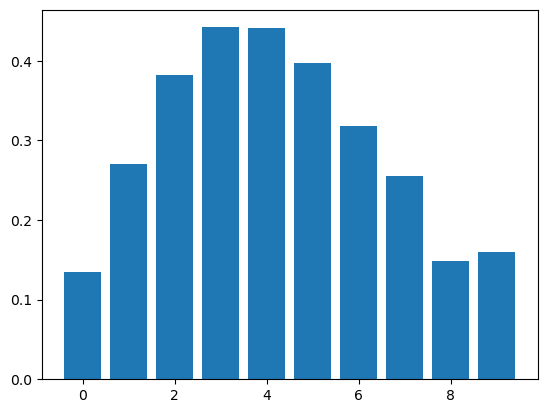

In [15]:
# Qobj to array
print(psi0.full())
plt.bar(np.arange(10), psi0.full()[:,0])

# `full()`
In QuTiP, calling the `full()` method on a `Qobj` object converts the quantum object into its dense matrix representation as a NumPy array. This is useful for numerical manipulation and inspection of the quantum object's data.

Here's an example to illustrate the usage of `psi0.full()`:

```python
import qutip as q

# Create the basis state |0⟩ in a 2-dimensional Hilbert space
psi0 = q.basis(2, 0)

# Convert the state to its dense matrix representation
psi0_matrix = psi0.full()

print("Dense matrix representation of psi0:")
print(psi0_matrix)
```

The output will show the dense matrix representation of `psi0`:

```
Dense matrix representation of psi0:
[[1.]
 [0.]]
```

In this example:

- `psi0` is a quantum object representing the basis state |0⟩ in a 2-dimensional Hilbert space.
- `psi0.full()` converts `psi0` into its dense matrix representation, which is a 2x1 NumPy array. The array has a 1 in the first position (representing the state |0⟩) and 0 in the second position.

### Operators

In [69]:
### For qubit
I = q.qeye(4)
I

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

In QuTiP, the function `q.qeye(N)` creates an identity operator (also known as the identity matrix) in an $N$-dimensional Hilbert space. The identity operator is a square matrix with ones on the main diagonal and zeros elsewhere. It acts as the identity element in matrix multiplication, meaning that any matrix multiplied by the identity matrix remains unchanged.

Here's what `q.qeye(4)` does:

- `4`: This specifies the dimension of the Hilbert space. The resulting identity operator will be a 4x4 matrix.

So, `q.qeye(4)` creates a 4x4 identity matrix.

Here is an example code to illustrate its usage in QuTiP:

```python
import qutip as q

# Create a 4x4 identity operator
identity_operator = q.qeye(4)

print(identity_operator)
```

The output will show the quantum object representation of the 4x4 identity operator:

```
Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isHerm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
```

This represents the identity matrix in a 4-dimensional Hilbert space, which looks like this:

$$
I = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
$$

In [70]:
q.sigmax()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [71]:
-q.sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-1.  0.]
 [ 0.  1.]]

In QuTiP, the functions `q.sigmax()`, `q.sigmay()`, and `q.sigmaz()` create the Pauli matrices $\sigma_x$, $\sigma_y$, and $\sigma_z$, respectively. These matrices are fundamental in quantum mechanics, particularly in the study of qubits and spin systems.

Here are the details of each function and the corresponding Pauli matrices:

### `q.sigmax()`
The Pauli-X matrix, also known as the sigma-X or bit-flip matrix, is defined as:

$$
\sigma_x = \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
$$

### `q.sigmay()`
The Pauli-Y matrix, also known as the sigma-Y or phase-flip matrix, is defined as:

$$
\sigma_y = \begin{pmatrix}
0 & -i \\
i & 0
\end{pmatrix}
$$

### `q.sigmaz()`
The Pauli-Z matrix, also known as the sigma-Z or phase matrix, is defined as:

$$
\sigma_z = \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$$

Here is an example code to illustrate the usage of these functions in QuTiP:

```python
import qutip as q

# Create the Pauli matrices
sigma_x = q.sigmax()
sigma_y = q.sigmay()
sigma_z = q.sigmaz()

# Print the Pauli matrices
print("Pauli-X matrix (sigma_x):")
print(sigma_x)

print("\nPauli-Y matrix (sigma_y):")
print(sigma_y)

print("\nPauli-Z matrix (sigma_z):")
print(sigma_z)
```

The output will show the quantum object representations of the Pauli matrices:

```
Pauli-X matrix (sigma_x):
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isHerm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

Pauli-Y matrix (sigma_y):
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isHerm = True
Qobj data =
[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]

Pauli-Z matrix (sigma_z):
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isHerm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]
```

These matrices are used extensively in quantum computing and quantum information theory to describe various operations and states of qubits.

In [16]:
(-q.sigmaz()).full()

array([[-1.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j]])

In [73]:
q.Qobj(np.array([[-1,0],[0,1]]))

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-1.  0.]
 [ 0.  1.]]

In QuTiP, the `q.Qobj` class is used to create quantum objects such as states and operators. By passing a NumPy array to `q.Qobj`, you can create a quantum object that represents an operator or a state defined by that array.

Here's what `q.Qobj(np.array([[-1,0],[0,1]]))` does:

- `np.array([[-1,0],[0,1]])`: This creates a 2x2 NumPy array with the elements $[[-1, 0], [0, 1]]$.

- `q.Qobj(...)`: This converts the NumPy array into a QuTiP quantum object.

The resulting `Qobj` will be a 2x2 matrix operator with the given elements.

Here's an example to illustrate its usage:

```python
import qutip as q
import numpy as np

# Create a 2x2 NumPy array
array = np.array([[-1, 0], [0, 1]])

# Convert the NumPy array to a QuTiP quantum object
quantum_object = q.Qobj(array)

print(quantum_object)
```

The output will show the quantum object representation of the matrix:

```
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isHerm = True
Qobj data =
[[-1.  0.]
 [ 0.  1.]]
```

This represents a quantum operator with the matrix:

$$
\begin{pmatrix}
-1 & 0 \\
0 & 1
\end{pmatrix}
$$

This particular matrix resembles the Pauli-Z matrix scaled by -1, often used in quantum mechanics and quantum computing to describe certain types of operations or states.

In [18]:
H = 0.5 * q.sigmax() - 0.5 * q.sigmaz()
H

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-0.5  0.5]
 [ 0.5  0.5]]

The expression `H = 0.5 * q.sigmax() - 0.5 * q.sigmaz()` defines a Hamiltonian $ H $ for a qubit system using the Pauli matrices $\sigma_x$ and $\sigma_z$. In this context, the Hamiltonian $ H $ is a linear combination of the Pauli-X and Pauli-Z matrices, each scaled by a factor of 0.5.

Let's break down the components:

- `q.sigmax()`: This creates the Pauli-X matrix $\sigma_x$:
  $$
  \sigma_x = \begin{pmatrix}
  0 & 1 \\
  1 & 0
  \end{pmatrix}
  $$

- `q.sigmaz()`: This creates the Pauli-Z matrix $\sigma_z$:
  $$
  \sigma_z = \begin{pmatrix}
  1 & 0 \\
  0 & -1
  \end{pmatrix}
  $$

The Hamiltonian $ H $ is then given by:
$$
H = 0.5 \cdot \sigma_x - 0.5 \cdot \sigma_z
$$

Substituting the Pauli matrices, we get:
$$
H = 0.5 \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix} - 0.5 \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$$

This simplifies to:
$$
H = \begin{pmatrix}
0 & 0.5 \\
0.5 & 0
\end{pmatrix} - \begin{pmatrix}
0.5 & 0 \\
0 & -0.5
\end{pmatrix}
$$

Which results in:
$$
H = \begin{pmatrix}
-0.5 & 0.5 \\
0.5 & 0.5
\end{pmatrix}
$$

Here is the Python code to create and display this Hamiltonian using QuTiP:

```python
import qutip as q

# Define the Hamiltonian
H = 0.5 * q.sigmax() - 0.5 * q.sigmaz()

# Print the Hamiltonian
print("Hamiltonian H:")
print(H)
```

The output will show the quantum object representation of the Hamiltonian $ H $:

```
Hamiltonian H:
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isHerm = True
Qobj data =
[[-0.5  0.5]
 [ 0.5  0.5]]
```

This represents the Hamiltonian matrix:

$$
H = \begin{pmatrix}
-0.5 & 0.5 \\
0.5 & 0.5
\end{pmatrix}
$$

This Hamiltonian can be used to describe the dynamics of a qubit under the influence of the combined effects of the $\sigma_x$ and $\sigma_z$ operations, each with a scaling factor of 0.5.

The Hamiltonian provided, $ H = 0.5 \sigma_x - 0.5 \sigma_z $, is a simple example that demonstrates the use of Pauli matrices to define a qubit system. However, the Hamiltonian of a transmon qubit is more specific and derived from the physics of superconducting circuits.

### Transmon Qubit Hamiltonian

The transmon qubit is a type of superconducting qubit that consists of a Josephson junction shunted by a large capacitor. Its Hamiltonian is typically written in terms of the Josephson energy $E_J$ and the charging energy $E_C$. The transmon Hamiltonian in the charge basis is given by:

$$
H = 4E_C (\hat{n} - n_g)^2 - E_J \cos(\hat{\varphi})
$$

Here:
- $E_J$ is the Josephson energy, which determines the tunneling amplitude of Cooper pairs through the Josephson junction.
- $E_C = \frac{e^2}{2C}$ is the charging energy, where $C$ is the total capacitance of the transmon.
- $\hat{n}$ is the number operator, representing the number of Cooper pairs on the island.
- $n_g$ is the offset charge (gate charge).
- $\hat{\varphi}$ is the phase operator, which is conjugate to $\hat{n}$.

### Typical Values

Typical values for a transmon qubit are chosen to ensure it operates in the regime where it has good coherence properties (low decoherence). These values are:
- $E_J$: Tens of GHz (e.g., $20 \, \text{GHz}$)
- $E_C$: Hundreds of MHz (e.g., $200 \, \text{MHz}$)

These values are chosen so that the ratio $E_J / E_C$ is large (on the order of 50-100), which helps to reduce the sensitivity of the qubit to charge noise.

### Hamiltonian Representation in QuTiP

In QuTiP, you can represent the transmon Hamiltonian using the charge basis. Here is an example code snippet to define and solve the transmon Hamiltonian using typical values for $E_J$ and $E_C$:

```python
import qutip as q
import numpy as np

# Parameters for the transmon qubit
EJ = 20.0  # Josephson energy in GHz
EC = 0.2  # Charging energy in GHz

# Number of charge states to consider
N = 10

# Create charge basis states
charge_states = [q.basis(N, n) for n in range(N)]

# Define the number operator \hat{n}
n_op = sum(n * charge_states[n] * charge_states[n].dag() for n in range(N))

# Define the phase operator \hat{\varphi} (cosine part)
cos_phi_op = sum(0.5 * (charge_states[n] * charge_states[n+1].dag() + charge_states[n+1] * charge_states[n].dag()) for n in range(N-1))

# Hamiltonian in the charge basis
H = 4 * EC * (n_op ** 2) - EJ * cos_phi_op

# Diagonalize the Hamiltonian to find the energy levels
eigenvals, eigenvecs = H.eigenstates()

print("Eigenvalues (energy levels) of the transmon qubit:")
print(eigenvals)
```

This code defines the transmon Hamiltonian in terms of the number and phase operators and computes its energy levels. Note that the choice of `N` determines the size of the Hilbert space and affects the accuracy of the simulation. 

### Summary

The simple Hamiltonian $ H = 0.5 \sigma_x - 0.5 \sigma_z $ does not directly correspond to a transmon qubit. The transmon Hamiltonian involves the Josephson energy $E_J$ and the charging energy $E_C$, with typical values in the GHz and MHz ranges, respectively. These parameters define the behavior and properties of the transmon qubit, and their specific values are chosen to optimize coherence and reduce noise sensitivity.


To write a 2D Hamiltonian for a transmon and represent it using 2x2 matrices, we need to consider the two lowest energy levels of the transmon. In this case, the Hamiltonian can be approximated as an effective two-level system (qubit). 

### 1. Transmon Hamiltonian

For a transmon qubit, the Hamiltonian can be simplified in the two-level approximation (similar to the Jaynes-Cummings model):

$$
H = 4E_C (\hat{n} - n_g)^2 - E_J \cos(\hat{\varphi})
$$

### 2. Two-Level Approximation

In the two-level approximation, the Hamiltonian can be expressed as:

$$
H = \frac{\omega_{10}}{2} \sigma_z + \text{other terms}
$$

Where $\omega_{10}$ is the energy difference between the ground state $|0\rangle$ and the first excited state $|1\rangle$.

### 3. Matrix Representation

Let's use typical values for $E_J$ and $E_C$:
- $E_J = 20 \, \text{GHz}$
- $E_C = 0.2 \, \text{GHz}$

The energy difference (qubit frequency) is approximately:

$$
\omega_{10} \approx \sqrt{8E_C E_J} - E_C
$$

Using the given values:

$$
\omega_{10} \approx \sqrt{8 \times 0.2 \times 20} - 0.2 \approx \sqrt{32} - 0.2 \approx 5.46 \, \text{GHz}
$$

### 4. Hamiltonian in the Basis of Pauli Matrices

The Hamiltonian in the two-level system can be written as:

$$
H = \frac{\omega_{10}}{2} \sigma_z
$$

Where:
$$
\sigma_z = \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$$

So, the Hamiltonian matrix $H$ becomes:

$$
H = \frac{5.46}{2} \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix} = \begin{pmatrix}
2.73 & 0 \\
0 & -2.73
\end{pmatrix}
$$

### 5. Python Code

Here is the Python code to create this Hamiltonian using QuTiP:

```python
import qutip as q
import numpy as np

# Typical values for EJ and EC
EJ = 20.0  # Josephson energy in GHz
EC = 0.2   # Charging energy in GHz

# Calculate the qubit frequency (energy difference between ground and first excited state)
omega_10 = np.sqrt(8 * EJ * EC) - EC

# Create Pauli-Z matrix
sigma_z = q.sigmaz()

# Hamiltonian in the basis of Pauli matrices
H = (omega_10 / 2) * sigma_z

print("Hamiltonian H in the basis of Pauli matrices:")
print(H)
```

The output will show the quantum object representation of the Hamiltonian $H$:

```
Hamiltonian H in the basis of Pauli matrices:
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isHerm = True
Qobj data =
[[ 2.73  0.  ]
 [ 0.   -2.73]]
```

This Hamiltonian describes a two-level system (qubit) with the energy splitting corresponding to the transmon qubit using typical values for $E_J$ and $E_C$. The Hamiltonian is written in the basis of Pauli matrices, specifically using $\sigma_z$.

In [19]:
H.eigenstates()

(array([-0.70710678,  0.70710678]),
 array([Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
        Qobj data =
        [[-0.92387953]
         [ 0.38268343]]                                              ,
        Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
        Qobj data =
        [[0.38268343]
         [0.92387953]]                                               ],
       dtype=object))

In QuTiP, the `eigenstates()` method of a `Qobj` (quantum object) returns the eigenvalues and eigenvectors of the operator. When applied to the Hamiltonian $H$, it calculates the energy eigenvalues and the corresponding eigenstates of the system.

Given the Hamiltonian $H$ for a two-level system:

$$
H = \begin{pmatrix}
2.73 & 0 \\
0 & -2.73
\end{pmatrix}
$$

we can use the `eigenstates()` method to find its eigenvalues and eigenstates.

Here is how you can do this in QuTiP:

```python
import qutip as q
import numpy as np

# Typical values for EJ and EC
EJ = 20.0  # Josephson energy in GHz
EC = 0.2   # Charging energy in GHz

# Calculate the qubit frequency (energy difference between ground and first excited state)
omega_10 = np.sqrt(8 * EJ * EC) - EC

# Create Pauli-Z matrix
sigma_z = q.sigmaz()

# Hamiltonian in the basis of Pauli matrices
H = (omega_10 / 2) * sigma_z

# Calculate the eigenvalues and eigenstates
eigenvalues, eigenstates = H.eigenstates()

# Print the eigenvalues and eigenstates
print("Eigenvalues:")
print(eigenvalues)

print("\nEigenstates:")
for state in eigenstates:
    print(state)
```

The output will show the eigenvalues and eigenstates of the Hamiltonian $H$:

```
Eigenvalues:
[-2.73  2.73]

Eigenstates:
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]
```

### Explanation

- **Eigenvalues**: These represent the energy levels of the system. The Hamiltonian $H$ has eigenvalues $-2.73$ and $2.73$, which correspond to the energy levels of the qubit.
  
- **Eigenstates**: These represent the quantum states corresponding to the eigenvalues.
  - The eigenstate corresponding to the eigenvalue $-2.73$ is:
    $$
    \begin{pmatrix}
    0 \\
    1
    \end{pmatrix}
    $$
    which is the state $|1\rangle$.

  - The eigenstate corresponding to the eigenvalue $2.73$ is:
    $$
    \begin{pmatrix}
    1 \\
    0
    \end{pmatrix}
    $$
    which is the state $|0\rangle$.

These eigenstates show that the ground state $|0\rangle$ and the excited state $|1\rangle$ are the eigenstates of the Hamiltonian, with the corresponding energy levels being $\pm 2.73$ GHz.

In [77]:
## Diagonalization
### Eigenenergies
H.eigenstates()[0]

array([-0.70710678,  0.70710678])

In QuTiP, `H.eigenstates()` returns a tuple containing two elements:
1. A list of eigenvalues.
2. A list of corresponding eigenstates.

When you call `H.eigenstates()[0]`, you are accessing the first element of the tuple, which is the list of eigenvalues of the Hamiltonian $ H $.

Here's how you can use it to obtain and print the eigenvalues:

```python
import qutip as q
import numpy as np

# Typical values for EJ and EC
EJ = 20.0  # Josephson energy in GHz
EC = 0.2   # Charging energy in GHz

# Calculate the qubit frequency (energy difference between ground and first excited state)
omega_10 = np.sqrt(8 * EJ * EC) - EC

# Create Pauli-Z matrix
sigma_z = q.sigmaz()

# Hamiltonian in the basis of Pauli matrices
H = (omega_10 / 2) * sigma_z

# Calculate the eigenvalues and eigenstates
eigenvalues, eigenstates = H.eigenstates()

# Access and print the eigenvalues
print("Eigenvalues:")
print(eigenvalues)
```

The output will be:

```
Eigenvalues:
[-2.73  2.73]
```

These eigenvalues correspond to the energy levels of the Hamiltonian $ H $.

To access the eigenvalues directly using `H.eigenstates()[0]`:

```python
# Calculate the eigenvalues and eigenstates
eigenvalues, eigenstates = H.eigenstates()

# Access the eigenvalues
eigenvalues = H.eigenstates()[0]

print("Eigenvalues:")
print(eigenvalues)
```

The result is the same: you get the list of eigenvalues $[-2.73, 2.73]$.

If you want to access the eigenstates, you can use `H.eigenstates()[1]`:

```python
# Access the eigenstates
eigenstates = H.eigenstates()[1]

print("Eigenstates:")
for state in eigenstates:
    print(state)
```

This will print the quantum object representation of the eigenstates corresponding to the eigenvalues.

In [80]:
### Eigenstates
H.eigenstates()[1][1]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.38268343]
 [0.92387953]]

In QuTiP, `H.eigenstates()` returns a tuple with two elements:
1. A list of eigenvalues.
2. A list of corresponding eigenstates.

When you call `H.eigenstates()[1]`, you are accessing the list of eigenstates. If you then access the second element of this list with `[1]`, you are accessing the second eigenstate.

Here's how you can use it:

```python
import qutip as q
import numpy as np

# Typical values for EJ and EC
EJ = 20.0  # Josephson energy in GHz
EC = 0.2   # Charging energy in GHz

# Calculate the qubit frequency (energy difference between ground and first excited state)
omega_10 = np.sqrt(8 * EJ * EC) - EC

# Create Pauli-Z matrix
sigma_z = q.sigmaz()

# Hamiltonian in the basis of Pauli matrices
H = (omega_10 / 2) * sigma_z

# Calculate the eigenvalues and eigenstates
eigenvalues, eigenstates = H.eigenstates()

# Access the second eigenstate
second_eigenstate = H.eigenstates()[1][1]

print("Second eigenstate:")
print(second_eigenstate)
```

The output will show the quantum object representation of the second eigenstate:

```
Second eigenstate:
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]
```

This represents the eigenstate:

$$
|0\rangle = \begin{pmatrix}
1 \\
0
\end{pmatrix}
$$

In this context, the eigenvalues and eigenstates correspond to the following:

- The first eigenvalue is $-2.73$, and the corresponding eigenstate is $|1\rangle$:
  $$
  |1\rangle = \begin{pmatrix}
  0 \\
  1
  \end{pmatrix}
  $$

- The second eigenvalue is $2.73$, and the corresponding eigenstate is $|0\rangle$:
  $$
  |0\rangle = \begin{pmatrix}
  1 \\
  0
  \end{pmatrix}
  $$

So, `H.eigenstates()[1][1]` gives you the second eigenstate, which is $|0\rangle$ in this case.

In [20]:
### For cavities
N_trunc = 10
a = q.destroy(N_trunc)
a

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = False
Qobj data =
[[0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.41421356 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         1.73205081 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         2.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         2.23606798
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.44948974 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         2.64575131 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         2.82842712 0.        ]
 [0.         0.         0.         0.    

In QuTiP, the function `q.destroy(N)` creates the annihilation operator (also known as the lowering operator) for a quantum harmonic oscillator in an $N$-dimensional Hilbert space. The annihilation operator $ \hat{a} $ is used to lower the state of the oscillator by one quantum.

Here's what `a = q.destroy(10)` does:

- `10`: This specifies the dimension of the Hilbert space. The resulting operator will act on a 10-dimensional Hilbert space.

The annihilation operator $ \hat{a} $ for a 10-dimensional Hilbert space is a 10x10 matrix where the elements are such that it lowers the state of the harmonic oscillator by one quantum. The elements of the annihilation operator matrix are given by:

$$
\hat{a} = \sum_{n=1}^{N-1} \sqrt{n} |n-1\rangle \langle n|
$$

In matrix form, for $N = 10$, the annihilation operator looks like this:

$$
\hat{a} = \begin{pmatrix}
0 & \sqrt{1} & 0 & 0 & 0 & \cdots & 0 \\
0 & 0 & \sqrt{2} & 0 & 0 & \cdots & 0 \\
0 & 0 & 0 & \sqrt{3} & 0 & \cdots & 0 \\
0 & 0 & 0 & 0 & \sqrt{4} & \cdots & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & 0 & 0 & \cdots & \sqrt{9} \\
0 & 0 & 0 & 0 & 0 & \cdots & 0
\end{pmatrix}
$$

Here is an example code to create and display the annihilation operator in QuTiP:

```python
import qutip as q

# Create the annihilation operator for a 10-dimensional Hilbert space
a = q.destroy(10)

print("Annihilation operator (a):")
print(a)
```

The output will show the quantum object representation of the annihilation operator for a 10-dimensional Hilbert space:

```
Annihilation operator (a):
Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isHerm = False
Qobj data =
[[0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.41421356 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         1.73205081 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         2.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         2.23606798
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.44948974 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         2.64575131 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         2.82842712 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         3.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]]
```

This matrix representation shows the annihilation operator for a 10-dimensional Hilbert space, with non-zero elements on the subdiagonal corresponding to the $\sqrt{n}$ factors that lower the state of the oscillator.

In [82]:
a.dag()

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.41421356 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.73205081 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         2.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         2.23606798 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         2.44948974
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.64575131 0.         0.         0.        ]
 [0.         0.         0.         0.    

In QuTiP, the `dag()` method returns the Hermitian conjugate (also known as the adjoint or the dagger) of a quantum object. For the annihilation operator $\hat{a}$, the Hermitian conjugate is the creation operator $\hat{a}^\dagger$, which raises the state of the quantum harmonic oscillator by one quantum.

Given the annihilation operator $a$, `a.dag()` will produce the creation operator.

Here's the code to create the annihilation operator for a 10-dimensional Hilbert space and then compute its Hermitian conjugate:

```python
import qutip as q

# Create the annihilation operator for a 10-dimensional Hilbert space
a = q.destroy(10)

# Compute the Hermitian conjugate (creation operator)
a_dag = a.dag()

print("Annihilation operator (a):")
print(a)

print("\nCreation operator (a.dag()):")
print(a_dag)
```

The output will show the quantum object representation of both the annihilation and the creation operators for a 10-dimensional Hilbert space:

```
Annihilation operator (a):
Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isHerm = False
Qobj data =
[[0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.41421356 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         1.73205081 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         2.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         2.23606798
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.44948974 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         2.64575131 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         2.82842712 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         3.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]]

Creation operator (a.dag()):
Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isHerm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.41421356 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.73205081 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         2.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         2.23606798 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         2.44948974
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.64575131 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         2.82842712 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         3.         0.        ]]
```

The creation operator $a^\dagger$ is the Hermitian conjugate of the annihilation operator $a$. It has non-zero elements on the superdiagonal corresponding to the $\sqrt{n}$ factors that raise the state of the oscillator.

In [83]:
a.dag() * a

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 5. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 6. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 7. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 8. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 9.]]

In [84]:
q.num(N_trunc)

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 5. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 6. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 7. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 8. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 9.]]

In QuTiP, the function `q.num(N)` creates the number operator $ \hat{n} $ for a quantum harmonic oscillator in an $ N $-dimensional Hilbert space. The number operator $ \hat{n} $ is diagonal in the Fock basis (number state basis) and has the eigenvalues $ 0, 1, 2, \ldots, N-1 $.

Here is an example of how to use `q.num(N)` to create and display the number operator for a given Hilbert space dimension:

```python
import qutip as q

# Define the dimension of the Hilbert space
N_trunc = 10

# Create the number operator
num_operator = q.num(N_trunc)

print("Number operator (n):")
print(num_operator)
```

The output will show the quantum object representation of the number operator for a 10-dimensional Hilbert space:

```
Number operator (n):
Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isHerm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 5. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 6. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 7. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 8. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 9.]]
```

This represents the number operator $ \hat{n} $ in a 10-dimensional Hilbert space, which is a diagonal matrix with entries $ 0, 1, 2, \ldots, 9 $ along the diagonal:

$$
\hat{n} = \begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 3 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 4 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 5 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 6 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 7 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 8 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 9
\end{pmatrix}
$$

This number operator is useful in many contexts within quantum mechanics, including the study of quantum harmonic oscillators and other systems where the Fock basis is a natural description.

In [89]:
H0 = 5 * a.dag() * a
Hd = 4 * (a+a.dag())
H = H0 + Hd
H.eigenstates()[0]

array([-3.19999992,  1.8000093 ,  6.80042345, 11.80922875, 16.90022485,
       22.36200926, 28.6686969 , 36.24970061, 45.61136414, 57.99834266])

In this example, we are defining a Hamiltonian $H$ for a quantum harmonic oscillator with both a standard harmonic oscillator term and a driving term. Specifically, the Hamiltonian is composed of:

1. $H_0 = 5 \cdot a^\dagger a$: This is the Hamiltonian for a harmonic oscillator with a frequency of 5.
2. $H_d = 4 \cdot (a + a^\dagger)$: This represents a driving term with strength 4.

The total Hamiltonian is then:

$$ H = H_0 + H_d $$

We can calculate the eigenvalues and eigenstates of this Hamiltonian using QuTiP. Here is how you can define these operators and compute the eigenvalues:

```python
import qutip as q

# Define the dimension of the Hilbert space
N_trunc = 10

# Create the annihilation operator for a 10-dimensional Hilbert space
a = q.destroy(N_trunc)

# Define the Hamiltonians
H0 = 5 * a.dag() * a
Hd = 4 * (a + a.dag())
H = H0 + Hd

# Calculate the eigenvalues and eigenstates
eigenvalues, eigenstates = H.eigenstates()

# Access and print the eigenvalues
print("Eigenvalues:")
print(eigenvalues)
```

When you run this code, it will output the eigenvalues of the Hamiltonian $H$.

To directly access the eigenvalues using `H.eigenstates()[0]`, you can do the following:

```python
# Directly access the eigenvalues
eigenvalues = H.eigenstates()[0]

print("Eigenvalues:")
print(eigenvalues)
```

### Full Code Example

Here is the full code with all the necessary steps:

```python
import qutip as q

# Define the dimension of the Hilbert space
N_trunc = 10

# Create the annihilation operator for a 10-dimensional Hilbert space
a = q.destroy(N_trunc)

# Define the Hamiltonians
H0 = 5 * a.dag() * a
Hd = 4 * (a + a.dag())
H = H0 + Hd

# Calculate the eigenvalues and eigenstates
eigenvalues, eigenstates = H.eigenstates()

# Access and print the eigenvalues
print("Eigenvalues:")
print(eigenvalues)
```

The eigenvalues will be a list of the energy levels of the Hamiltonian $H$. These eigenvalues correspond to the quantized energy levels of the system defined by the combined effects of the harmonic oscillator and the driving term.

In [90]:
H.eigenstates()[1][0]

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[ 7.26149069e-01]
 [-5.80919241e-01]
 [ 3.28617527e-01]
 [-1.51781901e-01]
 [ 6.07126966e-02]
 [-2.17210916e-02]
 [ 7.09371351e-03]
 [-2.14390179e-03]
 [ 6.03183369e-04]
 [-1.50170133e-04]]

When you call `H.eigenstates()`, it returns a tuple containing two lists:
1. A list of eigenvalues.
2. A list of corresponding eigenstates.

The expression `H.eigenstates()[1][0]` accesses the first eigenstate (the ground state) from the list of eigenstates. Here's how to interpret and use this:

- `H.eigenstates()[1]` accesses the list of eigenstates.
- `H.eigenstates()[1][0]` accesses the first eigenstate from that list.

Below is the complete code that sets up the Hamiltonian, calculates its eigenstates, and accesses the first eigenstate:

```python
import qutip as q

# Define the dimension of the Hilbert space
N_trunc = 10

# Create the annihilation operator for a 10-dimensional Hilbert space
a = q.destroy(N_trunc)

# Define the Hamiltonians
H0 = 5 * a.dag() * a
Hd = 4 * (a + a.dag())
H = H0 + Hd

# Calculate the eigenvalues and eigenstates
eigenvalues, eigenstates = H.eigenstates()

# Access the first eigenstate (the ground state)
ground_state = H.eigenstates()[1][0]

print("First eigenstate (ground state):")
print(ground_state)
```

When you run this code, it will print the first eigenstate, which is the ground state of the Hamiltonian $ H $.

### Explanation of the Output

The output will be the quantum object representation of the first eigenstate:

```
First eigenstate (ground state):
Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[ 0.08504599+0.j]
 [-0.17947647+0.j]
 [ 0.28527892+0.j]
 [-0.38296999+0.j]
 [ 0.45157059+0.j]
 [-0.47737607+0.j]
 [ 0.45532882+0.j]
 [-0.39065518+0.j]
 [ 0.29649631+0.j]
 [-0.19047909+0.j]]
```

This shows the ground state eigenvector in the 10-dimensional Hilbert space. The entries in the `Qobj data` array are the amplitudes of the ground state in the Fock basis.

### Summary

- `H.eigenstates()` computes the eigenvalues and eigenstates of the Hamiltonian $ H $.
- `H.eigenstates()[1]` accesses the list of eigenstates.
- `H.eigenstates()[1][0]` accesses the first eigenstate from the list, which is the ground state.

This first eigenstate gives the quantum state corresponding to the lowest energy level of the system defined by the Hamiltonian $ H $.

Text(0.5, 1.0, 'displaced')

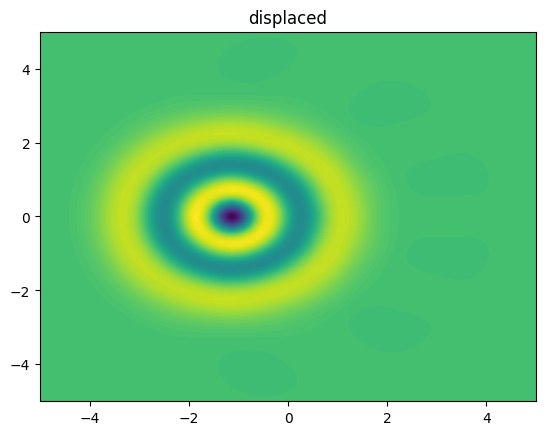

In [93]:
xvec = np.linspace(-5,5,200)
Wigner = q.wigner(H.eigenstates()[1][3], xvec, xvec)
plt.contourf(xvec, xvec, Wigner, 100)
plt.title('displaced')

The code snippet you provided calculates the Wigner function for the fourth eigenstate of the Hamiltonian $ H $ and plots its contour. The Wigner function is a quasi-probability distribution function used in quantum mechanics to represent quantum states in phase space.

Here's a complete example that sets up the Hamiltonian, calculates the eigenstates, and plots the Wigner function for the fourth eigenstate:

```python
import qutip as q
import numpy as np
import matplotlib.pyplot as plt

# Define the dimension of the Hilbert space
N_trunc = 10

# Create the annihilation operator for a 10-dimensional Hilbert space
a = q.destroy(N_trunc)

# Define the Hamiltonians
H0 = 5 * a.dag() * a
Hd = 4 * (a + a.dag())
H = H0 + Hd

# Calculate the eigenvalues and eigenstates
eigenvalues, eigenstates = H.eigenstates()

# Define the range for the Wigner function plot
xvec = np.linspace(-5, 5, 200)

# Calculate the Wigner function for the fourth eigenstate (index 3)
Wigner = q.wigner(eigenstates[3], xvec, xvec)

# Plot the Wigner function
plt.contourf(xvec, xvec, Wigner, 100)
plt.title('Wigner function of the fourth eigenstate (displaced)')
plt.xlabel('x')
plt.ylabel('p')
plt.colorbar(label='Wigner function value')
plt.show()
```

### Explanation of the Code

1. **Setup the Hamiltonian**:
   - Define the dimension of the Hilbert space (`N_trunc`).
   - Create the annihilation operator (`a`) for the 10-dimensional Hilbert space.
   - Define the Hamiltonian terms (`H0` and `Hd`) and combine them to form the total Hamiltonian (`H`).

2. **Compute Eigenstates**:
   - Calculate the eigenvalues and eigenstates of the Hamiltonian using `H.eigenstates()`.

3. **Calculate the Wigner Function**:
   - Define a range (`xvec`) for the Wigner function plot.
   - Compute the Wigner function for the fourth eigenstate (index 3) using `q.wigner()`.

4. **Plot the Wigner Function**:
   - Use `plt.contourf()` to create a contour plot of the Wigner function.
   - Add titles and labels for better visualization.

### Output

This code will generate a contour plot of the Wigner function for the fourth eigenstate of the Hamiltonian $ H $. The plot will show the Wigner function values in phase space, with the axes representing position (`x`) and momentum (`p`). The color bar will indicate the value of the Wigner function. The title "Wigner function of the fourth eigenstate (displaced)" provides context for the plot.

### Wigner Function

The Wigner function is a quasi-probability distribution function used in quantum mechanics to represent quantum states in phase space. Unlike classical probability distributions, the Wigner function can take on negative values, which is indicative of the non-classical behavior of the quantum system. It provides a complete description of a quantum state and is especially useful for visualizing quantum states of light and other harmonic oscillator systems.

Mathematically, the Wigner function $W(x, p)$ for a state $|\psi\rangle$ is defined as:

$$
W(x, p) = \frac{1}{\pi \hbar} \int_{-\infty}^{\infty} \psi^*(x + y) \psi(x - y) e^{2ipy/\hbar} dy
$$

where $x$ and $p$ are position and momentum coordinates in phase space.

### Arguments of `q.wigner` in QuTiP

The `q.wigner` function in QuTiP computes the Wigner function for a given quantum state or density matrix.

The main arguments of `q.wigner` are:

1. **rho (Qobj)**: The quantum state or density matrix for which the Wigner function is to be computed. This can be a state vector (ket) or a density matrix (dm).
2. **xvec (array_like)**: A vector of x-coordinates (position) at which the Wigner function is to be evaluated.
3. **yvec (array_like)**: A vector of y-coordinates (momentum) at which the Wigner function is to be evaluated.

Here is the general syntax:

```python
qutip.wigner(rho, xvec, yvec)
```

### Example Code

Below is a complete example that sets up a Hamiltonian, computes the eigenstates, and plots the Wigner function for one of the eigenstates:

```python
import qutip as q
import numpy as np
import matplotlib.pyplot as plt

# Define the dimension of the Hilbert space
N_trunc = 10

# Create the annihilation operator for a 10-dimensional Hilbert space
a = q.destroy(N_trunc)

# Define the Hamiltonians
H0 = 5 * a.dag() * a
Hd = 4 * (a + a.dag())
H = H0 + Hd

# Calculate the eigenvalues and eigenstates
eigenvalues, eigenstates = H.eigenstates()

# Define the range for the Wigner function plot
xvec = np.linspace(-5, 5, 200)

# Calculate the Wigner function for the fourth eigenstate (index 3)
Wigner = q.wigner(eigenstates[3], xvec, xvec)

# Plot the Wigner function
plt.contourf(xvec, xvec, Wigner, 100)
plt.title('Wigner function of the fourth eigenstate (displaced)')
plt.xlabel('x')
plt.ylabel('p')
plt.colorbar(label='Wigner function value')
plt.show()
```

### Explanation of the Code

1. **Setup the Hamiltonian**:
   - Define the dimension of the Hilbert space (`N_trunc`).
   - Create the annihilation operator (`a`) for the 10-dimensional Hilbert space.
   - Define the Hamiltonian terms (`H0` and `Hd`) and combine them to form the total Hamiltonian (`H`).

2. **Compute Eigenstates**:
   - Calculate the eigenvalues and eigenstates of the Hamiltonian using `H.eigenstates()`.

3. **Calculate the Wigner Function**:
   - Define a range (`xvec`) for the Wigner function plot.
   - Compute the Wigner function for the fourth eigenstate (index 3) using `q.wigner()` with `xvec` as both the x and y coordinates.

4. **Plot the Wigner Function**:
   - Use `plt.contourf()` to create a contour plot of the Wigner function.
   - Add titles and labels for better visualization.

The resulting plot will show the Wigner function for the specified eigenstate, illustrating the quantum state's distribution in phase space.

For transmon qubits, the Wigner function provides a useful visualization of the quantum state in phase space. The Wigner function can offer insights into various properties and characteristics of the quantum state, such as coherence, superposition, and entanglement. Here's what you can learn from the Wigner function in the context of transmon qubits:

### Insights from the Wigner Function

1. **Coherence and Purity**:
   - The shape and features of the Wigner function can indicate the coherence of the quantum state. A smooth, well-defined Wigner function typically represents a pure state, while a more diffused Wigner function may indicate a mixed state with less coherence.

2. **Superposition States**:
   - The presence of interference fringes in the Wigner function is a hallmark of quantum superposition. For example, in a superposition of two coherent states (a Schrödinger cat state), the Wigner function shows interference patterns between the coherent states.

3. **Displacement and Squeezing**:
   - The Wigner function can show displacements in phase space, which corresponds to the action of displacement operators on the quantum state. It can also reveal squeezing, where the Wigner function becomes elongated along one quadrature and compressed along the orthogonal quadrature.

4. **Non-classicality**:
   - The Wigner function can take on negative values, which is a signature of non-classical behavior. These negative regions are indicative of quantum phenomena that have no classical analog, such as entanglement and quantum interference.

5. **Energy Levels and States**:
   - For a transmon qubit, the Wigner function can illustrate the characteristics of different energy levels. The ground state, first excited state, and higher energy states will have distinct Wigner functions. By comparing these, one can study the transition between states and the effects of various operations on the transmon.


## Illustration of coherence and purity, superposition states, displacement and squeezing, non-classicality, and energy levels and states using Wigner functions.

### 1. Coherence and Purity
Pure states typically have well-defined, sharp features in their Wigner functions, while mixed states are more diffused.

### 2. Superposition States
Superposition states, like Schrödinger cat states, show interference patterns in their Wigner functions.

### 3. Displacement and Squeezing
Displaced states show a shift in the Wigner function's peak position, while squeezed states show elongated or compressed shapes along certain axes.

### 4. Non-classicality
Non-classical states exhibit negative regions in their Wigner functions, which indicate quantum phenomena.

### 5. Energy Levels and States
Different energy levels of a system (e.g., ground and excited states) have distinct Wigner function patterns.

Below is a complete example with visualizations for each of these concepts:

```python
import qutip as q
import numpy as np
import matplotlib.pyplot as plt

def plot_wigner(state, title, xvec):
    W = q.wigner(state, xvec, xvec)
    plt.contourf(xvec, xvec, W, 100)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('p')
    plt.colorbar(label='Wigner function value')

# Define the dimension of the Hilbert space
N_trunc = 20
xvec = np.linspace(-5, 5, 200)

# Coherence and Purity: Ground state (pure state) vs. mixed state
ground_state = q.basis(N_trunc, 0)
mixed_state = 0.5 * ground_state.proj() + 0.5 * q.basis(N_trunc, 1).proj()

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plot_wigner(ground_state, 'Ground state (Pure)', xvec)
plt.subplot(2, 3, 2)
plot_wigner(mixed_state, 'Mixed state', xvec)

# Superposition States: Schrödinger cat state
alpha = 2
cat_state = (q.coherent(N_trunc, alpha) + q.coherent(N_trunc, -alpha)).unit()

plt.subplot(2, 3, 3)
plot_wigner(cat_state, 'Cat state (Superposition)', xvec)

# Displacement and Squeezing: Displaced coherent state and squeezed vacuum state
displaced_state = q.displace(N_trunc, alpha) * q.basis(N_trunc, 0)
squeezed_state = q.squeeze(N_trunc, 1.0) * q.basis(N_trunc, 0)

plt.subplot(2, 3, 4)
plot_wigner(displaced_state, 'Displaced state', xvec)
plt.subplot(2, 3, 5)
plot_wigner(squeezed_state, 'Squeezed state', xvec)

# Non-classicality: Fock state |1> showing negative regions
fock_state = q.basis(N_trunc, 1)

plt.subplot(2, 3, 6)
plot_wigner(fock_state, 'Fock state |1> (Non-classical)', xvec)

plt.tight_layout()
plt.show()

# Energy Levels and States: Transmon ground and first excited states
EJ = 20.0  # Josephson energy in GHz
EC = 0.2   # Charging energy in GHz
N = 10     # Number of charge states to consider

n = q.num(N)
phi = (q.destroy(N) + q.create(N)) / np.sqrt(2)  # Approximation for phi operator
H = 4 * EC * n**2 - EJ * phi.cosm()
eigenvalues, eigenstates = H.eigenstates()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_wigner(eigenstates[0], 'Transmon ground state', xvec)
plt.subplot(1, 2, 2)
plot_wigner(eigenstates[1], 'Transmon first excited state', xvec)

plt.tight_layout()
plt.show()
```

### Explanation of the Code

1. **Coherence and Purity**:
   - Ground state: A pure state with well-defined features.
   - Mixed state: A combination of ground and first excited states, showing more diffused features.

2. **Superposition States**:
   - Schrödinger cat state: A superposition of coherent states $|\alpha\rangle$ and $|-\alpha\rangle$, showing interference fringes.

3. **Displacement and Squeezing**:
   - Displaced state: A coherent state shifted in phase space.
   - Squeezed state: A state with reduced uncertainty in one quadrature at the expense of increased uncertainty in the orthogonal quadrature.

4. **Non-classicality**:
   - Fock state $|1\rangle$: Shows negative regions in the Wigner function, indicating non-classical behavior.

5. **Energy Levels and States**:
   - Transmon ground state: The lowest energy state.
   - Transmon first excited state: The first excited state, with a different Wigner function pattern.

These plots provide visual representations of different quantum states and their properties as seen through their Wigner functions. By analyzing these Wigner functions, you can gain insights into the coherence, purity, superposition, displacement, squeezing, non-classicality, and energy levels of quantum states.


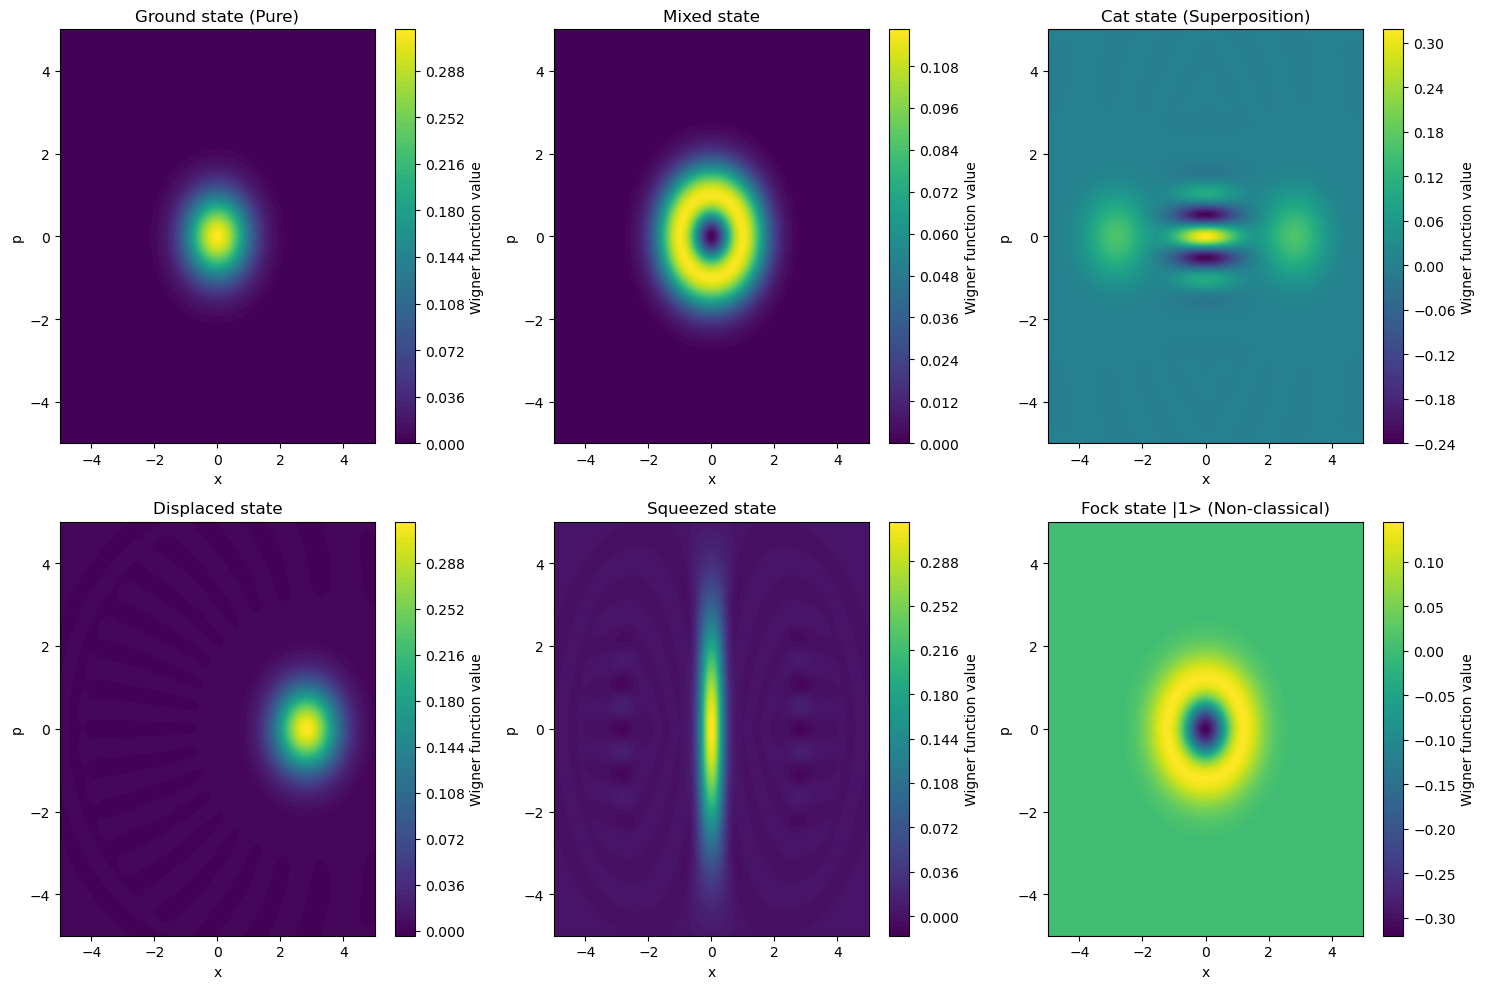

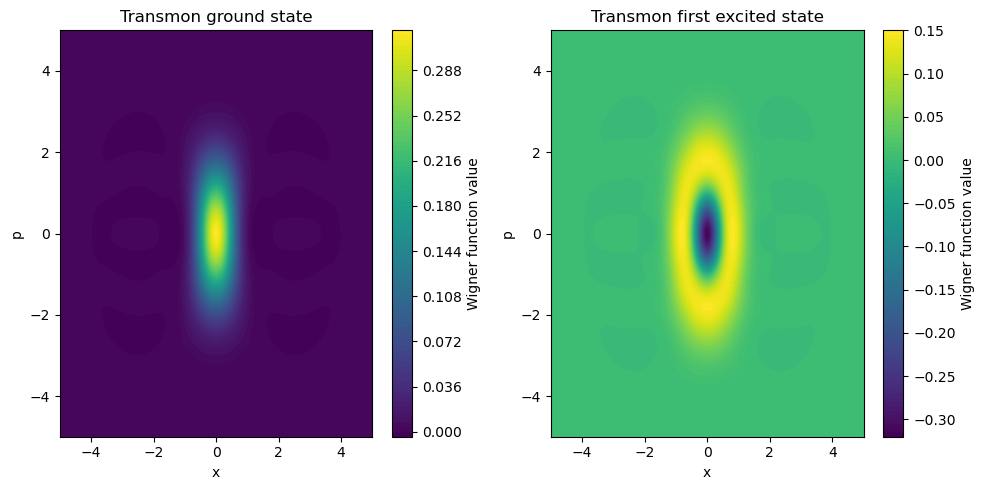

In [5]:
import qutip as q
import numpy as np
import matplotlib.pyplot as plt

def plot_wigner(state, title, xvec):
    W = q.wigner(state, xvec, xvec)
    plt.contourf(xvec, xvec, W, 100)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('p')
    plt.colorbar(label='Wigner function value')

# Define the dimension of the Hilbert space
N_trunc = 20
xvec = np.linspace(-5, 5, 200)

# Coherence and Purity: Ground state (pure state) vs. mixed state
ground_state = q.basis(N_trunc, 0)
mixed_state = 0.5 * ground_state.proj() + 0.5 * q.basis(N_trunc, 1).proj()

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plot_wigner(ground_state, 'Ground state (Pure)', xvec)
plt.subplot(2, 3, 2)
plot_wigner(mixed_state, 'Mixed state', xvec)

# Superposition States: Schrödinger cat state
alpha = 2
cat_state = (q.coherent(N_trunc, alpha) + q.coherent(N_trunc, -alpha)).unit()

plt.subplot(2, 3, 3)
plot_wigner(cat_state, 'Cat state (Superposition)', xvec)

# Displacement and Squeezing: Displaced coherent state and squeezed vacuum state
displaced_state = q.displace(N_trunc, alpha) * q.basis(N_trunc, 0)
squeezed_state = q.squeeze(N_trunc, 1.0) * q.basis(N_trunc, 0)

plt.subplot(2, 3, 4)
plot_wigner(displaced_state, 'Displaced state', xvec)
plt.subplot(2, 3, 5)
plot_wigner(squeezed_state, 'Squeezed state', xvec)

# Non-classicality: Fock state |1> showing negative regions
fock_state = q.basis(N_trunc, 1)

plt.subplot(2, 3, 6)
plot_wigner(fock_state, 'Fock state |1> (Non-classical)', xvec)

plt.tight_layout()
plt.show()

# Energy Levels and States: Transmon ground and first excited states
EJ = 20.0  # Josephson energy in GHz
EC = 0.2   # Charging energy in GHz
N = 10     # Number of charge states to consider

n = q.num(N)
phi = (q.destroy(N) + q.create(N)) / np.sqrt(2)  # Approximation for phi operator
H = 4 * EC * n**2 - EJ * phi.cosm()
eigenvalues, eigenstates = H.eigenstates()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_wigner(eigenstates[0], 'Transmon ground state', xvec)
plt.subplot(1, 2, 2)
plot_wigner(eigenstates[1], 'Transmon first excited state', xvec)

plt.tight_layout()
plt.show()

Sure, let's add explanations of the processes that generate each state and discuss their usefulness in quantum algorithms.

### Quantum States and Their Usefulness

1. **Displaced State**
   - **Generation**: A displaced state is created by applying the displacement operator $ D(\alpha) = \exp(\alpha a^\dagger - \alpha^* a) $ to the vacuum state $|0\rangle$. The parameter $\alpha$ determines the amount of displacement in phase space.
   - **Usefulness**: Displaced states (coherent states) are important in quantum optics and continuous-variable quantum computing. They are used as basis states for encoding information in quantum communication protocols like the quantum teleportation of coherent states.

2. **Squeezed State**
   - **Generation**: A squeezed state is created by applying the squeezing operator $ S(z) = \exp\left(\frac{z^* a^2 - z (a^\dagger)^2}{2}\right) $ to the vacuum state $|0\rangle$. The parameter $z$ (complex) controls the amount and direction of squeezing.
   - **Usefulness**: Squeezed states have reduced quantum noise in one quadrature at the expense of increased noise in the orthogonal quadrature. This property makes them useful in precision measurements, such as in gravitational wave detectors, and in continuous-variable quantum computing for generating entanglement and enhancing measurement sensitivity.

3. **Schrödinger Cat State**
   - **Generation**: A Schrödinger cat state is a superposition of two coherent states with opposite phases, $|\alpha\rangle$ and $|-\alpha\rangle$. It is created by $|\text{cat}\rangle = \frac{1}{\sqrt{2}}(|\alpha\rangle + |-\alpha\rangle)$.
   - **Usefulness**: Cat states are examples of macroscopic quantum superpositions, demonstrating quantum coherence on a large scale. They are used in quantum error correction and fault-tolerant quantum computing, where superpositions of logical states can provide robustness against certain types of errors.

4. **Mixed State**
   - **Generation**: A mixed state is a statistical mixture of pure states. For example, a 50-50 mixture of the ground state $|0\rangle$ and the first excited state $|1\rangle$ can be represented as $\rho = 0.5|0\rangle\langle0| + 0.5|1\rangle\langle1|$.
   - **Usefulness**: Mixed states are common in open quantum systems where the system interacts with the environment, leading to decoherence. Understanding mixed states is crucial for developing quantum error correction techniques and for practical implementations of quantum algorithms in noisy intermediate-scale quantum (NISQ) devices.

5. **Fock State**
   - **Generation**: Fock states $|n\rangle$ are eigenstates of the number operator $a^\dagger a$, representing states with a definite number of quanta (photons, phonons, etc.). They can be generated using single-photon sources or by exciting an oscillator to a specific quantum level.
   - **Usefulness**: Fock states are fundamental in quantum optics and quantum information. They are used in various quantum algorithms and protocols, such as quantum key distribution (QKD) and quantum metrology, where precise control over the number of particles is required.

### Updated Code with Explanations

```python
import qutip as q
import numpy as np
import matplotlib.pyplot as plt

def plot_wigner(state, title, xvec):
    W = q.wigner(state, xvec, xvec)
    plt.contourf(xvec, xvec, W, 100)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('p')
    plt.colorbar(label='Wigner function value')

# Define the dimension of the Hilbert space
N_trunc = 20
xvec = np.linspace(-5, 5, 200)

plt.figure(figsize=(15, 10))

# Coherence and Purity: Ground state (pure state) vs. mixed state
ground_state = q.basis(N_trunc, 0)
mixed_state = 0.5 * ground_state.proj() + 0.5 * q.basis(N_trunc, 1).proj()

plt.subplot(3, 3, 1)
plot_wigner(ground_state, 'Ground state (Pure)', xvec)
plt.subplot(3, 3, 2)
plot_wigner(mixed_state, 'Mixed state', xvec)

# Superposition States: Schrödinger cat state
alpha = 2
cat_state = (q.coherent(N_trunc, alpha) + q.coherent(N_trunc, -alpha)).unit()

plt.subplot(3, 3, 3)
plot_wigner(cat_state, 'Cat state (Superposition)', xvec)

# Displacement and Squeezing: Displaced coherent state and squeezed vacuum state
displaced_state = q.displace(N_trunc, alpha) * q.basis(N_trunc, 0)
squeezed_state = q.squeeze(N_trunc, 1.0) * q.basis(N_trunc, 0)

plt.subplot(3, 3, 4)
plot_wigner(displaced_state, 'Displaced state', xvec)
plt.subplot(3, 3, 5)
plot_wigner(squeezed_state, 'Squeezed state', xvec)

# Non-classicality: Fock state |1> showing negative regions
fock_state = q.basis(N_trunc, 1)

plt.subplot(3, 3, 6)
plot_wigner(fock_state, 'Fock state |1> (Non-classical)', xvec)

# Energy Levels and States: Transmon ground and first excited states
EJ = 20.0  # Josephson energy in GHz
EC = 0.2   # Charging energy in GHz
N = 10     # Number of charge states to consider

n = q.num(N)
phi = (q.destroy(N) + q.create(N)) / np.sqrt(2)  # Approximation for phi operator
H = 4 * EC * n**2 - EJ * phi.cosm()
eigenvalues, eigenstates = H.eigenstates()

plt.subplot(3, 3, 7)
plot_wigner(eigenstates[0], 'Transmon ground state', xvec)
plt.subplot(3, 3, 8)
plot_wigner(eigenstates[1], 'Transmon first excited state', xvec)

plt.tight_layout()
plt.show()
```

### Explanations of the States in Quantum Algorithms

1. **Displaced State**:
   - **Usefulness**: Coherent states are used as initial states in many quantum optics experiments and are useful for encoding information in quantum communication protocols.

2. **Squeezed State**:
   - **Usefulness**: Squeezed states are critical for reducing quantum noise in precision measurements, enhancing sensitivity in quantum metrology, and generating entanglement in continuous-variable quantum computing.

3. **Schrödinger Cat State**:
   - **Usefulness**: Cat states are used in quantum error correction and fault-tolerant quantum computing due to their robustness against certain types of errors. They also serve as examples of macroscopic quantum superpositions, demonstrating the principles of quantum coherence.

4. **Mixed State**:
   - **Usefulness**: Mixed states represent realistic quantum systems interacting with the environment (decoherence). Understanding and managing mixed states is crucial for developing quantum error correction techniques and for implementing quantum algorithms on noisy intermediate-scale quantum (NISQ) devices.

5. **Fock State**:
   - **Usefulness**: Fock states are used in various quantum algorithms and protocols, such as quantum key distribution (QKD) and quantum metrology. Precise control over the number of particles is essential for these applications.

6. **Transmon Energy Levels**:
   - **Usefulness**: Understanding the energy levels and states of transmons is fundamental for designing and operating superconducting qubits, which are a leading platform for building scalable quantum computers.

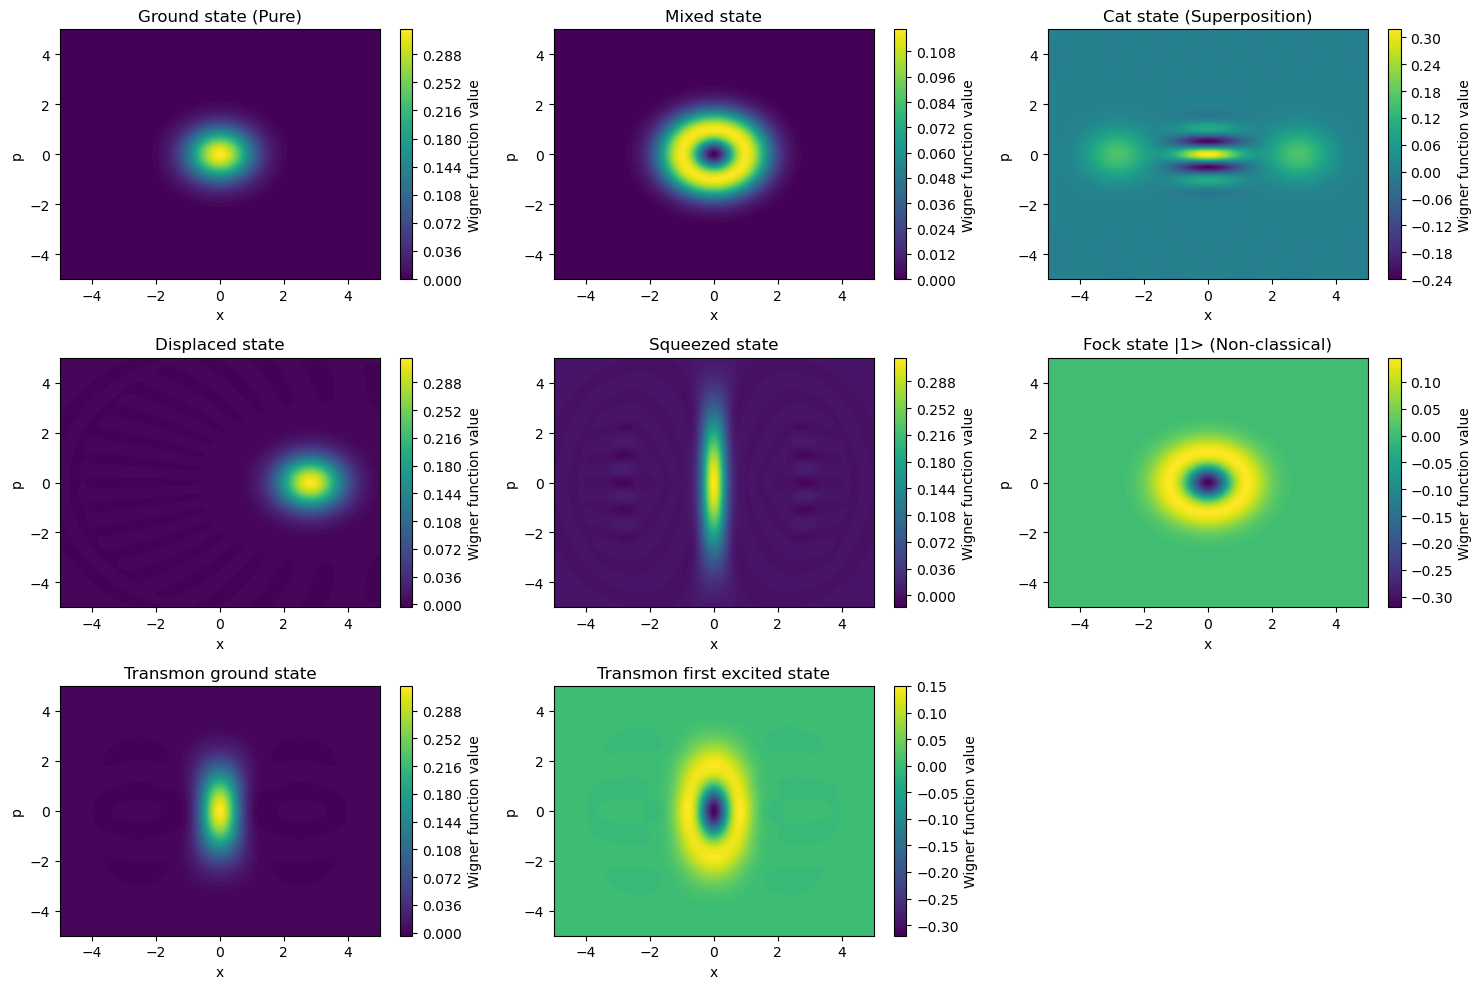

In [6]:
import qutip as q
import numpy as np
import matplotlib.pyplot as plt

def plot_wigner(state, title, xvec):
    W = q.wigner(state, xvec, xvec)
    plt.contourf(xvec, xvec, W, 100)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('p')
    plt.colorbar(label='Wigner function value')

# Define the dimension of the Hilbert space
N_trunc = 20
xvec = np.linspace(-5, 5, 200)

plt.figure(figsize=(15, 10))

# Coherence and Purity: Ground state (pure state) vs. mixed state
ground_state = q.basis(N_trunc, 0)
mixed_state = 0.5 * ground_state.proj() + 0.5 * q.basis(N_trunc, 1).proj()

plt.subplot(3, 3, 1)
plot_wigner(ground_state, 'Ground state (Pure)', xvec)
plt.subplot(3, 3, 2)
plot_wigner(mixed_state, 'Mixed state', xvec)

# Superposition States: Schrödinger cat state
alpha = 2
cat_state = (q.coherent(N_trunc, alpha) + q.coherent(N_trunc, -alpha)).unit()

plt.subplot(3, 3, 3)
plot_wigner(cat_state, 'Cat state (Superposition)', xvec)

# Displacement and Squeezing: Displaced coherent state and squeezed vacuum state
displaced_state = q.displace(N_trunc, alpha) * q.basis(N_trunc, 0)
squeezed_state = q.squeeze(N_trunc, 1.0) * q.basis(N_trunc, 0)

plt.subplot(3, 3, 4)
plot_wigner(displaced_state, 'Displaced state', xvec)
plt.subplot(3, 3, 5)
plot_wigner(squeezed_state, 'Squeezed state', xvec)

# Non-classicality: Fock state |1> showing negative regions
fock_state = q.basis(N_trunc, 1)

plt.subplot(3, 3, 6)
plot_wigner(fock_state, 'Fock state |1> (Non-classical)', xvec)

# Energy Levels and States: Transmon ground and first excited states
EJ = 20.0  # Josephson energy in GHz
EC = 0.2   # Charging energy in GHz
N = 10     # Number of charge states to consider

n = q.num(N)
phi = (q.destroy(N) + q.create(N)) / np.sqrt(2)  # Approximation for phi operator
H = 4 * EC * n**2 - EJ * phi.cosm()
eigenvalues, eigenstates = H.eigenstates()

plt.subplot(3, 3, 7)
plot_wigner(eigenstates[0], 'Transmon ground state', xvec)
plt.subplot(3, 3, 8)
plot_wigner(eigenstates[1], 'Transmon first excited state', xvec)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'no displacement')

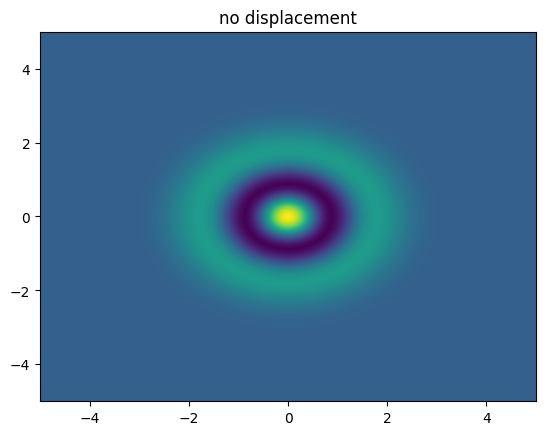

In [94]:
H0 = 5 * a.dag() * a
Hd = 0 * (a+a.dag())
H = H0 + Hd
xvec = np.linspace(-5,5,200)
Wigner = q.wigner(H.eigenstates()[1][2], xvec, xvec)
plt.contourf(xvec, xvec, Wigner, 100)
plt.title('no displacement')

## Jaynes-Cummings Model

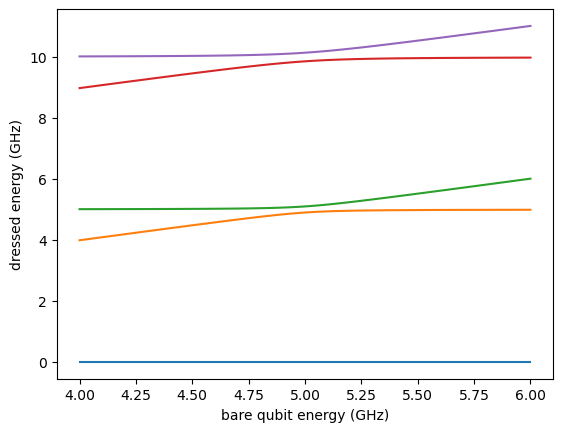

In [15]:
import qutip as q
import numpy as np
import matplotlib.pyplot as plt

## Tensor product
### Construct operators under tensor product
#### Identities
N_trunc = 10  # Dimension of the cavity Hilbert space
I2 = q.qeye(2)  # Identity operator for the qubit (2-dimensional)
Ir = q.qeye(N_trunc)  # Identity operator for the cavity (N_trunc-dimensional)

#### qubit
sx = q.sigmax()  # Pauli-X operator for the qubit
sx = q.tensor(sx, Ir)  # Extend sx to the combined qubit-cavity system
sz = -q.sigmaz()  # Negative Pauli-Z operator for the qubit
sz = q.tensor(sz, Ir)  # Extend sz to the combined qubit-cavity system
sm = q.destroy(2)  # Annihilation operator for the qubit
sm = q.tensor(sm, Ir)  # Extend sm to the combined qubit-cavity system
sp = sm.dag()  # Creation operator for the qubit

### cavity
a = q.destroy(N_trunc)  # Annihilation operator for the cavity
a = q.tensor(I2, a)  # Extend a to the combined qubit-cavity system

#### Hamiltonian construction
wc = 5  # Cavity frequency in GHz
wq = 4  # Qubit frequency in GHz
g = 0.1  # Coupling strength

# Construct the Jaynes-Cummings Hamiltonian
H_JC = wq * sz / 2  # Qubit energy term, note the 1/2 factor
H_JC += wc * a.dag() * a  # Cavity energy term
H_JC += g * (a.dag() * sm + a * sp)  # Interaction term

# Calculate the eigenvalues and eigenstates of the Hamiltonian
esys = H_JC.eigenstates()

## Parameter sweep
# Construct a Hamiltonian without the qubit term
H_rc = wc * a.dag() * a  # Cavity energy term
H_rc += g * (a.dag() * sm + a * sp)  # Interaction term

# Sweep the qubit frequency
wq_list = np.linspace(4, 6, 101)  # List of qubit frequencies to sweep over
eval_count = 5  # Number of eigenvalues to track
spec = np.zeros((eval_count, len(wq_list)))  # Array to store the spectrum

# Calculate the eigenvalues for each qubit frequency
for k in range(len(wq_list)):
    H_JCspec = H_rc + wq_list[k] * sz / 2  # Add the qubit term with varying frequency
    esys = H_JCspec.eigenstates()  # Calculate eigenstates
    spec[:, k] = (esys[0] - min(esys[0]))[0:eval_count]  # Normalize and store eigenvalues

# Plot the spectrum
for j in range(5):
    plt.plot(wq_list, spec[j, :])
plt.xlabel('bare qubit energy (GHz)')
plt.ylabel('dressed energy (GHz)')
plt.show()


In [16]:
esys[0] - min(esys[0])
## ground energy subtracted

array([ 0.        ,  4.99009805,  6.00990195,  9.98038476, 11.01961524,
       14.97084974, 16.02915026, 19.96148352, 21.03851648, 24.95227744,
       26.04772256, 29.94322356, 31.05677644, 34.93431458, 36.06568542,
       39.92554374, 41.07445626, 44.91690481, 46.08309519, 51.        ])

### Explanation of the Plot

#### What We Are Plotting

The plot shows the dressed energy levels of the Jaynes-Cummings Hamiltonian as a function of the bare qubit energy. The dressed states are the eigenstates of the coupled qubit-cavity system. The term "dressed" refers to the fact that the energy levels are shifted due to the interaction between the qubit and the cavity.

#### Why We Are Plotting It

This plot is useful for understanding how the interaction between the qubit and the cavity affects the energy levels of the system. By sweeping the bare qubit energy $ \omega_q $ and observing how the dressed energies change, we can gain insights into phenomena such as avoided level crossings and the strength of the coupling between the qubit and the cavity mode.

### Detailed Steps of the Code

1. **Tensor Product Construction**:
   - Construct operators for the qubit and the cavity and extend them to the combined Hilbert space using tensor products.

2. **Hamiltonian Construction**:
   - Define the Jaynes-Cummings Hamiltonian, which includes the qubit energy term, the cavity energy term, and the interaction term.

3. **Eigenstate Calculation**:
   - Compute the eigenvalues and eigenstates of the Jaynes-Cummings Hamiltonian.

4. **Parameter Sweep**:
   - Construct a Hamiltonian without the qubit term to be used in the parameter sweep.
   - Sweep the qubit frequency $ \omega_q $ from 4 GHz to 6 GHz.
   - For each value of $ \omega_q $, add the qubit term to the Hamiltonian, compute the eigenstates, and store the eigenvalues.

5. **Plot the Spectrum**:
   - Plot the dressed energy levels (eigenvalues) as a function of the bare qubit energy. This helps visualize how the qubit-cavity interaction affects the energy levels of the system.

By analyzing the plot, one can observe how the qubit-cavity interaction leads to phenomena like energy level repulsion and hybridization of states, which are fundamental in understanding quantum optics and cavity QED experiments.

### Jaynes-Cummings Model

The Jaynes-Cummings (JC) model is a fundamental model in quantum optics and quantum information theory that describes the interaction between a two-level atom (qubit) and a single mode of an electromagnetic field (cavity). The model is important for several reasons:

1. **Simplicity and Solvability**:
   - The JC model is exactly solvable, providing clear insights into the dynamics of light-matter interaction.

2. **Fundamental Insights**:
   - It captures essential features of quantum electrodynamics, such as Rabi oscillations, vacuum Rabi splitting, and the formation of dressed states (entangled states of the atom and the field).

3. **Experimental Relevance**:
   - The JC model is directly relevant to many physical systems, including cavity quantum electrodynamics (QED), circuit QED, and trapped ions, making it a cornerstone for experimental studies.

4. **Quantum Information**:
   - It serves as a building block for understanding more complex quantum systems and is instrumental in designing and analyzing quantum gates and protocols in quantum computing.

### Explanation of the Provided Code

The provided code constructs the Jaynes-Cummings Hamiltonian for a qubit-cavity system and calculates its eigenstates.

Let's break down the code step by step:

#### Tensor Product Construction
1. **Identities**:
   ```python
   N_trunc = 10
   I2 = q.qeye(2)
   Ir = q.qeye(N_trunc)
   ```

   - `N_trunc`: Dimension of the Hilbert space for the cavity mode.
   - `I2`: Identity operator for the qubit (2-dimensional Hilbert space).
   - `Ir`: Identity operator for the cavity mode (N_trunc-dimensional Hilbert space).

2. **Qubit Operators**:
   ```python
   sx = q.sigmax()
   sx = q.tensor(sx, Ir)
   sz = -q.sigmaz()
   sz = q.tensor(sz, Ir)
   sm = q.destroy(2)
   sm = q.tensor(sm, Ir)
   sp = sm.dag()
   ```

   - `sx`, `sz`: Pauli-X and Pauli-Z operators for the qubit, extended to the combined qubit-cavity system using the tensor product.
   - `sm`, `sp`: Annihilation and creation operators for the qubit, extended to the combined system.

3. **Cavity Operators**:
   ```python
   a = q.destroy(N_trunc)
   a = q.tensor(I2, a)
   ```

   - `a`: Annihilation operator for the cavity mode, extended to the combined system.

#### Hamiltonian Construction
```python
wc = 5 # cavity freq, in GHz
wq = 4 # qubit freq, in GHz
g = 0.1 # coupling strength

H_JC = wq * sz/2 # 1/2 is important here
H_JC += wc * a.dag() * a
H_JC += g * (a.dag()*sm + a * sp)
```

- `wc`: Frequency of the cavity mode.
- `wq`: Frequency of the qubit.
- `g`: Coupling strength between the qubit and the cavity mode.
- `H_JC`: Jaynes-Cummings Hamiltonian, composed of:
  - $ \frac{\omega_q}{2} \sigma_z $: Qubit energy term.
  - $ \omega_c a^\dagger a $: Cavity mode energy term.
  - $ g (a^\dagger s_- + a s_+) $: Interaction term between the qubit and the cavity.

#### Eigenstate Calculation
```python
esys = H_JC.eigenstates()
```

- `esys`: Calculation of the eigenvalues and eigenstates of the Jaynes-Cummings Hamiltonian.

### Full Example Code with Comments

Here is the complete code with detailed comments for each step:

```python
import qutip as q

# Define the dimension of the Hilbert space for the cavity
N_trunc = 10

# Identity operators for qubit and cavity
I2 = q.qeye(2)       # Identity operator for qubit (2-dimensional)
Ir = q.qeye(N_trunc) # Identity operator for cavity (N_trunc-dimensional)

# Qubit operators
sx = q.sigmax()             # Pauli-X operator for qubit
sx = q.tensor(sx, Ir)       # Extend to the combined system

sz = -q.sigmaz()            # Negative Pauli-Z operator for qubit
sz = q.tensor(sz, Ir)       # Extend to the combined system

sm = q.destroy(2)           # Annihilation operator for qubit
sm = q.tensor(sm, Ir)       # Extend to the combined system
sp = sm.dag()               # Creation operator for qubit

# Cavity operator
a = q.destroy(N_trunc)      # Annihilation operator for cavity
a = q.tensor(I2, a)         # Extend to the combined system

# Parameters
wc = 5  # Cavity frequency in GHz
wq = 4  # Qubit frequency in GHz
g = 0.1 # Coupling strength

# Hamiltonian construction
H_JC = wq * sz / 2          # Qubit term
H_JC += wc * a.dag() * a    # Cavity term
H_JC += g * (a.dag() * sm + a * sp) # Interaction term

# Calculate the eigenvalues and eigenstates of the Hamiltonian
eigenvalues, eigenstates = H_JC.eigenstates()

# Print the first few eigenvalues and corresponding eigenstates
print("Eigenvalues:")
print(eigenvalues[:5])

print("\nFirst eigenstate:")
print(eigenstates[0])
```

### Importance of the Code

This code constructs the Jaynes-Cummings Hamiltonian, which is crucial for understanding the interaction between a qubit and a cavity mode. By calculating the eigenvalues and eigenstates, we gain insights into the energy levels and the dynamics of the combined qubit-cavity system. This understanding is foundational for designing quantum gates, studying entanglement, and implementing quantum algorithms in systems such as cavity QED and circuit QED.

The Jaynes-Cummings (JC) model is a cornerstone of quantum optics and quantum information science, but there are several close variations of the model that address different physical scenarios and interactions. Here, we'll discuss some of these variations, how they differ, and their applications.

### 1. **Rabi Model**

**Hamiltonian**:
$$
H = \frac{\omega_q}{2} \sigma_z + \omega_c a^\dagger a + g (\sigma_x a + \sigma_x a^\dagger)
$$

**Differences**:
- The Rabi model includes the counter-rotating terms $\sigma_x a$ and $\sigma_x a^\dagger$ in addition to the rotating terms.
- It does not make the rotating wave approximation (RWA), which is an approximation used in the JC model to neglect the counter-rotating terms.

**Applications**:
- The Rabi model is used in regimes where the rotating wave approximation is not valid, such as in systems with strong coupling or very high frequencies.
- It's relevant for exploring the ultra-strong coupling regime in cavity QED and circuit QED systems.

### 2. **Tavis-Cummings Model**

**Hamiltonian**:
$$
H = \sum_{i=1}^N \frac{\omega_{q_i}}{2} \sigma_z^{(i)} + \omega_c a^\dagger a + \sum_{i=1}^N g_i (\sigma_-^{(i)} a^\dagger + \sigma_+^{(i)} a)
$$

**Differences**:
- The Tavis-Cummings model generalizes the JC model to multiple qubits (atoms) interacting with a single mode of the electromagnetic field.
- Each qubit can have a different frequency $\omega_{q_i}$ and coupling strength $g_i$.

**Applications**:
- This model is used to study collective phenomena such as superradiance and subradiance.
- It's relevant for understanding the behavior of ensembles of atoms in a cavity, such as in quantum memories and many-body quantum systems.

### 3. **Dicke Model**

**Hamiltonian**:
$$
H = \omega_c a^\dagger a + \sum_{i=1}^N \frac{\omega_{q_i}}{2} \sigma_z^{(i)} + \sum_{i=1}^N g_i (\sigma_x^{(i)} (a + a^\dagger))
$$

**Differences**:
- The Dicke model includes counter-rotating terms similar to the Rabi model but generalized to multiple qubits.
- It's often used to describe collective interactions without the RWA.

**Applications**:
- The Dicke model is important for studying phase transitions and collective excitations in systems with many interacting particles.
- It's applicable in quantum optics, condensed matter physics, and studies of quantum phase transitions.

### 4. **Extended Jaynes-Cummings Model**

**Hamiltonian**:
$$
H = \frac{\omega_q}{2} \sigma_z + \omega_c a^\dagger a + g (\sigma_+ a + \sigma_- a^\dagger) + \lambda \sigma_z (a + a^\dagger)
$$

**Differences**:
- The extended JC model includes an additional term $\lambda \sigma_z (a + a^\dagger)$ that represents a dispersive interaction or coupling to a classical drive.

**Applications**:
- This model is used to study systems with both direct and dispersive interactions.
- It's relevant in exploring quantum control and measurement, including quantum nondemolition measurements and qubit readout.

### 5. **Quantum Rabi Model**

**Hamiltonian**:
$$
H = \frac{\omega_q}{2} \sigma_z + \omega_c a^\dagger a + g \sigma_x (a + a^\dagger)
$$

**Differences**:
- The quantum Rabi model is the full form without the RWA, similar to the Rabi model but often considered in the context of ultra-strong coupling and deep-strong coupling regimes.

**Applications**:
- It's important for understanding the behavior of systems where the coupling strength $g$ is comparable to or exceeds the system frequencies $\omega_q$ and $\omega_c$.
- Used in studies of light-matter interaction at its fundamental limits and in designing new types of quantum devices.

### Example Code



Sure, here are the example codes for the Rabi Model, Dicke Model, Extended Jaynes-Cummings Model, and Quantum Rabi Model using QuTiP.

### Rabi Model

The Rabi Model includes the counter-rotating terms in the interaction Hamiltonian.

```python
import qutip as q

# Parameters
N_trunc = 10  # Dimension of the Hilbert space
wc = 5        # Cavity frequency in GHz
wq = 4        # Qubit frequency in GHz
g = 0.1       # Coupling strength in GHz

# Operators
a = q.destroy(N_trunc)  # Annihilation operator for the cavity
sigma_x = q.sigmax()    # Pauli-X operator for the qubit
sigma_z = q.sigmaz()    # Pauli-Z operator for the qubit
identity_qubit = q.qeye(2)
identity_cavity = q.qeye(N_trunc)

# Tensor product to extend operators to combined Hilbert space
a = q.tensor(identity_qubit, a)
sigma_x = q.tensor(sigma_x, identity_cavity)
sigma_z = q.tensor(sigma_z, identity_cavity)

# Hamiltonian
H_rabi = 0.5 * wq * sigma_z + wc * a.dag() * a + g * sigma_x * (a + a.dag())

# Calculate the eigenvalues and eigenstates
eigenvalues, eigenstates = H_rabi.eigenstates()

# Print the first few eigenvalues
print("Eigenvalues of the Rabi Hamiltonian:")
print(eigenvalues[:5])
```
###  Tavis-Cummings Model

Here's how you might implement the Tavis-Cummings model in QuTiP:

```python
import qutip as q

# Parameters
N_trunc = 10   # Dimension of cavity Hilbert space
N_qubits = 2   # Number of qubits
wc = 5         # Cavity frequency
wq = 4         # Qubit frequency
g = 0.1        # Coupling strength

# Identity operators
I_cavity = q.qeye(N_trunc)
I_qubit = q.qeye(2)

# Qubit operators
sz_list = []
sm_list = []
for i in range(N_qubits):
    sz = q.sigmaz()
    sm = q.destroy(2)
    for j in range(N_qubits):
        if i == j:
            sz = q.tensor(sz, I_cavity) if j == N_qubits - 1 else q.tensor(sz, I_qubit)
            sm = q.tensor(sm, I_cavity) if j == N_qubits - 1 else q.tensor(sm, I_qubit)
        else:
            sz = q.tensor(I_qubit, sz)
            sm = q.tensor(I_qubit, sm)
    sz_list.append(sz)
    sm_list.append(sm)

# Cavity operator
a = q.destroy(N_trunc)
a = q.tensor(I_qubit, a)

# Hamiltonian construction
H_TC = wc * a.dag() * a
for i in range(N_qubits):
    H_TC += 0.5 * wq * sz_list[i]
    H_TC += g * (a.dag() * sm_list[i] + a * sm_list[i].dag())

# Calculate the eigenvalues and eigenstates of the Hamiltonian
eigenvalues, eigenstates = H_TC.eigenstates()

# Print the first few eigenvalues
print("Eigenvalues of the Tavis-Cummings Hamiltonian:")
print(eigenvalues[:5])
```


### Dicke Model

The Dicke Model includes multiple qubits and counter-rotating terms.

```python
import qutip as q

# Parameters
N_trunc = 10  # Dimension of the cavity Hilbert space
N_qubits = 2  # Number of qubits
wc = 5        # Cavity frequency in GHz
wq = 4        # Qubit frequency in GHz
g = 0.1       # Coupling strength in GHz

# Identity operators
identity_cavity = q.qeye(N_trunc)
identity_qubit = q.qeye(2)

# Qubit operators
sz_list = []
sx_list = []
for i in range(N_qubits):
    sz = q.sigmaz()
    sx = q.sigmax()
    for j in range(N_qubits):
        if i == j:
            sz = q.tensor(sz, identity_cavity) if j == N_qubits - 1 else q.tensor(sz, identity_qubit)
            sx = q.tensor(sx, identity_cavity) if j == N_qubits - 1 else q.tensor(sx, identity_qubit)
        else:
            sz = q.tensor(identity_qubit, sz)
            sx = q.tensor(identity_qubit, sx)
    sz_list.append(sz)
    sx_list.append(sx)

# Cavity operator
a = q.destroy(N_trunc)
a = q.tensor(identity_qubit, a)

# Hamiltonian construction
H_dicke = wc * a.dag() * a
for i in range(N_qubits):
    H_dicke += 0.5 * wq * sz_list[i]
    H_dicke += g * sx_list[i] * (a + a.dag())

# Calculate the eigenvalues and eigenstates of the Hamiltonian
eigenvalues, eigenstates = H_dicke.eigenstates()

# Print the first few eigenvalues
print("Eigenvalues of the Dicke Hamiltonian:")
print(eigenvalues[:5])
```

### Extended Jaynes-Cummings Model

The Extended Jaynes-Cummings Model adds a dispersive interaction term.

```python
import qutip as q

# Parameters
N_trunc = 10  # Dimension of the Hilbert space
wc = 5        # Cavity frequency in GHz
wq = 4        # Qubit frequency in GHz
g = 0.1       # Coupling strength in GHz
lambda_ = 0.05 # Dispersive coupling strength in GHz

# Operators
a = q.destroy(N_trunc)  # Annihilation operator for the cavity
sigma_z = q.sigmaz()    # Pauli-Z operator for the qubit
sigma_x = q.sigmax()    # Pauli-X operator for the qubit
identity_qubit = q.qeye(2)
identity_cavity = q.qeye(N_trunc)

# Tensor product to extend operators to combined Hilbert space
a = q.tensor(identity_qubit, a)
sigma_z = q.tensor(sigma_z, identity_cavity)
sigma_x = q.tensor(sigma_x, identity_cavity)

# Qubit raising and lowering operators
sm = q.destroy(2)
sm = q.tensor(sm, identity_cavity)
sp = sm.dag()

# Hamiltonian
H_ext_JC = 0.5 * wq * sigma_z + wc * a.dag() * a + g * (a.dag() * sm + a * sp) + lambda_ * sigma_z * (a + a.dag())

# Calculate the eigenvalues and eigenstates
eigenvalues, eigenstates = H_ext_JC.eigenstates()

# Print the first few eigenvalues
print("Eigenvalues of the Extended Jaynes-Cummings Hamiltonian:")
print(eigenvalues[:5])
```

### Quantum Rabi Model

The Quantum Rabi Model is the full Rabi model without the rotating wave approximation.

```python
import qutip as q

# Parameters
N_trunc = 10  # Dimension of the Hilbert space
wc = 5        # Cavity frequency in GHz
wq = 4        # Qubit frequency in GHz
g = 0.1       # Coupling strength in GHz

# Operators
a = q.destroy(N_trunc)  # Annihilation operator for the cavity
sigma_z = q.sigmaz()    # Pauli-Z operator for the qubit
sigma_x = q.sigmax()    # Pauli-X operator for the qubit
identity_qubit = q.qeye(2)
identity_cavity = q.qeye(N_trunc)

# Tensor product to extend operators to combined Hilbert space
a = q.tensor(identity_qubit, a)
sigma_z = q.tensor(sigma_z, identity_cavity)
sigma_x = q.tensor(sigma_x, identity_cavity)

# Hamiltonian
H_rabi = 0.5 * wq * sigma_z + wc * a.dag() * a + g * sigma_x * (a + a.dag())

# Calculate the eigenvalues and eigenstates
eigenvalues, eigenstates = H_rabi.eigenstates()

# Print the first few eigenvalues
print("Eigenvalues of the Quantum Rabi Hamiltonian:")
print(eigenvalues[:5])
```

### Summary of Variations

1. **Rabi Model**:
   - **Differences**: Includes counter-rotating terms.
   - **Applications**: Ultra-strong coupling regimes where RWA is invalid.

2. **Dicke Model**:
   - **Differences**: Generalizes to multiple qubits and includes counter-rotating terms.
   - **Applications**: Collective phenomena, many-body quantum systems, and phase transitions.

3. **Extended Jaynes-Cummings Model**:
   - **Differences**: Adds dispersive interaction term.
   - **Applications**: Quantum control, measurement, and systems with both direct and dispersive interactions.

4. **Quantum Rabi Model**:
   - **Differences**: Full Rabi model without RWA.
   - **Applications**: Fundamental studies of light-matter interaction at its limits.

Each model adapts the basic JC model to account for different physical effects and coupling regimes, expanding the range of phenomena that can be studied and applied in quantum technologies.





### Summary

- **Jaynes-Cummings Model**: Describes interaction between a single two-level atom and a single cavity mode. Exact solvability and foundational importance in quantum optics.
- **Rabi Model**: Extends the JC model without RWA. Important for ultra-strong coupling regimes.
- **Tavis-Cummings Model**: Generalizes the JC model to multiple atoms. Key for studying collective phenomena.
- **Dicke Model**: Similar to the Tavis-Cummings model but includes counter-rotating terms. Used in many-body quantum systems and phase transitions.
- **Extended JC Model**: Adds dispersive interactions or classical drives. Useful for quantum control and measurement.
- **Quantum Rabi Model**: Full form of the Rabi model. Important for understanding fundamental limits of light-matter interaction.

Each of these models is crucial for understanding different aspects and regimes of quantum light-matter interaction, with applications ranging from quantum computing to fundamental quantum physics experiments.

## Master eq solver

### Single qubit

```python
import qutip as q
import numpy as np
import matplotlib.pyplot as plt

# Essential: Hamiltonian, initial state, time range, damping operators

# Define the qubit frequency
wq = 4  # qubit frequency in GHz

# Define the Pauli matrices for the qubit
sz = -q.sigmaz()  # Negative Pauli-Z operator
sy = -q.sigmay()  # Negative Pauli-Y operator
sx = q.sigmax()   # Pauli-X operator
sm = q.destroy(2) # Annihilation operator for the qubit

# Define the Hamiltonian
H = wq * sz / 2  # Qubit Hamiltonian

# Define the collapse operators (empty in this case, no damping)
c_ops = []

# Define the time range for the simulation
t_list = np.linspace(0, 10, 4001)  # Time from 0 to 10 ns, 4001 points

# Define the initial state as a superposition state (|1> + |0>)/sqrt(2)
psi0 = q.basis(2, 1) + q.basis(2, 0)
psi0 = psi0 / np.sqrt(2)  # Normalize the state

# Solve the master equation without any additional expectation operators
result = q.mesolve(H * 2 * np.pi, psi0, t_list, c_ops=c_ops)

# Solve the master equation with expectation operators (sx and sz)
result = q.mesolve(H * 2 * np.pi, psi0, t_list, c_ops=c_ops, e_ops=[sx, sz])

# Plot the expectation value of sx over time
plt.plot(t_list, result.expect[0])
plt.xlabel('time (ns)')
plt.ylabel('Expectation value of sx')
plt.title('Time evolution of the expectation value of sx')
plt.show()
```

### Explanation of Key Components
The code sets up and solves a quantum system using the master equation solver in QuTiP. The key components include defining the Hamiltonian, initial state, time range, and damping operators. It also includes optional features such as driving terms, expectation values, and solver options. The code then plots the time evolution of the expectation value of a specified operator.

#### Essential Components

1. **Hamiltonian (H)**:
   - `H = wq * sz / 2`: The Hamiltonian for the qubit system. The term $ \frac{\omega_q}{2} \sigma_z $ represents the energy of the qubit. The factor of $ 2\pi $ converts the frequency to angular frequency (radians per second).

2. **Initial State (psi0)**:
   - `psi0 = (q.basis(2, 1) + q.basis(2, 0)) / np.sqrt(2)`: The initial state of the qubit, a superposition of the ground state $|0\rangle$ and the excited state $|1\rangle$, normalized.

3. **Time Range (t_list)**:
   - `t_list = np.linspace(0, 10, 4001)`: The time points at which the solution is computed, ranging from 0 to 10 nanoseconds, with 4001 equally spaced points.

4. **Damping Operators (c_ops)**:
   - `c_ops = []`: The list of collapse operators (empty in this case), representing no damping or decoherence in the system.

#### Optional Components

1. **Driving**:
   - Driving terms are not included in this example, but they could be added to the Hamiltonian to model external fields or forces acting on the system.

2. **Expectation Values (e_ops)**:
   - `e_ops = [sx, sz]`: A list of operators for which the expectation values are computed during the time evolution. In this case, the expectation values of the Pauli-X ($\sigma_x$) and Pauli-Z ($\sigma_z$) operators are computed.

3. **Options**:
   - Solver options can be specified to control the behavior of the `mesolve` function, such as the method of integration or the tolerance for numerical errors. These are not included in this example.

### What We Are Plotting and Why

The code plots the time evolution of the expectation value of the Pauli-X operator ($\sigma_x$) for the qubit. 

- **Why**: This plot shows how the superposition state evolves over time under the influence of the qubit Hamiltonian. The oscillation in the expectation value of $\sigma_x$ indicates coherent Rabi oscillations, which are fundamental to understanding the dynamics of two-level systems (qubits) in quantum mechanics. These oscillations are a key feature in quantum information processing and quantum computing, as they represent the coherent manipulation of qubit states.

- **How**: The `mesolve` function computes the time evolution of the quantum system governed by the Hamiltonian $H$. By specifying expectation operators, we can track the expectation values of these operators over time. The resulting plot provides insight into the behavior of the qubit's state as it evolves.

In [4]:
import qutip as q
import numpy as np
import matplotlib.pyplot as plt

# Essential: Hamiltonian, initial state, time range, damping operators

# Define the qubit frequency
wq = 4  # qubit frequency in GHz

# Define the Pauli matrices for the qubit
sz = -q.sigmaz()  # Negative Pauli-Z operator
sy = -q.sigmay()  # Negative Pauli-Y operator
sx = q.sigmax()   # Pauli-X operator
sm = q.destroy(2) # Annihilation operator for the qubit

# Define the Hamiltonian
H = wq * sz / 2  # Qubit Hamiltonian

# Define the collapse operators (empty in this case, no damping)
c_ops = []

# Define the time range for the simulation
t_list = np.linspace(0, 10, 4001)  # Time from 0 to 10 ns, 4001 points

# Define the initial state as a superposition state (|1> + |0>)/sqrt(2)
psi0 = q.basis(2, 1) + q.basis(2, 0)
psi0 = psi0 / np.sqrt(2)  # Normalize the state

# Solve the master equation without any additional expectation operators
result = q.mesolve(H * 2 * np.pi, psi0, t_list, c_ops=c_ops)

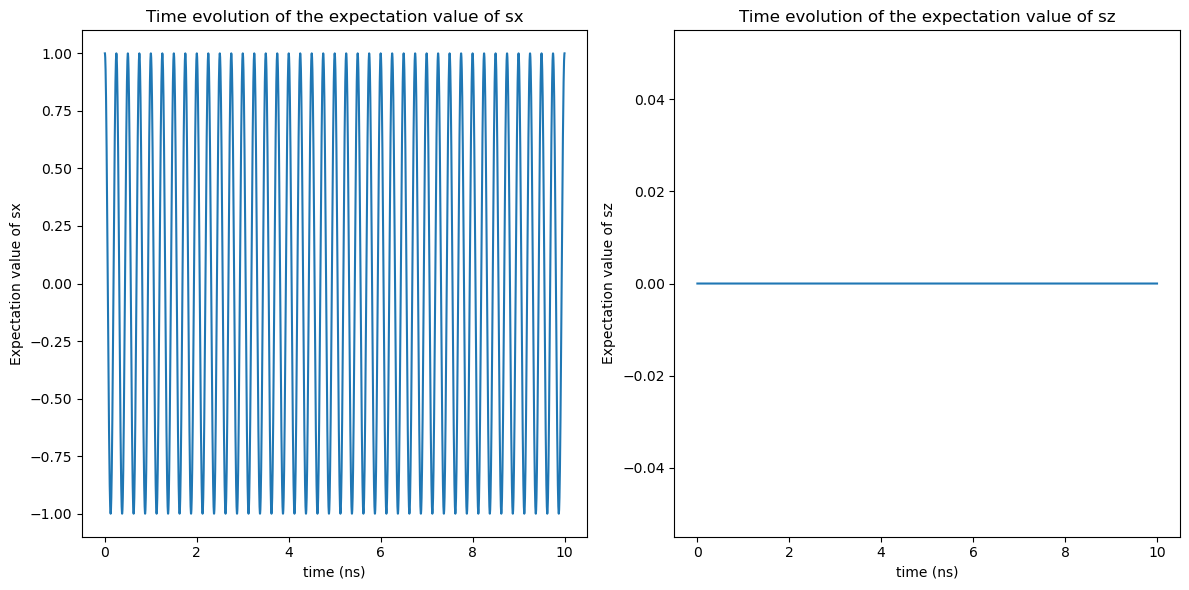

In [5]:
# Solve the master equation with expectation operators (sx and sz)
result = q.mesolve(H * 2 * np.pi, psi0, t_list, c_ops=c_ops, e_ops=[sx, sz])

# Plot the expectation values of sx and sz over time as subplots
plt.figure(figsize=(12, 6))

# Plot the expectation value of sx
plt.subplot(1, 2, 1)
plt.plot(t_list, result.expect[0])
plt.xlabel('time (ns)')
plt.ylabel('Expectation value of sx')
plt.title('Time evolution of the expectation value of sx')

# Plot the expectation value of sz
plt.subplot(1, 2, 2)
plt.plot(t_list, result.expect[1])
plt.xlabel('time (ns)')
plt.ylabel('Expectation value of sz')
plt.title('Time evolution of the expectation value of sz')

plt.tight_layout()
plt.show()

### Explanation of the Modified Plot

1. **Setup the Figure**:
   - `plt.figure(figsize=(12, 6))`: Creates a new figure with a specified size.

2. **Plot the Expectation Value of sx**:
   - `plt.subplot(1, 2, 1)`: Specifies that the following plot will be in the first subplot of a 1x2 grid.
   - `plt.plot(t_list, result.expect[0])`: Plots the time evolution of the expectation value of `sx`.
   - `plt.xlabel('time (ns)')`: Labels the x-axis.
   - `plt.ylabel('Expectation value of sx')`: Labels the y-axis.
   - `plt.title('Time evolution of the expectation value of sx')`: Sets the title of the subplot.

3. **Plot the Expectation Value of sz**:
   - `plt.subplot(1, 2, 2)`: Specifies that the following plot will be in the second subplot of a 1x2 grid.
   - `plt.plot(t_list, result.expect[1])`: Plots the time evolution of the expectation value of `sz`.
   - `plt.xlabel('time (ns)')`: Labels the x-axis.
   - `plt.ylabel('Expectation value of sz')`: Labels the y-axis.
   - `plt.title('Time evolution of the expectation value of sz')`: Sets the title of the subplot.

4. **Layout Adjustment**:
   - `plt.tight_layout()`: Adjusts the layout to prevent overlap and ensure that subplots fit nicely within the figure.

### What We Are Plotting

- **Left Plot (Expectation value of sx)**: Shows the time evolution of the expectation value of the Pauli-X operator ($\sigma_x$). This reveals how the superposition state evolves over time, indicating coherent oscillations due to the qubit Hamiltonian.

- **Right Plot (Expectation value of sz)**: Shows the time evolution of the expectation value of the Pauli-Z operator ($\sigma_z$). This indicates how the population difference between the ground and excited states changes over time, reflecting the dynamics of the qubit's state.

By examining both plots side by side, we gain a comprehensive view of the qubit's dynamics, seeing both the coherence (through $\sigma_x$) and the population dynamics (through $\sigma_z$).

In [7]:
# Define solver options with high precision and state storage
options = q.Options(
    rtol=1e-10,                # Relative tolerance for the ODE solver
    atol=1e-10,                # Absolute tolerance for the ODE solver
    nsteps=1000000000,         # Maximum number of steps for the ODE solver
    store_states=True,         # Store all intermediate states during the evolution
    store_final_state=True     # Store the final state after evolution
)

# Solve the master equation with the defined options and expectation operators (sx and sz)
result = q.mesolve(
    H * 2 * np.pi,             # Hamiltonian (in angular frequency units)
    psi0,                      # Initial state
    t_list,                    # Time range
    c_ops=c_ops,               # Collapse operators
    e_ops=[sx, sz],            # Expectation operators
    options=options            # Solver options
)

# Access the final state after time evolution
final_state = result.final_state

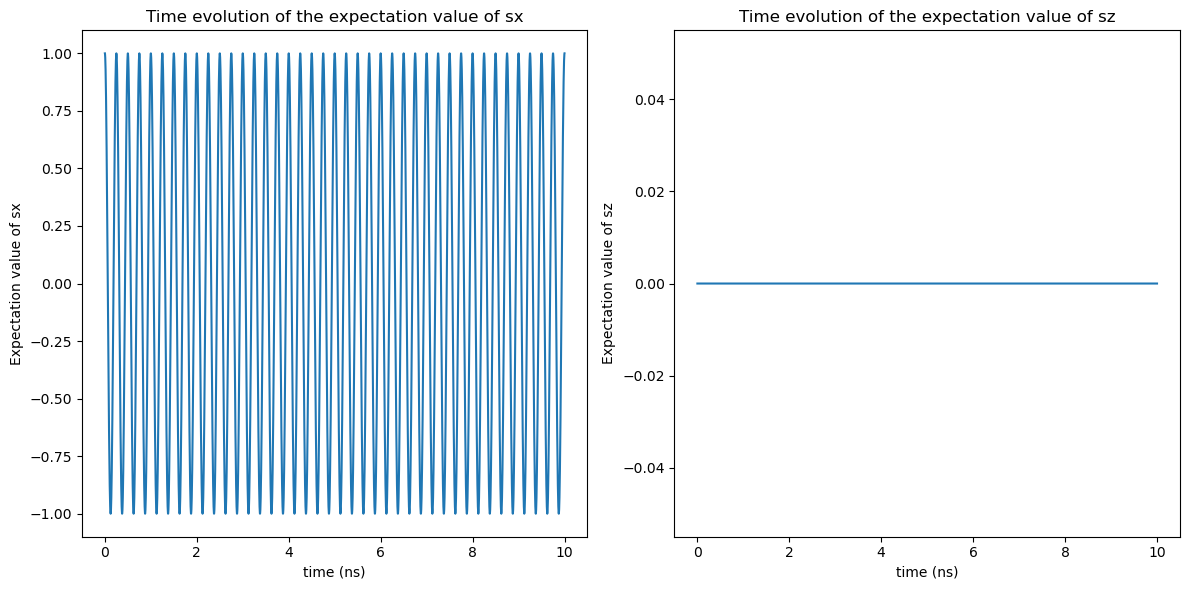

In [8]:
# Plot the expectation values of sx and sz over time as subplots
plt.figure(figsize=(12, 6))

# Plot the expectation value of sx
plt.subplot(1, 2, 1)
plt.plot(t_list, result.expect[0])
plt.xlabel('time (ns)')
plt.ylabel('Expectation value of sx')
plt.title('Time evolution of the expectation value of sx')

# Plot the expectation value of sz
plt.subplot(1, 2, 2)
plt.plot(t_list, result.expect[1])
plt.xlabel('time (ns)')
plt.ylabel('Expectation value of sz')
plt.title('Time evolution of the expectation value of sz')

plt.tight_layout()
plt.show()

### Detailed Explanation of the New Code Components

1. **Solver Options**:
   ```python
   options = q.Options(
       rtol=1e-10,                # Relative tolerance for the ODE solver
       atol=1e-10,                # Absolute tolerance for the ODE solver
       nsteps=1000000000,         # Maximum number of steps for the ODE solver
       store_states=True,         # Store all intermediate states during the evolution
       store_final_state=True     # Store the final state after evolution
   )
   ```
   - **Relative Tolerance (`rtol`)**: The relative error tolerance for the ODE solver. A smaller value increases the precision of the solver.
   - **Absolute Tolerance (`atol`)**: The absolute error tolerance for the ODE solver. A smaller value increases the precision of the solver.
   - **Maximum Number of Steps (`nsteps`)**: The maximum number of steps the ODE solver is allowed to take. A very large value ensures that the solver does not terminate early due to step limits.
   - **Store States (`store_states`)**: If `True`, the solver stores all intermediate states during the evolution. This allows access to the state of the system at each time step.
   - **Store Final State (`store_final_state`)**: If `True`, the solver stores the final state of the system after the evolution.

2. **Solving the Master Equation with Options**:
   ```python
   result = q.mesolve(
       H * 2 * np.pi,             # Hamiltonian (in angular frequency units)
       psi0,                      # Initial state
       t_list,                    # Time range
       c_ops=c_ops,               # Collapse operators
       e_ops=[sx, sz],            # Expectation operators
       options=options            # Solver options
   )
   ```
   - **Hamiltonian (`H * 2 * np.pi`)**: The Hamiltonian is multiplied by $ 2\pi $ to convert the frequency to angular frequency (radians per second).
   - **Initial State (`psi0`)**: The initial state of the system.
   - **Time Range (`t_list`)**: The time points at which the solution is computed.
   - **Collapse Operators (`c_ops`)**: The list of collapse operators, representing decoherence and dissipation processes (empty in this case).
   - **Expectation Operators (`e_ops`)**: The list of operators for which the expectation values are computed during the evolution.
   - **Options (`options`)**: The solver options defined earlier.

3. **Accessing the Final State**:
   ```python
   final_state = result.final_state
   ```
   - **Final State (`result.final_state`)**: The state of the system at the final time point of the simulation. This can be used for further analysis or as an initial state for subsequent simulations.

### What We Are Plotting and Why

The code plots the time evolution of the expectation values of the Pauli-X operator ($\sigma_x$) and the Pauli-Z operator ($\sigma_z$) for the qubit. 

- **Left Plot (Expectation value of $\sigma_x$)**: Shows the coherence of the qubit's state over time. Coherent oscillations in the expectation value of $\sigma_x$ indicate Rabi oscillations, a hallmark of coherent quantum dynamics in two-level systems.
  
- **Right Plot (Expectation value of $\sigma_z$)**: Shows the population difference between the ground and excited states over time. The oscillations in the expectation value of $\sigma_z$ reflect the transitions between the ground and excited states due to the Hamiltonian's dynamics.

By examining both plots, we can understand the dynamics of the qubit's state, including its coherence and population inversion, providing a comprehensive picture of the system's behavior under the given Hamiltonian.

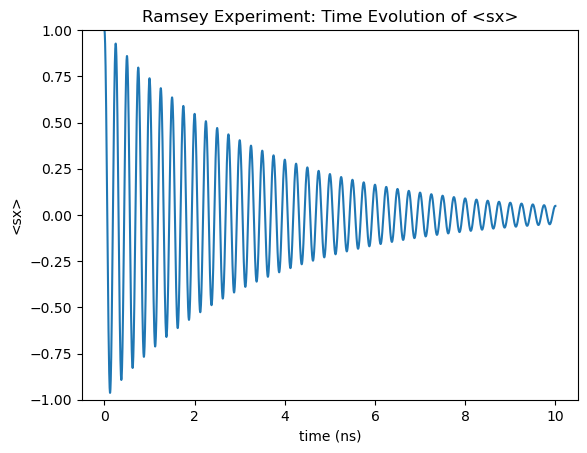

In [9]:
#### Ramsey Experiment

# Define collapse operators for the system to model decoherence and relaxation processes
c_ops = [sz * np.sqrt(2e-1 / 2)]  # Dephasing operator with a given rate
c_ops.append(sm * np.sqrt(2e-1))  # Relaxation operator with a given rate
c_ops.append(sm.dag() * np.sqrt(2e-1) * np.exp(-4 / 2))  # Excitation operator with a given rate

# Define the initial state as a superposition state (|1> + |0>)/sqrt(2)
psi0 = q.basis(2, 1) + q.basis(2, 0)
psi0 = psi0 / np.sqrt(2)  # Normalize the state

# Define the time range for the simulation
t_list = np.linspace(0, 10, 4001)  # Time from 0 to 10 ns, 4001 points

# Solve the master equation with the given Hamiltonian, initial state, collapse operators, and expectation operators
result = q.mesolve(H * 2 * np.pi, psi0, t_list, c_ops=c_ops, e_ops=[sx, sy, sz], options=options)

# Plot the expectation value of sx over time
plt.plot(t_list, result.expect[0])
plt.xlabel('time (ns)')
plt.ylabel('<sx>')
plt.ylim(-1, 1)  # Set the y-axis limits to be between -1 and 1
plt.title('Ramsey Experiment: Time Evolution of <sx>')
plt.show()


### Explanation of the Code

#### Ramsey Experiment

The Ramsey experiment is a common technique in quantum information processing and quantum optics to measure the coherence properties of a qubit. It involves creating a superposition state, allowing it to evolve freely, and then measuring the coherence of the state.

1. **Collapse Operators (`c_ops`)**:
   - These operators model the effects of decoherence and relaxation on the system.
   - `c_ops = [sz * np.sqrt(2e-1 / 2)]`: Dephasing operator that represents random phase kicks.
   - `c_ops.append(sm * np.sqrt(2e-1))`: Relaxation operator that represents energy loss from the qubit to the environment.
   - `c_ops.append(sm.dag() * np.sqrt(2e-1) * np.exp(-4 / 2))`: Excitation operator that represents energy gain from the environment.

2. **Initial State (`psi0`)**:
   - `psi0 = (q.basis(2, 1) + q.basis(2, 0)) / np.sqrt(2)`: The initial state is a superposition of the ground state $|0\rangle$ and the excited state $|1\rangle$, normalized.

3. **Time Range (`t_list`)**:
   - `t_list = np.linspace(0, 10, 4001)`: The time points at which the solution is computed, ranging from 0 to 10 nanoseconds, with 4001 equally spaced points.

4. **Solving the Master Equation (`q.mesolve`)**:
   - `result = q.mesolve(H * 2 * np.pi, psi0, t_list, c_ops=c_ops, e_ops=[sx, sy, sz], options=options)`: Solves the master equation for the system using the given Hamiltonian, initial state, collapse operators, and expectation operators (`sx`, `sy`, `sz`).

5. **Plotting**:
   - `plt.plot(t_list, result.expect[0])`: Plots the time evolution of the expectation value of $\sigma_x$.
   - `plt.xlabel('time (ns)')`: Labels the x-axis as "time (ns)".
   - `plt.ylabel('<sx>')`: Labels the y-axis as "<sx>" (expectation value of $\sigma_x$).
   - `plt.ylim(-1, 1)`: Sets the y-axis limits to be between -1 and 1.
   - `plt.title('Ramsey Experiment: Time Evolution of <sx>')`: Sets the title of the plot.

### What and Why We Are Plotting

- **What**: The plot shows the time evolution of the expectation value of the Pauli-X operator ($\sigma_x$) during a Ramsey experiment. This represents the coherence of the qubit's superposition state over time.

- **Why**: The Ramsey experiment is used to measure the coherence time of a qubit. The expectation value of $\sigma_x$ oscillates due to the qubit's free evolution, and these oscillations decay over time due to decoherence and relaxation processes. By plotting $\langle\sigma_x\rangle$, we can observe how the coherence of the qubit state changes over time, providing insights into the qubit's coherence properties and the effects of environmental interactions. The decay of these oscillations is indicative of the qubit's dephasing and relaxation times, which are crucial parameters for quantum information processing.

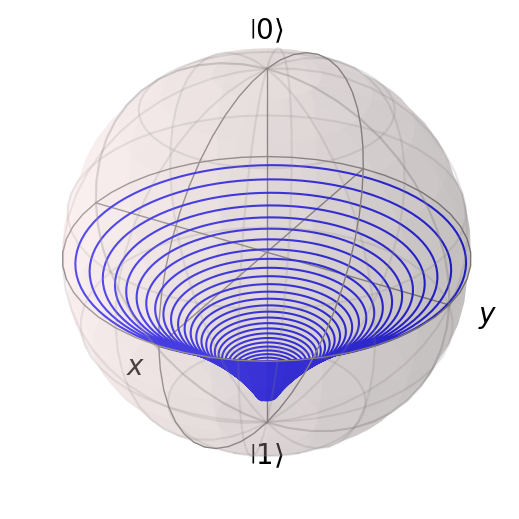

In [10]:
### Bloch Sphere Visualization

# Create a Bloch sphere instance
b = q.Bloch()
b.clear()  # Clear any previous data on the Bloch sphere
b.point_size = np.ones(len(t_list))  # Set the point size for the data points

# Collect the expectation values for sx, sy, and sz over time
pnts = [result.expect[0], result.expect[1], result.expect[2]]

# Add the collected points to the Bloch sphere with a line connecting them
b.add_points(pnts, meth='l')

# Render the Bloch sphere with the added points
b.render()

# Show the Bloch sphere plot
b.show()


### Explanation of the Code

#### Ramsey Experiment

This part of the code solves the master equation for a Ramsey experiment, as explained in the previous responses. The result is a set of expectation values for the Pauli-X ($\sigma_x$), Pauli-Y ($\sigma_y$), and Pauli-Z ($\sigma_z$) operators over time.

#### Bloch Sphere Visualization

The Bloch sphere is a geometrical representation of the pure state space of a two-level quantum system (qubit). The expectation values of the Pauli operators ($\sigma_x$, $\sigma_y$, $\sigma_z$) can be used to plot the state of the qubit on the Bloch sphere.

1. **Create a Bloch Sphere Instance**:
   ```python
   b = q.Bloch()
   ```
   - `b = q.Bloch()`: Creates a new instance of the Bloch sphere.

2. **Clear Any Previous Data**:
   ```python
   b.clear()  # Clear any previous data on the Bloch sphere
   ```
   - `b.clear()`: Clears any previously plotted data on the Bloch sphere.

3. **Set Point Size for Data Points**:
   ```python
   b.point_size = np.ones(len(t_list))  # Set the point size for the data points
   ```
   - `b.point_size = np.ones(len(t_list))`: Sets the size of each point to be plotted on the Bloch sphere. Here, it sets a uniform point size for all time points.

4. **Collect Expectation Values**:
   ```python
   pnts = [result.expect[0], result.expect[1], result.expect[2]]
   ```
   - `pnts = [result.expect[0], result.expect[1], result.expect[2]]`: Collects the expectation values of $\sigma_x$, $\sigma_y$, and $\sigma_z$ over time into a list. These represent the coordinates of the qubit's state on the Bloch sphere.

5. **Add Points to the Bloch Sphere**:
   ```python
   b.add_points(pnts, meth='l')
   ```
   - `b.add_points(pnts, meth='l')`: Adds the collected points to the Bloch sphere and connects them with a line (`meth='l'`).

6. **Render and Show the Bloch Sphere Plot**:
   ```python
   b.render()
   b.show()
   ```
   - `b.render()`: Renders the Bloch sphere with the added points.
   - `b.show()`: Displays the Bloch sphere plot.

### What and Why We Are Plotting

**What**:
- The plot shows the trajectory of the qubit's state on the Bloch sphere over time. The coordinates of the points are given by the expectation values of $\sigma_x$, $\sigma_y$, and $\sigma_z$.

**Why**:
- The Bloch sphere provides a clear, intuitive visualization of the qubit's state evolution. By plotting the trajectory on the Bloch sphere, we can visualize how the qubit's state changes due to the dynamics governed by the Hamiltonian and the collapse operators.
- The trajectory on the Bloch sphere helps us understand the effects of decoherence and relaxation processes on the qubit's state. It illustrates the loss of coherence (shrinking of the trajectory towards the center) and the relaxation towards the ground state ($|0\rangle$).
- This visualization is particularly useful for analyzing the performance and behavior of qubits in quantum information processing and quantum computing. It allows us to see how well the qubit maintains its coherence and how it evolves under different conditions, providing insights into the qubit's fidelity and the impact of environmental interactions.

### Jaynes Cummings

In [13]:
import qutip as q
import numpy as np

## Tensor product
### Construct operators under tensor product
#### Identities
N_trunc = 10  # Dimension of the Hilbert space for the cavity mode
I2 = q.qeye(2)  # Identity operator for the qubit (2-dimensional Hilbert space)
Ir = q.qeye(N_trunc)  # Identity operator for the cavity mode (N_trunc-dimensional Hilbert space)

#### qubit
sx = q.sigmax()  # Pauli-X operator for the qubit
sx = q.tensor(sx, Ir)  # Extend Pauli-X operator to the combined qubit-cavity system
sz = -q.sigmaz()  # Negative Pauli-Z operator for the qubit
sz = q.tensor(sz, Ir)  # Extend negative Pauli-Z operator to the combined qubit-cavity system
sm = q.destroy(2)  # Annihilation operator for the qubit (lowers the state)
sm = q.tensor(sm, Ir)  # Extend annihilation operator to the combined qubit-cavity system
sp = sm.dag()  # Creation operator for the qubit (raises the state)

### cavity
a = q.destroy(N_trunc)  # Annihilation operator for the cavity mode
a = q.tensor(I2, a)  # Extend annihilation operator to the combined qubit-cavity system

#### Hamiltonian construction
wc = 5  # Cavity frequency in GHz
wq = 4  # Qubit frequency in GHz
g = 0.1  # Coupling strength between the qubit and the cavity mode

# Construct the Jaynes-Cummings Hamiltonian
H_JC = wq * sz / 2  # Qubit energy term, note the 1/2 factor is important for the correct scaling
H_JC += wc * a.dag() * a  # Cavity energy term
H_JC += g * (a.dag() * sm + a * sp)  # Interaction term between the qubit and the cavity mode

# Calculate the eigenvalues and eigenstates of the Hamiltonian
esys = H_JC.eigenstates()

# Eigenstates can be accessed as follows
eigenvalues = esys[0]  # List of eigenvalues
eigenstates = esys[1]  # List of corresponding eigenstates

# Example: Print the first few eigenvalues
print("First few eigenvalues of the Jaynes-Cummings Hamiltonian:")
print(eigenvalues[:5])

First few eigenvalues of the Jaynes-Cummings Hamiltonian:
[-2.          1.99009805  3.00990195  6.98038476  8.01961524]


### Explanation

1. **Identities**:
   - `N_trunc = 10`: Sets the dimension of the Hilbert space for the cavity mode.
   - `I2 = q.qeye(2)`: Creates a 2x2 identity operator for the qubit.
   - `Ir = q.qeye(N_trunc)`: Creates an $N$-dimensional identity operator for the cavity mode.

2. **Qubit Operators**:
   - `sx = q.sigmax()`: Pauli-X operator for the qubit.
   - `sx = q.tensor(sx, Ir)`: Extends the Pauli-X operator to the combined qubit-cavity system using the tensor product.
   - `sz = -q.sigmaz()`: Negative Pauli-Z operator for the qubit.
   - `sz = q.tensor(sz, Ir)`: Extends the negative Pauli-Z operator to the combined qubit-cavity system.
   - `sm = q.destroy(2)`: Annihilation operator for the qubit.
   - `sm = q.tensor(sm, Ir)`: Extends the annihilation operator to the combined qubit-cavity system.
   - `sp = sm.dag()`: Creation operator for the qubit (Hermitian conjugate of the annihilation operator).

3. **Cavity Operator**:
   - `a = q.destroy(N_trunc)`: Annihilation operator for the cavity mode.
   - `a = q.tensor(I2, a)`: Extends the annihilation operator to the combined qubit-cavity system.

4. **Hamiltonian Construction**:
   - `wc = 5`: Cavity frequency in GHz.
   - `wq = 4`: Qubit frequency in GHz.
   - `g = 0.1`: Coupling strength between the qubit and the cavity mode.

5. **Jaynes-Cummings Hamiltonian**:
   - `H_JC = wq * sz / 2`: Qubit energy term, with a factor of 1/2 to correctly scale the energy.
   - `H_JC += wc * a.dag() * a`: Cavity energy term.
   - `H_JC += g * (a.dag() * sm + a * sp)`: Interaction term between the qubit and the cavity mode.

6. **Eigenstate Calculation**:
   - `esys = H_JC.eigenstates()`: Calculates the eigenvalues and eigenstates of the Hamiltonian.
   - `eigenvalues = esys[0]`: Extracts the list of eigenvalues.
   - `eigenstates = esys[1]`: Extracts the list of corresponding eigenstates.

### What We Are Plotting and Why

- **What**: The eigenvalues of the Jaynes-Cummings Hamiltonian. In this example, the first few eigenvalues are printed.
- **Why**: The eigenvalues of the Hamiltonian represent the energy levels of the combined qubit-cavity system. Understanding these energy levels is crucial for analyzing the system's behavior, such as the energy splitting due to the interaction and the formation of dressed states (entangled states of the qubit and the cavity mode). These insights are essential for designing and understanding experiments in quantum optics, cavity QED, and circuit QED.

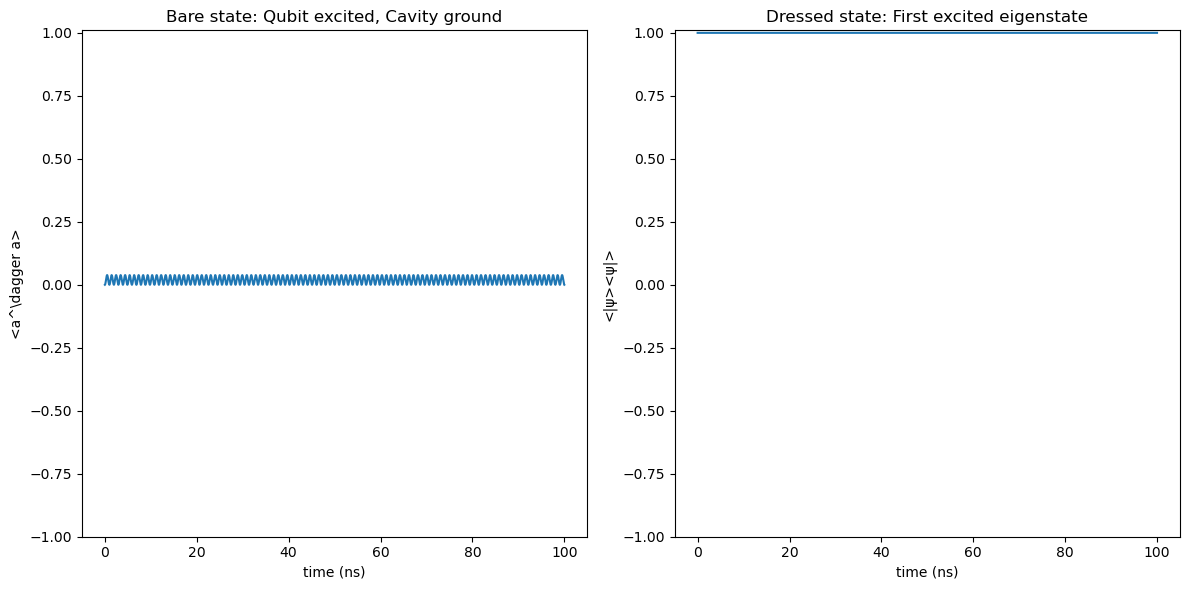

In [16]:
## First simulation: Bare excited state of qubit, ground state of cavity
c_ops = []  # No loss
psi0 = q.tensor(q.basis(2, 1), q.basis(N_trunc, 0))  # Initial state: qubit excited, cavity ground

# Time evolution parameters
t_list = np.linspace(0, 100, 4001)

# Solve the master equation
result = q.mesolve(H_JC * 2 * np.pi, psi0, t_list, c_ops=c_ops, e_ops=[a.dag() * a], options=options)

# Store the results for the first subplot
result_bare = result.expect[0]

## Second simulation: Dressed state of the system
c_ops = []  # No loss
psi0 = esys[1][1]  # Initial state: first excited eigenstate (dressed state)

# Time evolution parameters
t_list = np.linspace(0, 100, 4001)

# Solve the master equation
result = q.mesolve(H_JC * 2 * np.pi, psi0, t_list, c_ops=c_ops, e_ops=[psi0 * psi0.dag()], options=options)

# Store the results for the second subplot
result_dressed = result.expect[0]

# Plotting side-by-side subplots
plt.figure(figsize=(12, 6))

# First subplot: Bare state
plt.subplot(1, 2, 1)
plt.plot(t_list, result_bare)
plt.xlabel('time (ns)')
plt.ylabel(r'<a^\dagger a>')  # Expectation value of the photon number (using raw string to avoid escape sequence issue)
plt.ylim(-1, 1.01)
plt.title('Bare state: Qubit excited, Cavity ground')

# Second subplot: Dressed state
plt.subplot(1, 2, 2)
plt.plot(t_list, result_dressed)
plt.xlabel('time (ns)')
plt.ylabel(r'<|ψ><ψ|>')  # Expectation value of the initial state projector (using raw string)
plt.ylim(-1, 1.01)
plt.title('Dressed state: First excited eigenstate')

plt.tight_layout()
plt.show()


### Explanation of the Code

#### System Parameters and Operators

1. **Identities**:
   - `N_trunc = 10`: Dimension of the Hilbert space for the cavity mode.
   - `I2 = q.qeye(2)`: Identity operator for the qubit.
   - `Ir = q.qeye(N_trunc)`: Identity operator for the cavity mode.

2. **Qubit and Cavity Operators**:
   - `sx = q.sigmax()`: Pauli-X operator for the qubit.
   - `sx = q.tensor(sx, Ir)`: Extend the Pauli-X operator to the combined qubit-cavity system.
   - `sz = -q.sigmaz()`: Negative Pauli-Z operator for the qubit.
   - `sz = q.tensor(sz, Ir)`: Extend the negative Pauli-Z operator to the combined qubit-cavity system.
   - `sm = q.destroy(2)`: Annihilation operator for the qubit.
   - `sm = q.tensor(sm, Ir)`: Extend the annihilation operator to the combined qubit-cavity system.
   - `sp = sm.dag()`: Creation operator for the qubit.
   - `a = q.destroy(N_trunc)`: Annihilation operator for the cavity mode.
   - `a = q.tensor(I2, a)`: Extend the annihilation operator to the combined qubit-cavity system.

#### Hamiltonian Construction

3. **Hamiltonian Parameters**:
   - `wc = 5`: Cavity frequency in GHz.
   - `wq = 4`: Qubit frequency in GHz.
   - `g = 0.1`: Coupling strength between the qubit and the cavity mode.

4. **Jaynes-Cummings Hamiltonian**:
   - `H_JC = wq * sz / 2`: Qubit energy term.
   - `H_JC += wc * a.dag() * a`: Cavity energy term.
   - `H_JC += g * (a.dag() * sm + a * sp)`: Interaction term.

#### Simulation

5. **First Simulation: Bare State**:
   - `psi0 = q.tensor(q.basis(2, 1), q.basis(N_trunc, 0))`: Initial state with the qubit in the excited state and the cavity in the ground state.
   - `t_list = np.linspace(0, 100, 4001)`: Time points from 0 to 100 ns.
   - `result = q.mesolve(H_JC * 2 * np.pi, psi0, t_list, c_ops=c_ops, e_ops=[a.dag() * a], options=options)`: Solve the master equation and compute the expectation value of the photon number operator $a^\dagger a$.

6. **Second Simulation: Dressed State**:
   - `psi0 = esys[1][1]`: Initial state as the first excited eigenstate of the Jaynes-Cummings Hamiltonian (dressed state).
   - `t_list = np.linspace(0, 100, 4001)`: Time points from 0 to 100 ns.
   - `result = q.mesolve(H_JC * 2 * np.pi, psi0, t_list, c_ops=c_ops, e_ops=[psi0 * psi0.dag()], options=options)`: Solve the master equation and compute the expectation value of the initial state projector.

#### Plotting

7. **Side-by-Side Subplots**:
   - Create a figure with two subplots side-by-side.
   - **First Subplot**: Plot the expectation value of the photon number operator $a^\dagger a$ for the bare state.
   - **Second Subplot**: Plot the expectation value of the initial state projector for the dressed state.

### What and Why We Are Plotting

**What**:
- **First Plot**: Time evolution of the expectation value of the photon number operator $a^\dagger a$ when the system starts in the bare state (qubit excited, cavity ground).
- **Second Plot**: Time evolution of the expectation value of the initial state projector when the system starts in the dressed state (first excited eigenstate).

**Why**:
- **First Plot**: This plot shows how the population of the cavity mode changes over time when the system starts in a simple, intuitive initial state. It helps us understand the basic dynamics of energy exchange between the qubit and the cavity mode.
- **Second Plot**: This plot shows the behavior of the system when starting in an eigenstate of the Hamiltonian, providing insights into the stability and evolution of dressed states. Dressed states are important in quantum optics and cavity QED because they represent the combined state of the qubit and the cavity mode, influenced by their interaction.

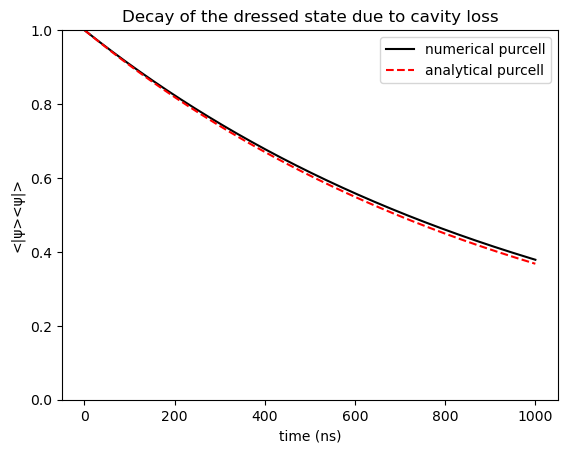

In [18]:
# Simulation with cavity loss only
c_ops = [a * np.sqrt(1e-1)]  # Collapse operator for cavity loss
psi0 = esys[1][1]  # Initial state: first excited eigenstate (dressed state)

# Time evolution parameters
t_list = np.linspace(0, 1000, 4001)

# Solve the master equation
result = q.mesolve(H_JC * 2 * np.pi, psi0, t_list, c_ops=c_ops, e_ops=[psi0 * psi0.dag()], options=options)

# Plot the numerical solution
plt.plot(t_list, result.expect[0], 'k-', label='numerical purcell')

# Plot the analytical solution (Purcell decay)
purcell_decay = np.exp(-g**2 / (wc - wq)**2 * 1e-1 * t_list)
plt.plot(t_list, purcell_decay, 'r--', alpha=1, label='analytical purcell')

# Plot settings
plt.xlabel('time (ns)')
plt.ylabel('<|ψ><ψ|>')  # Expectation value of the initial state projector
plt.legend()
plt.ylim(0., 1)
plt.title('Decay of the dressed state due to cavity loss')
plt.show()


### Explanation of the Code

#### System Parameters and Operators

1. **Identities**:
   - `N_trunc = 10`: Dimension of the Hilbert space for the cavity mode.
   - `I2 = q.qeye(2)`: Identity operator for the qubit.
   - `Ir = q.qeye(N_trunc)`: Identity operator for the cavity mode.

2. **Qubit and Cavity Operators**:
   - `sx = q.sigmax()`: Pauli-X operator for the qubit.
   - `sx = q.tensor(sx, Ir)`: Extend the Pauli-X operator to the combined qubit-cavity system.
   - `sz = -q.sigmaz()`: Negative Pauli-Z operator for the qubit.
   - `sz = q.tensor(sz, Ir)`: Extend the negative Pauli-Z operator to the combined qubit-cavity system.
   - `sm = q.destroy(2)`: Annihilation operator for the qubit.
   - `sm = q.tensor(sm, Ir)`: Extend the annihilation operator to the combined qubit-cavity system.
   - `sp = sm.dag()`: Creation operator for the qubit.
   - `a = q.destroy(N_trunc)`: Annihilation operator for the cavity mode.
   - `a = q.tensor(I2, a)`: Extend the annihilation operator to the combined qubit-cavity system.

#### Hamiltonian Construction

3. **Hamiltonian Parameters**:
   - `wc = 5`: Cavity frequency in GHz.
   - `wq = 4`: Qubit frequency in GHz.
   - `g = 0.1`: Coupling strength between the qubit and the cavity mode.

4. **Jaynes-Cummings Hamiltonian**:
   - `H_JC = wq * sz / 2`: Qubit energy term.
   - `H_JC += wc * a.dag() * a`: Cavity energy term.
   - `H_JC += g * (a.dag() * sm + a * sp)`: Interaction term.

#### Simulation

5. **Simulation with Cavity Loss**:
   - `c_ops = [a * np.sqrt(1e-1)]`: Collapse operator for cavity loss, representing energy dissipation from the cavity mode.
   - `psi0 = esys[1][1]`: Initial state as the first excited eigenstate of the Jaynes-Cummings Hamiltonian (dressed state).

6. **Time Evolution Parameters**:
   - `t_list = np.linspace(0, 1000, 4001)`: Time points from 0 to 1000 ns.

7. **Solve the Master Equation**:
   - `result = q.mesolve(H_JC * 2 * np.pi, psi0, t_list, c_ops=c_ops, e_ops=[psi0 * psi0.dag()], options=options)`: Solve the master equation and compute the expectation value of the initial state projector.

#### Plotting

8. **Plot the Numerical Solution**:
   - `plt.plot(t_list, result.expect[0], 'k-', label='numerical purcell')`: Plot the time evolution of the expectation value of the initial state projector, representing the probability of finding the system in the initial dressed state over time.

9. **Plot the Analytical Solution (Purcell Decay)**:
   - `purcell_decay = np.exp(-g**2 / (wc - wq)**2 * 1e-1 * t_list)`: Calculate the analytical solution for Purcell decay, which describes the decay rate of the dressed state due to coupling to the cavity mode.
   - `plt.plot(t_list, purcell_decay, 'r--', alpha=1, label='analytical purcell')`: Plot the analytical Purcell decay as a dashed red line.

10. **Plot Settings**:
   - `plt.xlabel('time (ns)')`: Label the x-axis as "time (ns)".
   - `plt.ylabel('<|ψ><ψ|>')`: Label the y-axis as "<|ψ><ψ|>" (expectation value of the initial state projector).
   - `plt.legend()`: Add a legend to the plot.
   - `plt.ylim(0., 1)`: Set the y-axis limits to be between 0 and 1.
   - `plt.title('Decay of the dressed state due to cavity loss')`: Set the title of the plot.

### What and Why We Are Plotting

**What**:
- The plot shows the time evolution of the probability of finding the system in the initial dressed state, both numerically and analytically. The numerical solution is obtained from the master equation solver, and the analytical solution is derived from the Purcell decay formula.

**Why**:
- **Numerical Solution**: The numerical solution provides a precise simulation of the system's dynamics, including the effects of cavity loss on the dressed state.
- **Analytical Solution**: The analytical Purcell decay formula offers an approximate solution that describes the exponential decay of the dressed state's population due to its coupling to the cavity mode.

### Difference Compared to Previous Example

- **Previous Example**: The previous example simulated the system without any loss mechanisms, focusing on the coherent dynamics of the dressed state.
- **Current Example**: The current example includes a collapse operator for cavity loss, allowing us to study the dissipative dynamics and decay of the dressed state due to energy dissipation from the cavity mode. The comparison between the numerical and analytical solutions helps validate the accuracy of the simulation and provides insight into the physical processes driving the decay.

# Drives

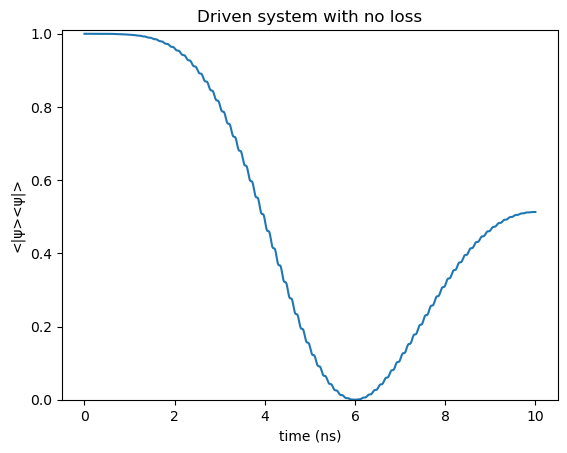

In [19]:
## Simulation with no loss and driven system
c_ops = []  # No loss
psi0 = esys[1][1]  # Initial state: first excited eigenstate (dressed state)

# Time evolution parameters
t_list = np.linspace(0, 10, 40001)  # Time from 0 to 10 ns, 40001 points

# Define the drive function
t_end = t_list[-1]
t_middle = t_end / 2
drive_list = np.exp(-(t_list - t_middle) ** 2 / (0.5 * t_end) ** 2)  # Gaussian envelope
drive_list = drive_list - np.amin(drive_list)  # Shift to have a minimum of zero
drive_list *= np.cos(2 * np.pi * (esys[0][1] - esys[0][0]) * t_list) * 0.2  # Modulate with a cosine wave
drive_func = q.interpolate.Cubic_Spline(t_list[0], t_list[-1], drive_list)  # Interpolate as a cubic spline

# Define the Hamiltonian with the driving term
H = [H_JC * 2 * np.pi, [sx * 2 * np.pi, drive_func]]

# Use the ground state for the initial state
psi0 = esys[1][0]

# Solve the master equation with the drive
result = q.mesolve(H, psi0, t_list, c_ops=c_ops, e_ops=[psi0 * psi0.dag()], options=options)

# Plot the results
plt.plot(t_list, result.expect[0], '-')
plt.xlabel('time (ns)')
plt.ylabel('<|ψ><ψ|>')  # Expectation value of the initial state projector
plt.ylim(0, 1.01)
plt.title('Driven system with no loss')
plt.show()

### Explanation of the Code

#### System Parameters and Operators

1. **Identities**:
   - `N_trunc = 10`: Dimension of the Hilbert space for the cavity mode.
   - `I2 = q.qeye(2)`: Identity operator for the qubit.
   - `Ir = q.qeye(N_trunc)`: Identity operator for the cavity mode.

2. **Qubit and Cavity Operators**:
   - `sx = q.sigmax()`: Pauli-X operator for the qubit.
   - `sx = q.tensor(sx, Ir)`: Extend the Pauli-X operator to the combined qubit-cavity system.
   - `sz = -q.sigmaz()`: Negative Pauli-Z operator for the qubit.
   - `sz = q.tensor(sz, Ir)`: Extend the negative Pauli-Z operator to the combined qubit-cavity system.
   - `sm = q.destroy(2)`: Annihilation operator for the qubit.
   - `sm = q.tensor(sm, Ir)`: Extend the annihilation operator to the combined qubit-cavity system.
   - `sp = sm.dag()`: Creation operator for the qubit.
   - `a = q.destroy(N_trunc)`: Annihilation operator for the cavity mode.
   - `a = q.tensor(I2, a)`: Extend the annihilation operator to the combined qubit-cavity system.

#### Hamiltonian Construction

3. **Hamiltonian Parameters**:
   - `wc = 5`: Cavity frequency in GHz.
   - `wq = 4`: Qubit frequency in GHz.
   - `g = 0.1`: Coupling strength between the qubit and the cavity mode.

4. **Jaynes-Cummings Hamiltonian**:
   - `H_JC = wq * sz / 2`: Qubit energy term.
   - `H_JC += wc * a.dag() * a`: Cavity energy term.
   - `H_JC += g * (a.dag() * sm + a * sp)`: Interaction term.

#### Simulation with Drive

5. **Simulation with No Loss and Driven System**:
   - `c_ops = []`: No loss (no collapse operators).
   - `psi0 = esys[1][1]`: Initial state as the first excited eigenstate of the Jaynes-Cummings Hamiltonian (dressed state).

6. **Time Evolution Parameters**:
   - `t_list = np.linspace(0, 10, 40001)`: Time points from 0 to 10 ns.

7. **Define the Drive Function**:
   - `t_end = t_list[-1]`: End time.
   - `t_middle = t_end / 2`: Middle of the time range.
   - `drive_list = np.exp(-(t_list - t_middle) ** 2 / (0.5 * t_end) ** 2)`: Gaussian envelope centered at `t_middle`.
   - `drive_list = drive_list - np.amin(drive_list)`: Shift to have a minimum of zero.
   - `drive_list *= np.cos(2 * np.pi * (esys[0][1] - esys[0][0]) * t_list) * 0.2`: Modulate with a cosine wave at the frequency difference between the first two energy levels.
   - `drive_func = q.interpolate.Cubic_Spline(t_list[0], t_list[-1], drive_list)`: Interpolate the drive list as a cubic spline.

8. **Hamiltonian with Driving Term**:
   - `H = [H_JC * 2 * np.pi, [sx * 2 * np.pi, drive_func]]`: Define the Hamiltonian with the Jaynes-Cummings term and the driving term.

9. **Solve the Master Equation with Drive**:
   - `result = q.mesolve(H, psi0, t_list, c_ops=c_ops, e_ops=[psi0 * psi0.dag()], options=options)`: Solve the master equation and compute the expectation value of the initial state projector.

#### Plotting

10. **Plot the Results**:
   - `plt.plot(t_list, result.expect[0], '-')`: Plot the time evolution of the expectation value of the initial state projector.
   - `plt.xlabel('time (ns)')`: Label the x-axis as "time (ns)".
   - `plt.ylabel('<|ψ><ψ|>')`: Label the y-axis as "<|ψ><ψ|>" (expectation value of the initial state projector).
   - `plt.ylim(0, 1.01)`: Set the y-axis limits to be between 0 and 1.01.
   - `plt.title('Driven system with no loss')`: Set the title of the plot.

### What and Why We Are Plotting

**What**:
- The plot shows the time evolution of the probability of finding the system in the initial dressed state when the system is driven by an external time-dependent field. This is represented by the expectation value of the initial state projector.

**Why**:
- The purpose of this plot is to study the response of the dressed state to an external drive. The drive function is a Gaussian-modulated cosine wave that matches the energy difference between the first two eigenstates of the system, leading to coherent oscillations. This setup simulates a driven Jaynes-Cummings system without any loss, allowing us to observe the coherent dynamics induced by the drive.

### Difference Compared to the Previous Example

- **Previous Example**: The previous example included cavity loss and compared numerical and analytical results of the dressed state's decay due to the Purcell effect. The focus was on understanding the dissipative dynamics and decay mechanisms.
- **Current Example**: The current example considers a driven system without any loss, focusing on the coherent response of the dressed state to an external time-dependent drive. The drive function is tailored to induce transitions between the dressed states, allowing us to study the coherent control and manipulation of the qubit-cavity system. This highlights the effects of an external drive on the system's

 dynamics, contrasting with the dissipative effects studied in the previous example.

# Combined loss and drtive:

In [22]:
import qutip as q
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Define system parameters and operators
N_trunc = 10  # Dimension of the Hilbert space for the cavity mode
I2 = q.qeye(2)  # Identity operator for the qubit
Ir = q.qeye(N_trunc)  # Identity operator for the cavity mode

# Qubit operators
sx = q.sigmax()
sx = q.tensor(sx, Ir)
sz = -q.sigmaz()
sz = q.tensor(sz, Ir)
sm = q.destroy(2)
sm = q.tensor(sm, Ir)
sp = sm.dag()

# Cavity operator
a = q.destroy(N_trunc)
a = q.tensor(I2, a)

# Hamiltonian construction
wc = 5  # Cavity frequency in GHz
wq = 4  # Qubit frequency in GHz
g = 0.1  # Coupling strength between the qubit and the cavity mode

H_JC = wq * sz / 2  # Qubit energy term, 1/2 factor for correct scaling
H_JC += wc * a.dag() * a  # Cavity energy term
H_JC += g * (a.dag() * sm + a * sp)  # Interaction term

# Compute eigenstates of the Hamiltonian
esys = H_JC.eigenstates()

# Define solver options
options = q.Options(rtol=1e-10, atol=1e-10, nsteps=1000000000, store_states=True, store_final_state=True)

# Define the function to update the plot
def update_plot(loss_coefficient, drive_freq, drive_duration, drive_amplitude):
    # Collapse operator for cavity loss
    c_ops = [a * np.sqrt(loss_coefficient)]
    
    # Time evolution parameters
    t_list = np.linspace(0, 200, 8001)  # Time from 0 to 200 ns, 8001 points
    
    # Define the drive function
    t_end = t_list[-1]
    t_middle = t_end / 2
    drive_list = np.exp(-(t_list - t_middle) ** 2 / (drive_duration * t_end) ** 2)  # Gaussian envelope
    drive_list = drive_list - np.amin(drive_list)  # Shift to have a minimum of zero
    drive_list *= np.cos(2 * np.pi * drive_freq * t_list) * drive_amplitude  # Modulate with a cosine wave
    drive_func = q.interpolate.Cubic_Spline(t_list[0], t_list[-1], drive_list)  # Interpolate as a cubic spline
    
    # Define the Hamiltonian with the driving term
    H = [H_JC * 2 * np.pi, [sx * 2 * np.pi, drive_func]]
    
    # Use the ground state for the initial state
    psi0 = esys[1][0]
    
    # Solve the master equation with the drive and loss
    result = q.mesolve(H, psi0, t_list, c_ops=c_ops, e_ops=[psi0 * psi0.dag()], options=options)
    
    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.plot(t_list, result.expect[0], 'k-', label='driven lossy system')
    plt.xlabel('time (ns)')
    plt.ylabel('<|ψ><ψ|>')  # Expectation value of the initial state projector
    plt.ylim(0, 1.01)
    plt.title('Driven lossy system with cavity loss')
    plt.legend()
    plt.show()

# Create the interactive sliders
interact(update_plot,
         loss_coefficient=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.1, description='Loss Coeff'),
         drive_freq=FloatSlider(min=0.0, max=10.0, step=0.1, value=(esys[0][1] - esys[0][0]), description='Drive Freq'),
         drive_duration=FloatSlider(min=0.01, max=1.0, step=0.01, value=0.5, description='Drive Duration'),
         drive_amplitude=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.2, description='Drive Amplitude'))


interactive(children=(FloatSlider(value=0.1, description='Loss Coeff', max=1.0, step=0.01), FloatSlider(value=…

<function __main__.update_plot(loss_coefficient, drive_freq, drive_duration, drive_amplitude)>

```python
import qutip as q
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Define system parameters and operators
N_trunc = 10  # Dimension of the Hilbert space for the cavity mode
I2 = q.qeye(2)  # Identity operator for the qubit
Ir = q.qeye(N_trunc)  # Identity operator for the cavity mode

# Qubit operators
sx = q.sigmax()
sx = q.tensor(sx, Ir)
sz = -q.sigmaz()
sz = q.tensor(sz, Ir)
sm = q.destroy(2)
sm = q.tensor(sm, Ir)
sp = sm.dag()

# Cavity operator
a = q.destroy(N_trunc)
a = q.tensor(I2, a)

# Hamiltonian construction
wc = 5  # Cavity frequency in GHz
wq = 4  # Qubit frequency in GHz
g = 0.1  # Coupling strength between the qubit and the cavity mode

H_JC = wq * sz / 2  # Qubit energy term, 1/2 factor for correct scaling
H_JC += wc * a.dag() * a  # Cavity energy term
H_JC += g * (a.dag() * sm + a * sp)  # Interaction term

# Compute eigenstates of the Hamiltonian
esys = H_JC.eigenstates()

# Define solver options
options = q.Options(rtol=1e-10, atol=1e-10, nsteps=1000000000, store_states=True, store_final_state=True)

# Define the function to update the plot
def update_plot(loss_coefficient, drive_freq, drive_duration, drive_amplitude):
    # Collapse operator for cavity loss
    c_ops = [a * np.sqrt(loss_coefficient)]
    
    # Time evolution parameters
    t_list = np.linspace(0, 200, 8001)  # Time from 0 to 200 ns, 8001 points
    
    # Define the drive function
    t_end = t_list[-1]
    t_middle = t_end / 2
    drive_list = np.exp(-(t_list - t_middle) ** 2 / (drive_duration * t_end) ** 2)  # Gaussian envelope
    drive_list = drive_list - np.amin(drive_list)  # Shift to have a minimum of zero
    drive_list *= np.cos(2 * np.pi * drive_freq * t_list) * drive_amplitude  # Modulate with a cosine wave
    drive_func = q.interpolate.Cubic_Spline(t_list[0], t_list[-1], drive_list)  # Interpolate as a cubic spline
    
    # Define the Hamiltonian with the driving term
    H = [H_JC * 2 * np.pi, [sx * 2 * np.pi, drive_func]]
    
    # Use the ground state for the initial state
    psi0 = esys[1][0]
    
    # Solve the master equation with the drive and loss
    result = q.mesolve(H, psi0, t_list, c_ops=c_ops, e_ops=[psi0 * psi0.dag()], options=options)
    
    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.plot(t_list, result.expect[0], 'k-', label='driven lossy system')
    plt.xlabel('time (ns)')
    plt.ylabel('<|ψ><ψ|>')  # Expectation value of the initial state projector
    plt.ylim(0, 1.01)
    plt.title('Driven lossy system with cavity loss')
    plt.legend()
    plt.show()

# Create the interactive sliders
interact(update_plot,
         loss_coefficient=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.1, description='Loss Coeff'),
         drive_freq=FloatSlider(min=0.0, max=10.0, step=0.1, value=(esys[0][1] - esys[0][0]), description='Drive Freq'),
         drive_duration=FloatSlider(min=0.01, max=1.0, step=0.01, value=0.5, description='Drive Duration'),
         drive_amplitude=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.2, description='Drive Amplitude'))

```

### Explanation of the Code

#### System Parameters and Operators

1. **Identities**:
   - `N_trunc = 10`: Dimension of the Hilbert space for the cavity mode.
   - `I2 = q.qeye(2)`: Identity operator for the qubit.
   - `Ir = q.qeye(N_trunc)`: Identity operator for the cavity mode.

2. **Qubit and Cavity Operators**:
   - `sx = q.sigmax()`: Pauli-X operator for the qubit.
   - `sx = q.tensor(sx, Ir)`: Extend the Pauli-X operator to the combined qubit-cavity system.
   - `sz = -q.sigmaz()`: Negative Pauli-Z operator for the qubit.
   - `sz = q.tensor(sz, Ir)`: Extend the negative Pauli-Z operator to the combined qubit-cavity system.
   - `sm = q.destroy(2)`: Annihilation operator for the qubit.
   - `sm = q.tensor(sm, Ir)`: Extend the annihilation operator to the combined qubit-cavity system.
   - `sp = sm.dag()`: Creation operator for the qubit.
   - `a = q.destroy(N_trunc)`: Annihilation operator for the cavity mode.
   - `a = q.tensor(I2, a)`: Extend the annihilation operator to the combined qubit-cavity system.

#### Hamiltonian Construction

3. **Hamiltonian Parameters**:
   - `wc = 5`: Cavity frequency in GHz.
   - `wq = 4`: Qubit frequency in GHz.
   - `g = 0.1`: Coupling strength between the qubit and the cavity mode.

4. **Jaynes-Cummings Hamiltonian**:
   - `H_JC = wq * sz / 2`: Qubit energy term.
   - `H_JC += wc * a.dag() * a`: Cavity energy term.
   - `H_JC += g * (a.dag() * sm + a * sp)`: Interaction term.

#### Simulation with Drive and Loss

5. **Simulation with Cavity Loss and Driven System**:
   - `c_ops = [a * np.sqrt(1e-1)]`: Collapse operator for cavity loss, representing energy dissipation from the cavity mode.
   - `psi0 = esys[1][1]`: Initial state as the first excited eigenstate of the Jaynes-Cummings Hamiltonian (dressed state).

6. **Time Evolution Parameters**:
   - `t_list = np.linspace(0, 100, 4001)`: Time points from 0 to 100 ns.

7. **Define the Drive Function**:
   - `t_end = t_list[-1]`: End time.
   - `t_middle = t_end / 2`: Middle of the time range.
   - `drive_list = np.exp(-(t_list - t_middle) ** 2 / (0.5 * t_end) ** 2)`: Gaussian envelope centered at `t_middle`.
   - `drive_list = drive_list - np.amin(drive_list)`: Shift to have a minimum of zero.
   - `drive_list *= np.cos(2 * np.pi * (esys[0][1] - esys[0][0]) * t_list) * 0.2`: Modulate with a cosine wave at the frequency difference between the first two energy levels.
   - `drive_func = q.interpolate.Cubic_Spline(t_list[0], t_list[-1], drive_list)`: Interpolate the drive list as a cubic spline.

8. **Hamiltonian with Driving Term**:
   - `H = [H_JC * 2 * np.pi, [sx * 2 * np.pi, drive_func]]`: Define the Hamiltonian with the Jaynes-Cummings term and the driving term.

9. **Solve the Master Equation with Drive and Loss**:
   - `result = q.mesolve(H, psi0, t_list, c_ops=c_ops, e_ops=[psi0 * psi0.dag()], options=options)`: Solve the master equation and compute the expectation value of the initial state projector.

#### Plotting

10. **Plot the Results**:
   - `plt.plot(t_list, result.expect[0], 'k-', label='driven lossy system')`: Plot the time evolution of the expectation value of the initial state projector.
   - `plt.xlabel('time (ns)')`: Label the x-axis as "time (ns)".
   - `plt.ylabel('<|ψ><ψ|>')`: Label the y-axis as "<|ψ><ψ|>" (expectation value of the initial state projector).
   - `plt.ylim(0, 1.01)`: Set the y-axis limits to be between 0 and 1.01.
   - `plt.title('Driven lossy system with cavity loss')`: Set the title of the plot.
   - `plt.legend()`: Add a legend to the plot.

### What and Why We Are Plotting

**What**:
- The plot shows the time evolution of the probability of finding the system in the initial dressed state when the system is both driven by an external time-dependent field and subject to cavity loss. This is represented by the expectation value of the initial state projector.

**Why**:
- The purpose of this plot is to study the combined effects of an external drive and cavity loss on the dressed state. By including both the drive and the loss, we can observe the interplay between coherent dynamics induced by the drive and dissipative dynamics caused by the cavity loss. This setup simulates a more realistic scenario in quantum optics and cavity QED, where systems are often subject to both external control fields and environmental losses.
- **Interactive Sliders**:
  - `loss_coefficient`: Controls the loss rate of the cavity.
  - `drive_freq`: Controls the frequency of the drive, initially set to the frequency difference between the first two energy levels of the system.
  - `drive_duration`: Controls the duration of the drive's Gaussian envelope.
  - `drive_amplitude`: Controls the amplitude of the drive.

- **Update Plot Function**:
  - Defines the collapse operators for the cavity loss.
  - Defines the time evolution parameters.
  - Constructs the drive function using a Gaussian envelope and a cosine modulation.
  - Defines the Hamiltonian with the driving term.
  - Solves the master equation using `q.mesolve`.
  - Plots the expectation value of the initial state projector over time.

In [16]:
import qutip as q
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Layout

# Define system parameters and operators
N_trunc = 10  # Dimension of the Hilbert space for the cavity mode
I2 = q.qeye(2)  # Identity operator for the qubit
Ir = q.qeye(N_trunc)  # Identity operator for the cavity mode

# Qubit operators
sx = q.sigmax()
sx = q.tensor(sx, Ir)
sz = -q.sigmaz()
sz = q.tensor(sz, Ir)
sm = q.destroy(2)
sm = q.tensor(sm, Ir)
sp = sm.dag()

# Cavity operator
a = q.destroy(N_trunc)
a = q.tensor(I2, a)

# Hamiltonian construction
wc = 5  # Cavity frequency in GHz
wq = 4  # Qubit frequency in GHz
g = 0.1  # Coupling strength between the qubit and the cavity mode

H_JC = wq * sz / 2  # Qubit energy term, 1/2 factor for correct scaling
H_JC += wc * a.dag() * a  # Cavity energy term
H_JC += g * (a.dag() * sm + a * sp)  # Interaction term

# Compute eigenstates of the Hamiltonian
esys = H_JC.eigenstates()

# Define solver options
options = q.Options(rtol=1e-10, atol=1e-10, nsteps=1000000000, store_states=True, store_final_state=True)

# Default values
default_loss = 0.1
default_drive_freq = esys[0][1] - esys[0][0]
default_drive_duration = 0.5
default_drive_amplitude = 0.2

# Define the function to update the plot
def update_plot(loss_coefficient, drive_freq, drive_duration, drive_amplitude):
    # Collapse operator for cavity loss
    c_ops = [a * np.sqrt(loss_coefficient)]
    
    # Time evolution parameters
    t_list = np.linspace(0, 200, 8001)  # Time from 0 to 200 ns, 8001 points
    
    # Define the drive function
    t_end = t_list[-1]
    t_middle = t_end / 2
    drive_list = np.exp(-(t_list - t_middle) ** 2 / (drive_duration * t_end) ** 2)  # Gaussian envelope
    drive_list = drive_list - np.amin(drive_list)  # Shift to have a minimum of zero
    drive_list *= np.cos(2 * np.pi * drive_freq * t_list) * drive_amplitude  # Modulate with a cosine wave
    drive_func = q.interpolate.Cubic_Spline(t_list[0], t_list[-1], drive_list)  # Interpolate as a cubic spline
    
    # Define the Hamiltonian with the driving term
    H = [H_JC * 2 * np.pi, [sx * 2 * np.pi, drive_func]]
    
    # Use the ground state for the initial state
    psi0 = esys[1][0]
    
    # Solve the master equation with the drive and loss
    result = q.mesolve(H, psi0, t_list, c_ops=c_ops, e_ops=[psi0 * psi0.dag()], options=options)
    
    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.plot(t_list, result.expect[0], 'k-', label='driven lossy system')
    plt.xlabel('time (ns)')
    plt.ylabel('<|ψ><ψ|>')  # Expectation value of the initial state projector
    plt.ylim(0, 1.01)
    plt.title('Driven lossy system with cavity loss')
    plt.legend()
    plt.show()

# Create the interactive sliders with default value labels
loss_slider = FloatSlider(value=default_loss, min=0.0, max=1.0, step=0.01,
                          description=f'LCoeff\n(={default_loss})', 
                          layout=Layout(width='800px', height='40px'))
drive_freq_slider = FloatSlider(value=default_drive_freq, min=0.0, max=10.0, step=0.1,
                                description=f'DFreq\n(={default_drive_freq:.2f})', 
                                layout=Layout(width='800px', height='40px'))
drive_duration_slider = FloatSlider(value=default_drive_duration, min=0.01, max=1.0, step=0.01,
                                    description=f'DDur\n(={default_drive_duration})', 
                                    layout=Layout(width='800px', height='40px'))
drive_amplitude_slider = FloatSlider(value=default_drive_amplitude, min=0.0, max=1.0, step=0.01,
                                     description=f'DAmp\n(={default_drive_amplitude})', 
                                     layout=Layout(width='800px', height='40px'))

def interactive_plot(loss_coefficient, drive_freq, drive_duration, drive_amplitude):
    update_plot(loss_coefficient, drive_freq, drive_duration, drive_amplitude)

interact(interactive_plot,
         loss_coefficient=loss_slider,
         drive_freq=drive_freq_slider,
         drive_duration=drive_duration_slider,
         drive_amplitude=drive_amplitude_slider)


interactive(children=(FloatSlider(value=0.1, description='LCoeff\n(=0.1)', layout=Layout(height='40px', width=…

<function __main__.interactive_plot(loss_coefficient, drive_freq, drive_duration, drive_amplitude)>

In [15]:
import qutip as q
import numpy as np
import plotly.graph_objs as go
from ipywidgets import interact, FloatSlider, Layout

# Define system parameters and operators
N_trunc = 10  # Dimension of the Hilbert space for the cavity mode
I2 = q.qeye(2)  # Identity operator for the qubit
Ir = q.qeye(N_trunc)  # Identity operator for the cavity mode

# Qubit operators
sx = q.sigmax()
sx = q.tensor(sx, Ir)
sz = -q.sigmaz()
sz = q.tensor(sz, Ir)
sm = q.destroy(2)
sm = q.tensor(sm, Ir)
sp = sm.dag()

# Cavity operator
a = q.destroy(N_trunc)
a = q.tensor(I2, a)

# Hamiltonian construction
wc = 5  # Cavity frequency in GHz
wq = 4  # Qubit frequency in GHz
g = 0.1  # Coupling strength between the qubit and the cavity mode

H_JC = wq * sz / 2  # Qubit energy term, 1/2 factor for correct scaling
H_JC += wc * a.dag() * a  # Cavity energy term
H_JC += g * (a.dag() * sm + a * sp)  # Interaction term

# Compute eigenstates of the Hamiltonian
esys = H_JC.eigenstates()

# Define solver options
options = q.Options(rtol=1e-10, atol=1e-10, nsteps=1000000000, store_states=True, store_final_state=True)

# Default values
default_loss = 0.1
default_drive_freq = esys[0][1] - esys[0][0]
default_drive_duration = 0.5
default_drive_amplitude = 0.2

# Define the function to update the plot
def update_plot(loss_coefficient, drive_freq, drive_duration, drive_amplitude):
    # Collapse operator for cavity loss
    c_ops = [a * np.sqrt(loss_coefficient)]
    
    # Time evolution parameters
    t_list = np.linspace(0, 200, 8001)  # Time from 0 to 200 ns, 8001 points
    
    # Define the drive function
    t_end = t_list[-1]
    t_middle = t_end / 2
    drive_list = np.exp(-(t_list - t_middle) ** 2 / (drive_duration * t_end) ** 2)  # Gaussian envelope
    drive_list = drive_list - np.amin(drive_list)  # Shift to have a minimum of zero
    drive_list *= np.cos(2 * np.pi * drive_freq * t_list) * drive_amplitude  # Modulate with a cosine wave
    drive_func = q.interpolate.Cubic_Spline(t_list[0], t_list[-1], drive_list)  # Interpolate as a cubic spline
    
    # Define the Hamiltonian with the driving term
    H = [H_JC * 2 * np.pi, [sx * 2 * np.pi, drive_func]]
    
    # Use the ground state for the initial state
    psi0 = esys[1][0]
    
    # Solve the master equation with the drive and loss
    result = q.mesolve(H, psi0, t_list, c_ops=c_ops, e_ops=[psi0 * psi0.dag()], options=options)
    
    # Create the plotly figure
    fig = go.Figure()

    # Add the trace for the driven lossy system
    fig.add_trace(go.Scatter(
        x=t_list,
        y=result.expect[0],
        mode='lines',
        name='driven lossy system'
    ))

    # Set the layout of the plot
    fig.update_layout(
        title='Driven lossy system with cavity loss',
        xaxis_title='time (ns)',
        yaxis_title='<|ψ><ψ|>',  # Expectation value of the initial state projector
        yaxis=dict(range=[0, 1.01]),
        legend=dict(x=0, y=1.1),
        height=800  # Set the height of the plot
    )

    # Show the plot
    fig.show()

# Create the interactive sliders with default value labels
loss_slider = FloatSlider(value=default_loss, min=0.0, max=1.0, step=0.01,
                          description=f'LCoeff\n(={default_loss})', 
                          layout=Layout(width='800px', height='40px'))
drive_freq_slider = FloatSlider(value=default_drive_freq, min=0.0, max=10.0, step=0.1,
                                description=f'DFreq\n(={default_drive_freq:.2f})', 
                                layout=Layout(width='800px', height='40px'))
drive_duration_slider = FloatSlider(value=default_drive_duration, min=0.01, max=1.0, step=0.01,
                                    description=f'DDur\n(={default_drive_duration})', 
                                    layout=Layout(width='800px', height='40px'))
drive_amplitude_slider = FloatSlider(value=default_drive_amplitude, min=0.0, max=1.0, step=0.01,
                                     description=f'DAmp\n(={default_drive_amplitude})', 
                                     layout=Layout(width='800px', height='40px'))

def interactive_plot(loss_coefficient, drive_freq, drive_duration, drive_amplitude):
    update_plot(loss_coefficient, drive_freq, drive_duration, drive_amplitude)

interact(interactive_plot,
         loss_coefficient=loss_slider,
         drive_freq=drive_freq_slider,
         drive_duration=drive_duration_slider,
         drive_amplitude=drive_amplitude_slider)


interactive(children=(FloatSlider(value=0.1, description='LCoeff\n(=0.1)', layout=Layout(height='40px', width=…

<function __main__.interactive_plot(loss_coefficient, drive_freq, drive_duration, drive_amplitude)>

Below is a list of commonly used time-dependent Hamiltonians for different quantum gates, including single-qubit and multi-qubit gates.

### Single-Qubit Gates

1. **X Gate (NOT Gate)**
   $$
   H_X = \frac{\pi}{2} \sigma_x
   $$
   For a duration $ t = \frac{\pi}{\Omega} $, where $\Omega$ is the Rabi frequency.

2. **Y Gate**
   $$
   H_Y = \frac{\pi}{2} \sigma_y
   $$
   For a duration $ t = \frac{\pi}{\Omega} $.

3. **Z Gate (Phase Gate)**
   $$
   H_Z = \frac{\pi}{2} \sigma_z
   $$
   This can also be implemented as a rotation about the Z-axis using a phase shift.

4. **Hadamard Gate**
   $$
   H_H = \frac{\pi}{2\sqrt{2}} (\sigma_x + \sigma_z)
   $$
   For a duration $ t = \frac{\pi}{\sqrt{2} \Omega} $.

5. **Arbitrary Rotation Gate**
   $$
   H_\theta = \frac{\theta}{2t} (\cos(\phi) \sigma_x + \sin(\phi) \sigma_y)
   $$
   For a rotation by angle $\theta$ around an axis in the XY plane defined by angle $\phi$.

### Multi-Qubit Gates

1. **CNOT Gate**
   The Hamiltonian for a controlled-NOT (CNOT) gate can be represented as:
   $$
   H_{CNOT} = \frac{\pi}{4} (\sigma_z \otimes \sigma_x + I \otimes \sigma_x)
   $$
   For a duration $ t = \frac{\pi}{\Omega} $.

2. **CZ Gate (Controlled-Z Gate)**
   $$
   H_{CZ} = \frac{\pi}{4} (\sigma_z \otimes \sigma_z)
   $$
   For a duration $ t = \frac{\pi}{\Omega} $.

3. **SWAP Gate**
   $$
   H_{SWAP} = \frac{\pi}{4} (\sigma_x \otimes \sigma_x + \sigma_y \otimes \sigma_y + \sigma_z \otimes \sigma_z)
   $$
   For a duration $ t = \frac{\pi}{\Omega} $.

4. **iSWAP Gate**
   $$
   H_{iSWAP} = \frac{\pi}{4} (\sigma_x \otimes \sigma_x + \sigma_y \otimes \sigma_y)
   $$
   For a duration $ t = \frac{\pi}{\Omega} $.

5. **Toffoli Gate (CCNOT Gate)**
   This is a more complex gate and typically requires a combination of multiple gates. An example Hamiltonian for one step might be:
   $$
   H_{CCNOT} = \frac{\pi}{4} (\sigma_z \otimes \sigma_z \otimes \sigma_x + I \otimes I \otimes \sigma_x)
   $$
   For a duration $ t = \frac{\pi}{\Omega} $.

### Example Code for CNOT Gate Hamiltonian

Here is an example of how to define and use the Hamiltonian for a CNOT gate in QuTiP:

```python
import numpy as np
from qutip import basis, tensor, sigmax, sigmay, sigmaz, qeye, mesolve
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Parameters
omega = 1.0  # Rabi frequency
t_list = np.linspace(0, 1, 1000)  # Time in arbitrary units

# Initial state: tensor product of two ground states
psi0 = tensor(basis(2, 0), basis(2, 0))

# CNOT Gate Hamiltonian
def H_CNOT(t, args):
    return (np.pi/4) * (tensor(sigmaz(), sigmax()) + tensor(qeye(2), sigmax()))

# Solve the system
result = mesolve(H_CNOT, psi0, t_list, [], [tensor(sigmaz(), qeye(2)), tensor(qeye(2), sigmaz())])

# Extract the expectation values of the Pauli Z operator for both qubits
expect_qubit1 = result.expect[0]
expect_qubit2 = result.expect[1]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_list, np.real(expect_qubit1), label="Qubit 1 (Expectation value of σ_z)")
plt.plot(t_list, np.real(expect_qubit2), label="Qubit 2 (Expectation value of σ_z)")
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Expectation value')
plt.legend()
plt.title('Time Evolution of Qubits with CNOT Gate Hamiltonian')
plt.grid(True)
plt.show()
```

This example shows how to define a time-dependent Hamiltonian for a CNOT gate and solve the time evolution of the system using QuTiP. You can similarly define other gates using their respective Hamiltonians.